<a href="https://colab.research.google.com/github/wpqc21/VulNeuralNetworks/blob/main/Random_Walk_TensorFlow_01_26_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

C:\Users\WTP\AppData\Local\Temp\ipykernel_20740\4038664820.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os

import pandas as pd

from PIL import Image

import plotly
import plotly.graph_objects as go

# Import to Prevent Plots from Disappearing
# import plotly.io as pio
# pio.renderers.default='notebook'
# plotly.offline.init_notebook_mode(connected=True)

import sys

import glob, re

import cv2

import plotly.express as px

import random

import numpy
import matplotlib

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

from plotly.subplots import make_subplots

import time

print(tf.__version__)



2.8.0


### Necessary Installations:

In [3]:
# https://towardsdatascience.com/tensorflow-gpu-installation-made-easy-use-conda-instead-of-pip-52e5249374bc

In [4]:
# in Ancadonda Prompt:
# conda create --name tf_gpu tensorflow-gpu 
# conda install pillow

In [5]:
# pip install tensorflow tensorflow-addons opencv-python numpy
# pip install Image
# pip install -- upgrade tensorflow-gpu
# pip install tqdm

In [6]:
# conda install -c conda-forge ffmpeg

## Functions

In [7]:
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(img):
    # load the image
    img = load_image(img)
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

def new_morph(name):
    
    group = []
    path = os.getcwd() + '\\' + name +  str('A')
    

    isdir = os.path.isdir(path)

    if not isdir:

        acc1A, acc2A, acc3A = 0,0,0
        acc1B, acc2B, acc3B = 0,0,0
        rand_classes = class_labels.copy()
        im1_list = list(range(0,200))
        im2_list = list(range(0,200))
        im3_list = list(range(0,200))

        print('Image 1A: ')
        while acc1A < .90:
            im1 = random.choice(rand_classes)
            im1_int = random.choice(im1_list)
            path1A = (str(class_names[im1]) + "\\" + class_names[im1] + '_' + str(im1_int) + '.png')
            img = load_image(path1A)
            predictions_single = probability_model.predict(img)
            print(path1A)
            print(predictions_single[0][im1], '\n')
            acc1A = predictions_single[0][im1]

        im1_list.remove(im1_int)
        print('Image 1B: ')
        while acc1B < .90:
#             im1 = random.choice(rand_classes)
            im1_int = random.choice(im1_list)
            path1B = (str(class_names[im1]) + "\\" + class_names[im1] + '_' + str(im1_int) + '.png')
            img = load_image(path1B)
            predictions_single = probability_model.predict(img)
            print(path1B)
            print(predictions_single[0][im1], '\n')
            acc1B = predictions_single[0][im1]

        rand_classes.remove(im1)
        print('Image 2A: ')
        while acc2A < .90:
            im2 = random.choice(rand_classes)
            im2_int = random.choice(im2_list)
            path2A = (str(class_names[im2]) + "\\" + class_names[im2] + '_' + str(im2_int) + '.png')
            img = load_image(path2A)
            predictions_single = probability_model.predict(img)
            print(path2A)
            print(predictions_single[0][im2], '\n')
            acc2A = predictions_single[0][im2]
        
        im2_list.remove(im2_int)
        print('Image 2B: ')
        while acc2B < .90:
#             im2 = random.choice(rand_classes)
            im2_int = random.choice(im2_list)
            path2B = (str(class_names[im2]) + "\\" + class_names[im2] + '_' + str(im2_int) + '.png')
            img = load_image(path2B)
            predictions_single = probability_model.predict(img)
            print(path2B)
            print(predictions_single[0][im2], '\n')
            acc2B = predictions_single[0][im2]

        rand_classes.remove(im2)
        print('Image 3A:')
        while acc3A < .90:
            im3 = random.choice(rand_classes)
            im3_int = random.choice(im3_list)
            path3A = (str(class_names[im3]) + "\\" + class_names[im3] + '_' + str(im3_int) + '.png')
            img = load_image(path3A)
            predictions_single = probability_model.predict(img)
            print(path3A)
            print(predictions_single[0][im3], '\n')
            acc3A = predictions_single[0][im3]
            
        im3_list.remove(im3_int)
        print('Image 3B:')
        while acc3B < .90:
#             im3 = random.choice(rand_classes)
            im3_int = random.choice(im3_list)
            path3B = (str(class_names[im3]) + "\\" + class_names[im3] + '_' + str(im3_int) + '.png')
            img = load_image(path3B)
            predictions_single = probability_model.predict(img)
            print(path3B)
            print(predictions_single[0][im3], '\n')
            acc3B = predictions_single[0][im3]

        os.mkdir(name + str('A'))
        os.mkdir(name + str('B'))

        basepath = os.path.abspath(name + str('A'))

        img1 = cv2.imread(path1A)
        filename = 'm_0.png'
        cv2.imwrite(os.path.join(basepath, filename), img1)
        print('Copied image 1, ', name +'A', path1A)

        img2 = cv2.imread(path2A)
        filename = 'm_20.png'
        cv2.imwrite(os.path.join(basepath, filename), img2)
        print('Copied image 2, ', name+'A', path2A)


        img3 = cv2.imread(path3A)
        filename = 'm_40.png'
        cv2.imwrite(os.path.join(basepath, filename), img3)
        print('Copied image 3, ', name+'A', path3A)
        
        basepath = os.path.abspath(name + str('B'))

        img1 = cv2.imread(path1B)
        filename = 'm_0.png'
        cv2.imwrite(os.path.join(basepath, filename), img1)
        print('Copied image 1, ', name+'B', path1B)

        img2 = cv2.imread(path2B)
        filename = 'm_20.png'
        cv2.imwrite(os.path.join(basepath, filename), img2)
        print('Copied image 2, ', name+'B', path2B)


        img3 = cv2.imread(path3B)
        filename = 'm_40.png'
        cv2.imwrite(os.path.join(basepath, filename), img3)
        print('Copied image 3, ', name+'B', path3B)
        
        group.append(class_names[im1])
        group.append(class_names[im2])
        group.append(class_names[im3])
        
        return group
        
    else:
        print('Directory Already Exists')
        
def sub_morph(name):
    for a in range(1, 4):
        path = os.getcwd() + '\\' + name + '\\' + name + '.' + str(a)

        isdir = os.path.isdir(path)

        if not isdir:
            newpath = name + '\\' + name + '.' + str(a)
            os.mkdir(newpath)
            for i, j in enumerate(zip(range(100, -5, -5), range(0, 105, 5))):
                if a == 1:
                    basepath = os.path.abspath(newpath)
                    os.mkdir(name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_'+str(j[1]))
                    img1 = cv2.imread(name + '\m_'+str(i)+'.png')
                    img2 = cv2.imread(name + '\m_40.png')
                    filename1 = 'm_0.png'
                    filename2 = 'm_20.png'
                    basepath = os.path.abspath(newpath + '\\'+ 'Morph_' + str(j[0]) + '_'+str(j[1]))
                    cv2.imwrite(os.path.join(basepath, filename1), img1)
                    cv2.imwrite(os.path.join(basepath, filename2), img2)

                elif a == 2:
                    basepath = os.path.abspath(newpath)
                    os.mkdir(name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_'+str(j[1]))
                    img1 = cv2.imread(name + '\m_'+str(i+20)+'.png')
                    img2 = cv2.imread(name + '\m_0.png')
                    filename1 = 'm_0.png'
                    filename2 = 'm_20.png'
                    basepath = os.path.abspath(newpath + '\\'+ 'Morph_' + str(j[0]) + '_'+str(j[1]))
                    cv2.imwrite(os.path.join(basepath, filename1), img1)
                    cv2.imwrite(os.path.join(basepath, filename2), img2)

                elif a == 3:
                    if i < 20:
                        basepath = os.path.abspath(newpath)
                        os.mkdir(name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_'+str(j[1]))
                        img1 = cv2.imread(name + '\m_'+str(i+40)+'.png')
                        img2 = cv2.imread(name + '\m_20.png')
                        filename1 = 'm_0.png'
                        filename2 = 'm_20.png'
                        basepath = os.path.abspath(newpath + '\\'+ 'Morph_' + str(j[0]) + '_'+str(j[1]))
                        cv2.imwrite(os.path.join(basepath, filename1), img1)
                        cv2.imwrite(os.path.join(basepath, filename2), img2)
                    else:
                        basepath = os.path.abspath(name)
                        os.mkdir(name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_'+str(j[1]))
                        img1 = cv2.imread(name + '\m_'+str(i - 20)+'.png')
                        img2 = cv2.imread(name + '\m_20.png')
                        filename1 = 'm_0.png'
                        filename2 = 'm_20.png'
                        basepath = os.path.abspath(newpath + '\\'+ 'Morph_' + str(j[0]) + '_'+str(j[1]))
                        cv2.imwrite(os.path.join(basepath, filename1), img1)
                        cv2.imwrite(os.path.join(basepath, filename2), img2)
        else:
            print('Directory Already Exists')
    
def print_morph(name):
    print('start_time = time.time()')
    
    for a in range(1, 4):
        for i, j in enumerate(zip(range(100, -5, -5), range(0, 105, 5))):
            print(
                "%run autoimagemorph.py -inframes "
                "\"['" + name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_' + str(j[1]) + '\\' + "m_0.png','" + name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_' + str(j[1]) + '\\' + "m_20.png']\" "
                "-outprefix " + name + '\\' + name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_' + str(j[1]) + '\\' + "m_"+" -framerate 20 -featuregridsize 3 \n\n")
    print('elapsed_time = time.time() - start_time')
    print('time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))')
    
def create_dict(name):
    name_dict = name
    name_dict = {}
    for a in range(1, 4):
        for i, j in enumerate(zip(range(100, -5, -5), range(0, 105, 5))):
            name_dict[name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_' + str(j[1])] \
            = [img for img in glob.glob(name + '\\' + \
                                        name + '.' + str(a) + '\\' + \
                                        'Morph_' + str(j[0]) + '_' + str(j[1]) + \
                                        '\m_*.png')]
            name_dict[name + '.' + str(a) + '\\' + 'Morph_' + str(j[0]) + '_' + str(j[1])] \
            .sort(key=lambda f: int(re.sub('\D', '', f)))
    return name_dict

def morph_pred(dict_name, group, dict1):
    CRED = '\033[91m'
    CWHI = '\033[37m'

    for i, j in dict_name.items():
        for file in j:
            def run_example():
                # load the image

                print(file, ":")
                img = load_image(file)
                img_r = Image.open(file)
                img_r = img_r.resize((100,100))
                # load model
                model = load_model('final_model.h5')
                # predict the class
                result = np.argmax(model.predict(img), axis=1)

                predictions_single = probability_model.predict(img)

#                 display(img_r , result[0])

                plt.figure(facecolor='white')

                plot_value_array(1, predictions_single[0], class_labels)
                _ = plt.xticks(range(10), class_names, rotation=45)
                split_file = file.split('\\')
                split_file.insert(3, 'pred')
                pred_dir = split_file.copy()
                pred_dir.remove(split_file[4])
                final_file = '\\'.join(split_file)
                pred_dir = '\\'.join(pred_dir)
                isdir = os.path.isdir(pred_dir)
                if not isdir:
                    os.mkdir(pred_dir)
                if '_pred.png' not in final_file:
                    plt.savefig(os.path.splitext(final_file)[0] + '_pred.png')
                    plt.close()
                    print(os.path.splitext(final_file)[0] + '_pred.png')
                else:
                    print('File Already Exists')
#                 plt.show()

                for k in predictions_single:
                    for a, b in zip(class_names, k):
                        if a in group:
                            if a in group[0]:
                                for i in dict1:
                                    if i in file:
                                        dict1[i][group[0]].append(b)
                            elif a in group[1]:
                                for i in dict1:
                                    if i in file:
                                        dict1[i][group[1]].append(b)
                            elif a in group[2]:
                                for i in dict1:
                                    if i in file:
                                        dict1[i][group[2]].append(b)
                            print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                        else:
                            print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
                print("\n\n")

            # entry point, run the example
            run_example()

def morph_3d(image1, image2, image3):
    shape = (21,21)

    image1_world, image2_world, image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            image1_world[i][j] = image1[(i*21) + j]
            image2_world[i][j] = image2[(i*21) + j]
            image3_world[i][j] = image3[(i*21) + j]
    
    return image1_world, image2_world, image3_world

#### 06/17/2022

## Import the Fashion MNIST dataset

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
print("""
      0: Top \n
      1: Trouser \n
      2: Pullover \n
      3: Dress \n
      4: Coat \n
      5: Sandal \n
      6: Shirt \n
      7: Sneaker \n
      8: Bag \n
      9: Ankle boot \n
      """)


      0: Top 

      1: Trouser 

      2: Pullover 

      3: Dress 

      4: Coat 

      5: Sandal 

      6: Shirt 

      7: Sneaker 

      8: Bag 

      9: Ankle boot 

      


## Explore the data

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_images)

10000

## Preprocess the data

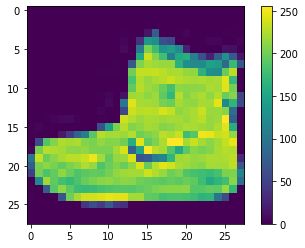

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

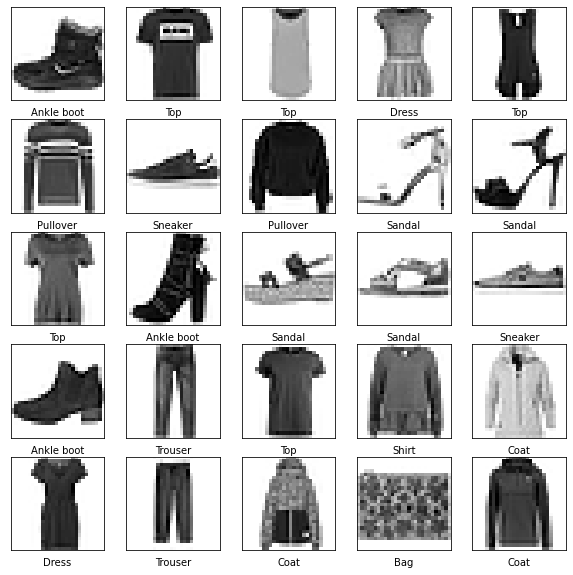

In [17]:
plt.figure(figsize=(10,10), facecolor='white')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

### Set up the layers

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

### Feed the model

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5014 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3382 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2463 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [21]:
model.save('final_model.h5')

### Evaluate accuracy

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3389 - accuracy: 0.8817 - 916ms/epoch - 3ms/step

Test accuracy: 0.8816999793052673


### Make predictions

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

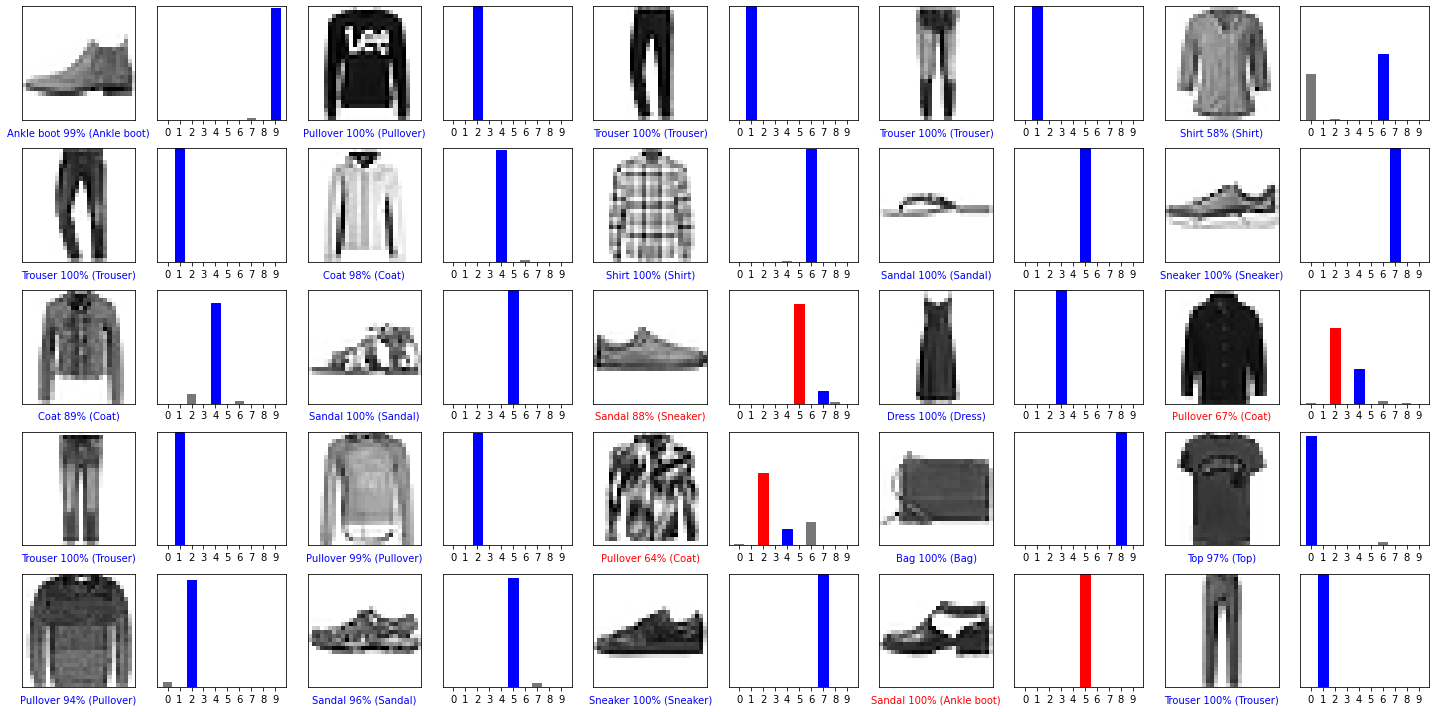

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), facecolor='white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.savefig('test_pred_25.png')
plt.show()

# Morphing Data

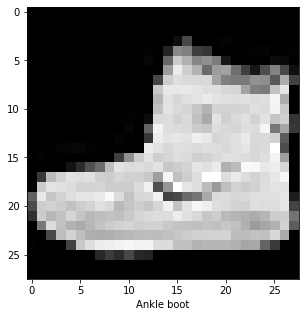

In [26]:
for i in range(1):
    plt.figure(figsize=(5,5), facecolor='white')
#     plt.axis('off')

    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])

#     plt.savefig('t' + str(i) + '.png')
plt.show()

In [27]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
img = load_image('Shirt\Shirt_61.png')

predictions_single = probability_model.predict(img)

D:\Anaconda3\envs\tf_gpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [30]:
predictions_single[0][6]

0.5829345

In [31]:
for i in predictions_single:
    for a, b in zip(class_names, i):
        print(a, "    \t", "{:f}".format(b))

Top     	 0.108697
Trouser     	 0.000044
Pullover     	 0.156221
Dress     	 0.024449
Coat     	 0.125246
Sandal     	 0.000002
Shirt     	 0.582934
Sneaker     	 0.000034
Bag     	 0.002346
Ankle boot     	 0.000027


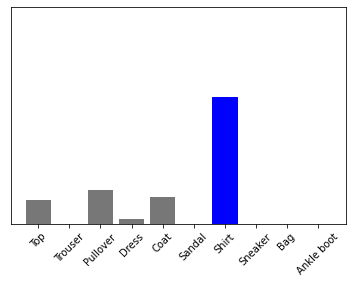

In [32]:
plt.figure(facecolor='white')
plot_value_array(6, predictions_single[0], class_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
os.mkdir("DataFrames")

In [ ]:
g1_group = new_morph('Morph_1')

In [ ]:
# g1_group = ['Coat', 'Sandal', 'Ankle boot']

In [ ]:
%run autoimagemorph.py -inframes \
"['Morph_1A\m_0.png', 'Morph_1A\m_20.png', 'Morph_1A\m_40.png', 'Morph_1A\m_0.png']" \
-outprefix Morph_1A\m_ -framerate 20 -featuregridsize 3

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_1B\m_0.png', 'Morph_1B\m_20.png', 'Morph_1B\m_40.png', 'Morph_1B\m_0.png']" \
-outprefix Morph_1B\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
sub_morph('Morph_1A')

In [ ]:
sub_morph('Morph_1B')

In [ ]:
print_morph('Morph_1A')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_100_0\m_0.png','Morph_1A\Morph_1A.1\Morph_100_0\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_95_5\m_0.png','Morph_1A\Morph_1A.1\Morph_95_5\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_90_10\m_0.png','Morph_1A\Morph_1A.1\Morph_90_10\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_85_15\m_0.png','Morph_1A\Morph_1A.1\Morph_85_15\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_80_20\m_0.png','Morph_1A\Morph_1A.1\Morph_80_20\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_75_25\m_0.png','Morph_1A\Morph_1A.1\Morph_75_25\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_70_30\m_0.png','Morph_1A\Morph_1A.1\Morph_70_30\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_65_35\m_0.png','Morph_1A\Morph_1A.1\Morph_65_35\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_60_40\m_0.png','Morph_1A\Morph_1A.1\Morph_60_40\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_55_45\m_0.png','Morph_1A\Morph_1A.1\Morph_55_45\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_50_50\m_0.png','Morph_1A\Morph_1A.1\Morph_50_50\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_45_55\m_0.png','Morph_1A\Morph_1A.1\Morph_45_55\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_40_60\m_0.png','Morph_1A\Morph_1A.1\Morph_40_60\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_35_65\m_0.png','Morph_1A\Morph_1A.1\Morph_35_65\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_30_70\m_0.png','Morph_1A\Morph_1A.1\Morph_30_70\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_25_75\m_0.png','Morph_1A\Morph_1A.1\Morph_25_75\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_20_80\m_0.png','Morph_1A\Morph_1A.1\Morph_20_80\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_15_85\m_0.png','Morph_1A\Morph_1A.1\Morph_15_85\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_10_90\m_0.png','Morph_1A\Morph_1A.1\Morph_10_90\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_5_95\m_0.png','Morph_1A\Morph_1A.1\Morph_5_95\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.1\Morph_0_100\m_0.png','Morph_1A\Morph_1A.1\Morph_0_100\m_20.png']" -outprefix Morph_1A\Morph_1A.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_100_0\m_0.png','Morph_1A\Morph_1A.2\Morph_100_0\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_95_5\m_0.png','Morph_1A\Morph_1A.2\Morph_95_5\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_90_10\m_0.png','Morph_1A\Morph_1A.2\Morph_90_10\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_85_15\m_0.png','Morph_1A\Morph_1A.2\Morph_85_15\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_80_20\m_0.png','Morph_1A\Morph_1A.2\Morph_80_20\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_75_25\m_0.png','Morph_1A\Morph_1A.2\Morph_75_25\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_70_30\m_0.png','Morph_1A\Morph_1A.2\Morph_70_30\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_65_35\m_0.png','Morph_1A\Morph_1A.2\Morph_65_35\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_60_40\m_0.png','Morph_1A\Morph_1A.2\Morph_60_40\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_55_45\m_0.png','Morph_1A\Morph_1A.2\Morph_55_45\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_50_50\m_0.png','Morph_1A\Morph_1A.2\Morph_50_50\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_45_55\m_0.png','Morph_1A\Morph_1A.2\Morph_45_55\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_40_60\m_0.png','Morph_1A\Morph_1A.2\Morph_40_60\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_35_65\m_0.png','Morph_1A\Morph_1A.2\Morph_35_65\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_30_70\m_0.png','Morph_1A\Morph_1A.2\Morph_30_70\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_25_75\m_0.png','Morph_1A\Morph_1A.2\Morph_25_75\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_20_80\m_0.png','Morph_1A\Morph_1A.2\Morph_20_80\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_15_85\m_0.png','Morph_1A\Morph_1A.2\Morph_15_85\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_10_90\m_0.png','Morph_1A\Morph_1A.2\Morph_10_90\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_5_95\m_0.png','Morph_1A\Morph_1A.2\Morph_5_95\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.2\Morph_0_100\m_0.png','Morph_1A\Morph_1A.2\Morph_0_100\m_20.png']" -outprefix Morph_1A\Morph_1A.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_100_0\m_0.png','Morph_1A\Morph_1A.3\Morph_100_0\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_95_5\m_0.png','Morph_1A\Morph_1A.3\Morph_95_5\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_90_10\m_0.png','Morph_1A\Morph_1A.3\Morph_90_10\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_85_15\m_0.png','Morph_1A\Morph_1A.3\Morph_85_15\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_80_20\m_0.png','Morph_1A\Morph_1A.3\Morph_80_20\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_75_25\m_0.png','Morph_1A\Morph_1A.3\Morph_75_25\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_70_30\m_0.png','Morph_1A\Morph_1A.3\Morph_70_30\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_65_35\m_0.png','Morph_1A\Morph_1A.3\Morph_65_35\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_60_40\m_0.png','Morph_1A\Morph_1A.3\Morph_60_40\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_55_45\m_0.png','Morph_1A\Morph_1A.3\Morph_55_45\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_50_50\m_0.png','Morph_1A\Morph_1A.3\Morph_50_50\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_45_55\m_0.png','Morph_1A\Morph_1A.3\Morph_45_55\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_40_60\m_0.png','Morph_1A\Morph_1A.3\Morph_40_60\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_35_65\m_0.png','Morph_1A\Morph_1A.3\Morph_35_65\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_30_70\m_0.png','Morph_1A\Morph_1A.3\Morph_30_70\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_25_75\m_0.png','Morph_1A\Morph_1A.3\Morph_25_75\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_20_80\m_0.png','Morph_1A\Morph_1A.3\Morph_20_80\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_15_85\m_0.png','Morph_1A\Morph_1A.3\Morph_15_85\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_10_90\m_0.png','Morph_1A\Morph_1A.3\Morph_10_90\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_5_95\m_0.png','Morph_1A\Morph_1A.3\Morph_5_95\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1A\Morph_1A.3\Morph_0_100\m_0.png','Morph_1A\Morph_1A.3\Morph_0_100\m_20.png']" -outprefix Morph_1A\Morph_1A.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
print_morph('Morph_1B')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_100_0\m_0.png','Morph_1B\Morph_1B.1\Morph_100_0\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_95_5\m_0.png','Morph_1B\Morph_1B.1\Morph_95_5\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_90_10\m_0.png','Morph_1B\Morph_1B.1\Morph_90_10\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_85_15\m_0.png','Morph_1B\Morph_1B.1\Morph_85_15\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_80_20\m_0.png','Morph_1B\Morph_1B.1\Morph_80_20\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_75_25\m_0.png','Morph_1B\Morph_1B.1\Morph_75_25\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_70_30\m_0.png','Morph_1B\Morph_1B.1\Morph_70_30\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_65_35\m_0.png','Morph_1B\Morph_1B.1\Morph_65_35\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_60_40\m_0.png','Morph_1B\Morph_1B.1\Morph_60_40\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_55_45\m_0.png','Morph_1B\Morph_1B.1\Morph_55_45\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_50_50\m_0.png','Morph_1B\Morph_1B.1\Morph_50_50\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_45_55\m_0.png','Morph_1B\Morph_1B.1\Morph_45_55\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_40_60\m_0.png','Morph_1B\Morph_1B.1\Morph_40_60\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_35_65\m_0.png','Morph_1B\Morph_1B.1\Morph_35_65\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_30_70\m_0.png','Morph_1B\Morph_1B.1\Morph_30_70\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_25_75\m_0.png','Morph_1B\Morph_1B.1\Morph_25_75\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_20_80\m_0.png','Morph_1B\Morph_1B.1\Morph_20_80\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_15_85\m_0.png','Morph_1B\Morph_1B.1\Morph_15_85\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_10_90\m_0.png','Morph_1B\Morph_1B.1\Morph_10_90\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_5_95\m_0.png','Morph_1B\Morph_1B.1\Morph_5_95\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.1\Morph_0_100\m_0.png','Morph_1B\Morph_1B.1\Morph_0_100\m_20.png']" -outprefix Morph_1B\Morph_1B.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_100_0\m_0.png','Morph_1B\Morph_1B.2\Morph_100_0\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_95_5\m_0.png','Morph_1B\Morph_1B.2\Morph_95_5\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_90_10\m_0.png','Morph_1B\Morph_1B.2\Morph_90_10\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_85_15\m_0.png','Morph_1B\Morph_1B.2\Morph_85_15\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_80_20\m_0.png','Morph_1B\Morph_1B.2\Morph_80_20\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_75_25\m_0.png','Morph_1B\Morph_1B.2\Morph_75_25\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_70_30\m_0.png','Morph_1B\Morph_1B.2\Morph_70_30\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_65_35\m_0.png','Morph_1B\Morph_1B.2\Morph_65_35\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_60_40\m_0.png','Morph_1B\Morph_1B.2\Morph_60_40\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_55_45\m_0.png','Morph_1B\Morph_1B.2\Morph_55_45\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_50_50\m_0.png','Morph_1B\Morph_1B.2\Morph_50_50\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_45_55\m_0.png','Morph_1B\Morph_1B.2\Morph_45_55\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_40_60\m_0.png','Morph_1B\Morph_1B.2\Morph_40_60\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_35_65\m_0.png','Morph_1B\Morph_1B.2\Morph_35_65\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_30_70\m_0.png','Morph_1B\Morph_1B.2\Morph_30_70\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_25_75\m_0.png','Morph_1B\Morph_1B.2\Morph_25_75\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_20_80\m_0.png','Morph_1B\Morph_1B.2\Morph_20_80\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_15_85\m_0.png','Morph_1B\Morph_1B.2\Morph_15_85\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_10_90\m_0.png','Morph_1B\Morph_1B.2\Morph_10_90\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_5_95\m_0.png','Morph_1B\Morph_1B.2\Morph_5_95\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.2\Morph_0_100\m_0.png','Morph_1B\Morph_1B.2\Morph_0_100\m_20.png']" -outprefix Morph_1B\Morph_1B.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_100_0\m_0.png','Morph_1B\Morph_1B.3\Morph_100_0\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_95_5\m_0.png','Morph_1B\Morph_1B.3\Morph_95_5\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_90_10\m_0.png','Morph_1B\Morph_1B.3\Morph_90_10\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_85_15\m_0.png','Morph_1B\Morph_1B.3\Morph_85_15\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_80_20\m_0.png','Morph_1B\Morph_1B.3\Morph_80_20\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_75_25\m_0.png','Morph_1B\Morph_1B.3\Morph_75_25\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_70_30\m_0.png','Morph_1B\Morph_1B.3\Morph_70_30\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_65_35\m_0.png','Morph_1B\Morph_1B.3\Morph_65_35\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_60_40\m_0.png','Morph_1B\Morph_1B.3\Morph_60_40\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_55_45\m_0.png','Morph_1B\Morph_1B.3\Morph_55_45\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_50_50\m_0.png','Morph_1B\Morph_1B.3\Morph_50_50\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_45_55\m_0.png','Morph_1B\Morph_1B.3\Morph_45_55\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_40_60\m_0.png','Morph_1B\Morph_1B.3\Morph_40_60\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_35_65\m_0.png','Morph_1B\Morph_1B.3\Morph_35_65\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_30_70\m_0.png','Morph_1B\Morph_1B.3\Morph_30_70\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_25_75\m_0.png','Morph_1B\Morph_1B.3\Morph_25_75\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_20_80\m_0.png','Morph_1B\Morph_1B.3\Morph_20_80\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_15_85\m_0.png','Morph_1B\Morph_1B.3\Morph_15_85\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_10_90\m_0.png','Morph_1B\Morph_1B.3\Morph_10_90\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_5_95\m_0.png','Morph_1B\Morph_1B.3\Morph_5_95\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_1B\Morph_1B.3\Morph_0_100\m_0.png','Morph_1B\Morph_1B.3\Morph_0_100\m_20.png']" -outprefix Morph_1B\Morph_1B.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### No Errors

In [ ]:
start_time = time.time()

Morph_1A = create_dict('Morph_1A')
Morph_1B = create_dict('Morph_1B')


m1A_predictions = {'Morph_1A.1' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}, \
                  'Morph_1A.2' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}, \
                  'Morph_1A.3' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}}

m1B_predictions = {'Morph_1B.1' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}, \
                  'Morph_1B.2' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}, \
                  'Morph_1B.3' : {g1_group[0] : [], g1_group[1] : [], g1_group[2] : []}}

morph_pred(Morph_1A, g1_group, m1A_predictions)

morph_pred(Morph_1B, g1_group, m1B_predictions)

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
m1A_df = pd.DataFrame(m1A_predictions)
m1B_df = pd.DataFrame(m1B_predictions)

m1A1_df, m1A2_df, m1A3_df = pd.DataFrame(m1A_predictions['Morph_1A.1']), \
                         pd.DataFrame(m1A_predictions['Morph_1A.2']), \
                         pd.DataFrame(m1A_predictions['Morph_1A.3'])

m1B1_df, m1B2_df, m1B3_df = pd.DataFrame(m1B_predictions['Morph_1B.1']), \
                         pd.DataFrame(m1B_predictions['Morph_1B.2']), \
                         pd.DataFrame(m1B_predictions['Morph_1B.3'])

m1A_df.to_pickle('DataFrames\m1A_df.pkl')
m1A1_df.to_pickle('DataFrames\m1A1_df.pkl')
m1A2_df.to_pickle('DataFrames\m1A2_df.pkl')
m1A3_df.to_pickle('DataFrames\m1A3_df.pkl')

m1B_df.to_pickle('DataFrames\m1B_df.pkl')
m1B1_df.to_pickle('DataFrames\m1B1_df.pkl')
m1B2_df.to_pickle('DataFrames\m1B2_df.pkl')
m1B3_df.to_pickle('DataFrames\m1B3_df.pkl')

In [ ]:
g2_group = new_morph('Morph_2')

In [ ]:
# g1_group = ['Coat', 'Sandal', 'Ankle boot']
# g2_group = ['Ankle boot', 'Bag', 'Trouser']

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_2A\m_0.png', 'Morph_2A\m_20.png', 'Morph_2A\m_40.png', 'Morph_2A\m_0.png']" \
-outprefix Morph_2A\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_2B\m_0.png', 'Morph_2B\m_20.png', 'Morph_2B\m_40.png', 'Morph_2B\m_0.png']" \
-outprefix Morph_2B\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
sub_morph('Morph_2A')

In [ ]:
sub_morph('Morph_2B')

In [ ]:
print_morph('Morph_2A')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_100_0\m_0.png','Morph_2A\Morph_2A.1\Morph_100_0\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_95_5\m_0.png','Morph_2A\Morph_2A.1\Morph_95_5\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_90_10\m_0.png','Morph_2A\Morph_2A.1\Morph_90_10\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_85_15\m_0.png','Morph_2A\Morph_2A.1\Morph_85_15\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_80_20\m_0.png','Morph_2A\Morph_2A.1\Morph_80_20\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_75_25\m_0.png','Morph_2A\Morph_2A.1\Morph_75_25\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_70_30\m_0.png','Morph_2A\Morph_2A.1\Morph_70_30\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_65_35\m_0.png','Morph_2A\Morph_2A.1\Morph_65_35\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_60_40\m_0.png','Morph_2A\Morph_2A.1\Morph_60_40\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_55_45\m_0.png','Morph_2A\Morph_2A.1\Morph_55_45\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_50_50\m_0.png','Morph_2A\Morph_2A.1\Morph_50_50\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_45_55\m_0.png','Morph_2A\Morph_2A.1\Morph_45_55\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_40_60\m_0.png','Morph_2A\Morph_2A.1\Morph_40_60\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_35_65\m_0.png','Morph_2A\Morph_2A.1\Morph_35_65\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_30_70\m_0.png','Morph_2A\Morph_2A.1\Morph_30_70\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_25_75\m_0.png','Morph_2A\Morph_2A.1\Morph_25_75\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_20_80\m_0.png','Morph_2A\Morph_2A.1\Morph_20_80\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_15_85\m_0.png','Morph_2A\Morph_2A.1\Morph_15_85\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_10_90\m_0.png','Morph_2A\Morph_2A.1\Morph_10_90\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_5_95\m_0.png','Morph_2A\Morph_2A.1\Morph_5_95\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.1\Morph_0_100\m_0.png','Morph_2A\Morph_2A.1\Morph_0_100\m_20.png']" -outprefix Morph_2A\Morph_2A.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_100_0\m_0.png','Morph_2A\Morph_2A.2\Morph_100_0\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_95_5\m_0.png','Morph_2A\Morph_2A.2\Morph_95_5\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_90_10\m_0.png','Morph_2A\Morph_2A.2\Morph_90_10\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_85_15\m_0.png','Morph_2A\Morph_2A.2\Morph_85_15\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_80_20\m_0.png','Morph_2A\Morph_2A.2\Morph_80_20\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_75_25\m_0.png','Morph_2A\Morph_2A.2\Morph_75_25\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_70_30\m_0.png','Morph_2A\Morph_2A.2\Morph_70_30\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_65_35\m_0.png','Morph_2A\Morph_2A.2\Morph_65_35\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_60_40\m_0.png','Morph_2A\Morph_2A.2\Morph_60_40\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_55_45\m_0.png','Morph_2A\Morph_2A.2\Morph_55_45\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_50_50\m_0.png','Morph_2A\Morph_2A.2\Morph_50_50\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_45_55\m_0.png','Morph_2A\Morph_2A.2\Morph_45_55\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_40_60\m_0.png','Morph_2A\Morph_2A.2\Morph_40_60\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_35_65\m_0.png','Morph_2A\Morph_2A.2\Morph_35_65\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_30_70\m_0.png','Morph_2A\Morph_2A.2\Morph_30_70\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_25_75\m_0.png','Morph_2A\Morph_2A.2\Morph_25_75\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_20_80\m_0.png','Morph_2A\Morph_2A.2\Morph_20_80\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_15_85\m_0.png','Morph_2A\Morph_2A.2\Morph_15_85\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_10_90\m_0.png','Morph_2A\Morph_2A.2\Morph_10_90\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_5_95\m_0.png','Morph_2A\Morph_2A.2\Morph_5_95\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.2\Morph_0_100\m_0.png','Morph_2A\Morph_2A.2\Morph_0_100\m_20.png']" -outprefix Morph_2A\Morph_2A.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_100_0\m_0.png','Morph_2A\Morph_2A.3\Morph_100_0\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_95_5\m_0.png','Morph_2A\Morph_2A.3\Morph_95_5\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_90_10\m_0.png','Morph_2A\Morph_2A.3\Morph_90_10\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_85_15\m_0.png','Morph_2A\Morph_2A.3\Morph_85_15\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_80_20\m_0.png','Morph_2A\Morph_2A.3\Morph_80_20\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_75_25\m_0.png','Morph_2A\Morph_2A.3\Morph_75_25\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_70_30\m_0.png','Morph_2A\Morph_2A.3\Morph_70_30\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_65_35\m_0.png','Morph_2A\Morph_2A.3\Morph_65_35\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_60_40\m_0.png','Morph_2A\Morph_2A.3\Morph_60_40\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_55_45\m_0.png','Morph_2A\Morph_2A.3\Morph_55_45\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_50_50\m_0.png','Morph_2A\Morph_2A.3\Morph_50_50\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_45_55\m_0.png','Morph_2A\Morph_2A.3\Morph_45_55\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_40_60\m_0.png','Morph_2A\Morph_2A.3\Morph_40_60\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_35_65\m_0.png','Morph_2A\Morph_2A.3\Morph_35_65\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_30_70\m_0.png','Morph_2A\Morph_2A.3\Morph_30_70\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_25_75\m_0.png','Morph_2A\Morph_2A.3\Morph_25_75\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_20_80\m_0.png','Morph_2A\Morph_2A.3\Morph_20_80\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_15_85\m_0.png','Morph_2A\Morph_2A.3\Morph_15_85\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_10_90\m_0.png','Morph_2A\Morph_2A.3\Morph_10_90\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_5_95\m_0.png','Morph_2A\Morph_2A.3\Morph_5_95\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2A\Morph_2A.3\Morph_0_100\m_0.png','Morph_2A\Morph_2A.3\Morph_0_100\m_20.png']" -outprefix Morph_2A\Morph_2A.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
print_morph('Morph_2B')

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_100_0\m_0.png','Morph_2B\Morph_2B.1\Morph_100_0\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_95_5\m_0.png','Morph_2B\Morph_2B.1\Morph_95_5\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 4


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_90_10\m_0.png','Morph_2B\Morph_2B.1\Morph_90_10\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 4


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_85_15\m_0.png','Morph_2B\Morph_2B.1\Morph_85_15\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_80_20\m_0.png','Morph_2B\Morph_2B.1\Morph_80_20\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_75_25\m_0.png','Morph_2B\Morph_2B.1\Morph_75_25\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_70_30\m_0.png','Morph_2B\Morph_2B.1\Morph_70_30\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_65_35\m_0.png','Morph_2B\Morph_2B.1\Morph_65_35\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_60_40\m_0.png','Morph_2B\Morph_2B.1\Morph_60_40\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_55_45\m_0.png','Morph_2B\Morph_2B.1\Morph_55_45\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_50_50\m_0.png','Morph_2B\Morph_2B.1\Morph_50_50\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_45_55\m_0.png','Morph_2B\Morph_2B.1\Morph_45_55\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_40_60\m_0.png','Morph_2B\Morph_2B.1\Morph_40_60\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_35_65\m_0.png','Morph_2B\Morph_2B.1\Morph_35_65\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_30_70\m_0.png','Morph_2B\Morph_2B.1\Morph_30_70\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_25_75\m_0.png','Morph_2B\Morph_2B.1\Morph_25_75\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_20_80\m_0.png','Morph_2B\Morph_2B.1\Morph_20_80\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_15_85\m_0.png','Morph_2B\Morph_2B.1\Morph_15_85\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_10_90\m_0.png','Morph_2B\Morph_2B.1\Morph_10_90\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_5_95\m_0.png','Morph_2B\Morph_2B.1\Morph_5_95\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_0_100\m_0.png','Morph_2B\Morph_2B.1\Morph_0_100\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_100_0\m_0.png','Morph_2B\Morph_2B.2\Morph_100_0\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_95_5\m_0.png','Morph_2B\Morph_2B.2\Morph_95_5\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_90_10\m_0.png','Morph_2B\Morph_2B.2\Morph_90_10\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_85_15\m_0.png','Morph_2B\Morph_2B.2\Morph_85_15\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_80_20\m_0.png','Morph_2B\Morph_2B.2\Morph_80_20\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_75_25\m_0.png','Morph_2B\Morph_2B.2\Morph_75_25\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_70_30\m_0.png','Morph_2B\Morph_2B.2\Morph_70_30\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_65_35\m_0.png','Morph_2B\Morph_2B.2\Morph_65_35\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_60_40\m_0.png','Morph_2B\Morph_2B.2\Morph_60_40\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_55_45\m_0.png','Morph_2B\Morph_2B.2\Morph_55_45\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_50_50\m_0.png','Morph_2B\Morph_2B.2\Morph_50_50\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_45_55\m_0.png','Morph_2B\Morph_2B.2\Morph_45_55\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_40_60\m_0.png','Morph_2B\Morph_2B.2\Morph_40_60\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_35_65\m_0.png','Morph_2B\Morph_2B.2\Morph_35_65\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_30_70\m_0.png','Morph_2B\Morph_2B.2\Morph_30_70\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_25_75\m_0.png','Morph_2B\Morph_2B.2\Morph_25_75\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_20_80\m_0.png','Morph_2B\Morph_2B.2\Morph_20_80\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_15_85\m_0.png','Morph_2B\Morph_2B.2\Morph_15_85\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_10_90\m_0.png','Morph_2B\Morph_2B.2\Morph_10_90\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_5_95\m_0.png','Morph_2B\Morph_2B.2\Morph_5_95\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.2\Morph_0_100\m_0.png','Morph_2B\Morph_2B.2\Morph_0_100\m_20.png']" -outprefix Morph_2B\Morph_2B.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_100_0\m_0.png','Morph_2B\Morph_2B.3\Morph_100_0\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_95_5\m_0.png','Morph_2B\Morph_2B.3\Morph_95_5\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_90_10\m_0.png','Morph_2B\Morph_2B.3\Morph_90_10\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_85_15\m_0.png','Morph_2B\Morph_2B.3\Morph_85_15\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_80_20\m_0.png','Morph_2B\Morph_2B.3\Morph_80_20\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_75_25\m_0.png','Morph_2B\Morph_2B.3\Morph_75_25\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_70_30\m_0.png','Morph_2B\Morph_2B.3\Morph_70_30\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_65_35\m_0.png','Morph_2B\Morph_2B.3\Morph_65_35\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_60_40\m_0.png','Morph_2B\Morph_2B.3\Morph_60_40\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_55_45\m_0.png','Morph_2B\Morph_2B.3\Morph_55_45\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_50_50\m_0.png','Morph_2B\Morph_2B.3\Morph_50_50\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_45_55\m_0.png','Morph_2B\Morph_2B.3\Morph_45_55\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_40_60\m_0.png','Morph_2B\Morph_2B.3\Morph_40_60\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_35_65\m_0.png','Morph_2B\Morph_2B.3\Morph_35_65\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_30_70\m_0.png','Morph_2B\Morph_2B.3\Morph_30_70\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_25_75\m_0.png','Morph_2B\Morph_2B.3\Morph_25_75\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_20_80\m_0.png','Morph_2B\Morph_2B.3\Morph_20_80\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_15_85\m_0.png','Morph_2B\Morph_2B.3\Morph_15_85\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_10_90\m_0.png','Morph_2B\Morph_2B.3\Morph_10_90\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_5_95\m_0.png','Morph_2B\Morph_2B.3\Morph_5_95\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.3\Morph_0_100\m_0.png','Morph_2B\Morph_2B.3\Morph_0_100\m_20.png']" -outprefix Morph_2B\Morph_2B.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### 10 Errors, Adjust -featuregridsize to 4

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_100_0\m_0.png','Morph_2B\Morph_2B.1\Morph_100_0\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_95_5\m_0.png','Morph_2B\Morph_2B.1\Morph_95_5\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 4


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_90_10\m_0.png','Morph_2B\Morph_2B.1\Morph_90_10\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 4


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_85_15\m_0.png','Morph_2B\Morph_2B.1\Morph_85_15\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_80_20\m_0.png','Morph_2B\Morph_2B.1\Morph_80_20\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_75_25\m_0.png','Morph_2B\Morph_2B.1\Morph_75_25\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_70_30\m_0.png','Morph_2B\Morph_2B.1\Morph_70_30\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_60_40\m_0.png','Morph_2B\Morph_2B.1\Morph_60_40\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_40_60\m_0.png','Morph_2B\Morph_2B.1\Morph_40_60\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 4 


%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_25_75\m_0.png','Morph_2B\Morph_2B.1\Morph_25_75\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 4 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### 4 Errors, Adjust -featuregridsize to 2

In [ ]:
start_time = time.time()

# %run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_100_0\m_0.png','Morph_2B\Morph_2B.1\Morph_100_0\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 2

%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_95_5\m_0.png','Morph_2B\Morph_2B.1\Morph_95_5\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 4

%run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_90_10\m_0.png','Morph_2B\Morph_2B.1\Morph_90_10\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 2

# %run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_80_20\m_0.png','Morph_2B\Morph_2B.1\Morph_80_20\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 2

# %run autoimagemorph.py -inframes "['Morph_2B\Morph_2B.1\Morph_75_25\m_0.png','Morph_2B\Morph_2B.1\Morph_75_25\m_20.png']" -outprefix Morph_2B\Morph_2B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 2

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
start_time = time.time()

Morph_2A = create_dict('Morph_2A')
Morph_2B = create_dict('Morph_2B')


m2A_predictions = {'Morph_2A.1' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}, \
                  'Morph_2A.2' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}, \
                  'Morph_2A.3' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}}

m2B_predictions = {'Morph_2B.1' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}, \
                  'Morph_2B.2' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}, \
                  'Morph_2B.3' : {g2_group[0] : [], g2_group[1] : [], g2_group[2] : []}}

morph_pred(Morph_2A, g2_group, m2A_predictions)

morph_pred(Morph_2B, g2_group, m2B_predictions)

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
m2A_df = pd.DataFrame(m2A_predictions)
m2B_df = pd.DataFrame(m2B_predictions)

m2A1_df, m2A2_df, m2A3_df = pd.DataFrame(m2A_predictions['Morph_2A.1']), \
                         pd.DataFrame(m2A_predictions['Morph_2A.2']), \
                         pd.DataFrame(m2A_predictions['Morph_2A.3'])

m2B1_df, m2B2_df, m2B3_df = pd.DataFrame(m2B_predictions['Morph_2B.1']), \
                         pd.DataFrame(m2B_predictions['Morph_2B.2']), \
                         pd.DataFrame(m2B_predictions['Morph_2B.3'])

m2A_df.to_pickle('DataFrames\m2A_df.pkl')
m2A1_df.to_pickle('DataFrames\m2A1_df.pkl')
m2A2_df.to_pickle('DataFrames\m2A2_df.pkl')
m2A3_df.to_pickle('DataFrames\m2A3_df.pkl')

m2B_df.to_pickle('DataFrames\m2B_df.pkl')
m2B1_df.to_pickle('DataFrames\m2B1_df.pkl')
m2B2_df.to_pickle('DataFrames\m2B2_df.pkl')
m2B3_df.to_pickle('DataFrames\m2B3_df.pkl')

In [ ]:
g3_group = new_morph('Morph_3')

In [ ]:
# g1_group = ['Coat', 'Sandal', 'Ankle boot']
# g2_group = ['Ankle boot', 'Bag', 'Trouser']
# g3_group = ['Shirt', 'Bag', 'Pullover']

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_3A\m_0.png', 'Morph_3A\m_20.png', 'Morph_3A\m_40.png', 'Morph_3A\m_0.png']" \
-outprefix Morph_3A\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_3B\m_0.png', 'Morph_3B\m_20.png', 'Morph_3B\m_40.png', 'Morph_3B\m_0.png']" \
-outprefix Morph_3B\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
sub_morph('Morph_3A')

In [ ]:
sub_morph('Morph_3B')

In [ ]:
print_morph('Morph_3A')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_100_0\m_0.png','Morph_3A\Morph_3A.1\Morph_100_0\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_95_5\m_0.png','Morph_3A\Morph_3A.1\Morph_95_5\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_90_10\m_0.png','Morph_3A\Morph_3A.1\Morph_90_10\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_85_15\m_0.png','Morph_3A\Morph_3A.1\Morph_85_15\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_80_20\m_0.png','Morph_3A\Morph_3A.1\Morph_80_20\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_75_25\m_0.png','Morph_3A\Morph_3A.1\Morph_75_25\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_70_30\m_0.png','Morph_3A\Morph_3A.1\Morph_70_30\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_65_35\m_0.png','Morph_3A\Morph_3A.1\Morph_65_35\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_60_40\m_0.png','Morph_3A\Morph_3A.1\Morph_60_40\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_55_45\m_0.png','Morph_3A\Morph_3A.1\Morph_55_45\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_50_50\m_0.png','Morph_3A\Morph_3A.1\Morph_50_50\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_45_55\m_0.png','Morph_3A\Morph_3A.1\Morph_45_55\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_40_60\m_0.png','Morph_3A\Morph_3A.1\Morph_40_60\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_35_65\m_0.png','Morph_3A\Morph_3A.1\Morph_35_65\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_30_70\m_0.png','Morph_3A\Morph_3A.1\Morph_30_70\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_25_75\m_0.png','Morph_3A\Morph_3A.1\Morph_25_75\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_20_80\m_0.png','Morph_3A\Morph_3A.1\Morph_20_80\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_15_85\m_0.png','Morph_3A\Morph_3A.1\Morph_15_85\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_10_90\m_0.png','Morph_3A\Morph_3A.1\Morph_10_90\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_5_95\m_0.png','Morph_3A\Morph_3A.1\Morph_5_95\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.1\Morph_0_100\m_0.png','Morph_3A\Morph_3A.1\Morph_0_100\m_20.png']" -outprefix Morph_3A\Morph_3A.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_100_0\m_0.png','Morph_3A\Morph_3A.2\Morph_100_0\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_95_5\m_0.png','Morph_3A\Morph_3A.2\Morph_95_5\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_90_10\m_0.png','Morph_3A\Morph_3A.2\Morph_90_10\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_85_15\m_0.png','Morph_3A\Morph_3A.2\Morph_85_15\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_80_20\m_0.png','Morph_3A\Morph_3A.2\Morph_80_20\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_75_25\m_0.png','Morph_3A\Morph_3A.2\Morph_75_25\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_70_30\m_0.png','Morph_3A\Morph_3A.2\Morph_70_30\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_65_35\m_0.png','Morph_3A\Morph_3A.2\Morph_65_35\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_60_40\m_0.png','Morph_3A\Morph_3A.2\Morph_60_40\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_55_45\m_0.png','Morph_3A\Morph_3A.2\Morph_55_45\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_50_50\m_0.png','Morph_3A\Morph_3A.2\Morph_50_50\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_45_55\m_0.png','Morph_3A\Morph_3A.2\Morph_45_55\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_40_60\m_0.png','Morph_3A\Morph_3A.2\Morph_40_60\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_35_65\m_0.png','Morph_3A\Morph_3A.2\Morph_35_65\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_30_70\m_0.png','Morph_3A\Morph_3A.2\Morph_30_70\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_25_75\m_0.png','Morph_3A\Morph_3A.2\Morph_25_75\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_20_80\m_0.png','Morph_3A\Morph_3A.2\Morph_20_80\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_15_85\m_0.png','Morph_3A\Morph_3A.2\Morph_15_85\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_10_90\m_0.png','Morph_3A\Morph_3A.2\Morph_10_90\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_5_95\m_0.png','Morph_3A\Morph_3A.2\Morph_5_95\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.2\Morph_0_100\m_0.png','Morph_3A\Morph_3A.2\Morph_0_100\m_20.png']" -outprefix Morph_3A\Morph_3A.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_100_0\m_0.png','Morph_3A\Morph_3A.3\Morph_100_0\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_95_5\m_0.png','Morph_3A\Morph_3A.3\Morph_95_5\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_90_10\m_0.png','Morph_3A\Morph_3A.3\Morph_90_10\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_85_15\m_0.png','Morph_3A\Morph_3A.3\Morph_85_15\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_80_20\m_0.png','Morph_3A\Morph_3A.3\Morph_80_20\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_75_25\m_0.png','Morph_3A\Morph_3A.3\Morph_75_25\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_70_30\m_0.png','Morph_3A\Morph_3A.3\Morph_70_30\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_65_35\m_0.png','Morph_3A\Morph_3A.3\Morph_65_35\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_60_40\m_0.png','Morph_3A\Morph_3A.3\Morph_60_40\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_55_45\m_0.png','Morph_3A\Morph_3A.3\Morph_55_45\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_50_50\m_0.png','Morph_3A\Morph_3A.3\Morph_50_50\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_45_55\m_0.png','Morph_3A\Morph_3A.3\Morph_45_55\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_40_60\m_0.png','Morph_3A\Morph_3A.3\Morph_40_60\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_35_65\m_0.png','Morph_3A\Morph_3A.3\Morph_35_65\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_30_70\m_0.png','Morph_3A\Morph_3A.3\Morph_30_70\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_25_75\m_0.png','Morph_3A\Morph_3A.3\Morph_25_75\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_20_80\m_0.png','Morph_3A\Morph_3A.3\Morph_20_80\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_15_85\m_0.png','Morph_3A\Morph_3A.3\Morph_15_85\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_10_90\m_0.png','Morph_3A\Morph_3A.3\Morph_10_90\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_5_95\m_0.png','Morph_3A\Morph_3A.3\Morph_5_95\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3A\Morph_3A.3\Morph_0_100\m_0.png','Morph_3A\Morph_3A.3\Morph_0_100\m_20.png']" -outprefix Morph_3A\Morph_3A.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
print_morph('Morph_3B')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_100_0\m_0.png','Morph_3B\Morph_3B.1\Morph_100_0\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_95_5\m_0.png','Morph_3B\Morph_3B.1\Morph_95_5\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_90_10\m_0.png','Morph_3B\Morph_3B.1\Morph_90_10\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_85_15\m_0.png','Morph_3B\Morph_3B.1\Morph_85_15\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_80_20\m_0.png','Morph_3B\Morph_3B.1\Morph_80_20\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_75_25\m_0.png','Morph_3B\Morph_3B.1\Morph_75_25\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_70_30\m_0.png','Morph_3B\Morph_3B.1\Morph_70_30\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_65_35\m_0.png','Morph_3B\Morph_3B.1\Morph_65_35\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_60_40\m_0.png','Morph_3B\Morph_3B.1\Morph_60_40\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_55_45\m_0.png','Morph_3B\Morph_3B.1\Morph_55_45\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_50_50\m_0.png','Morph_3B\Morph_3B.1\Morph_50_50\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_45_55\m_0.png','Morph_3B\Morph_3B.1\Morph_45_55\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_40_60\m_0.png','Morph_3B\Morph_3B.1\Morph_40_60\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_35_65\m_0.png','Morph_3B\Morph_3B.1\Morph_35_65\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_30_70\m_0.png','Morph_3B\Morph_3B.1\Morph_30_70\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_25_75\m_0.png','Morph_3B\Morph_3B.1\Morph_25_75\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_20_80\m_0.png','Morph_3B\Morph_3B.1\Morph_20_80\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_15_85\m_0.png','Morph_3B\Morph_3B.1\Morph_15_85\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_10_90\m_0.png','Morph_3B\Morph_3B.1\Morph_10_90\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_5_95\m_0.png','Morph_3B\Morph_3B.1\Morph_5_95\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.1\Morph_0_100\m_0.png','Morph_3B\Morph_3B.1\Morph_0_100\m_20.png']" -outprefix Morph_3B\Morph_3B.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_100_0\m_0.png','Morph_3B\Morph_3B.2\Morph_100_0\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_95_5\m_0.png','Morph_3B\Morph_3B.2\Morph_95_5\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_90_10\m_0.png','Morph_3B\Morph_3B.2\Morph_90_10\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_85_15\m_0.png','Morph_3B\Morph_3B.2\Morph_85_15\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_80_20\m_0.png','Morph_3B\Morph_3B.2\Morph_80_20\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_75_25\m_0.png','Morph_3B\Morph_3B.2\Morph_75_25\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_70_30\m_0.png','Morph_3B\Morph_3B.2\Morph_70_30\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_65_35\m_0.png','Morph_3B\Morph_3B.2\Morph_65_35\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_60_40\m_0.png','Morph_3B\Morph_3B.2\Morph_60_40\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_55_45\m_0.png','Morph_3B\Morph_3B.2\Morph_55_45\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_50_50\m_0.png','Morph_3B\Morph_3B.2\Morph_50_50\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_45_55\m_0.png','Morph_3B\Morph_3B.2\Morph_45_55\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_40_60\m_0.png','Morph_3B\Morph_3B.2\Morph_40_60\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_35_65\m_0.png','Morph_3B\Morph_3B.2\Morph_35_65\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_30_70\m_0.png','Morph_3B\Morph_3B.2\Morph_30_70\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_25_75\m_0.png','Morph_3B\Morph_3B.2\Morph_25_75\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_20_80\m_0.png','Morph_3B\Morph_3B.2\Morph_20_80\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_15_85\m_0.png','Morph_3B\Morph_3B.2\Morph_15_85\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_10_90\m_0.png','Morph_3B\Morph_3B.2\Morph_10_90\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_5_95\m_0.png','Morph_3B\Morph_3B.2\Morph_5_95\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.2\Morph_0_100\m_0.png','Morph_3B\Morph_3B.2\Morph_0_100\m_20.png']" -outprefix Morph_3B\Morph_3B.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_100_0\m_0.png','Morph_3B\Morph_3B.3\Morph_100_0\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_95_5\m_0.png','Morph_3B\Morph_3B.3\Morph_95_5\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_90_10\m_0.png','Morph_3B\Morph_3B.3\Morph_90_10\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_85_15\m_0.png','Morph_3B\Morph_3B.3\Morph_85_15\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_80_20\m_0.png','Morph_3B\Morph_3B.3\Morph_80_20\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_75_25\m_0.png','Morph_3B\Morph_3B.3\Morph_75_25\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_70_30\m_0.png','Morph_3B\Morph_3B.3\Morph_70_30\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_65_35\m_0.png','Morph_3B\Morph_3B.3\Morph_65_35\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_60_40\m_0.png','Morph_3B\Morph_3B.3\Morph_60_40\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_55_45\m_0.png','Morph_3B\Morph_3B.3\Morph_55_45\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_50_50\m_0.png','Morph_3B\Morph_3B.3\Morph_50_50\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_45_55\m_0.png','Morph_3B\Morph_3B.3\Morph_45_55\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_40_60\m_0.png','Morph_3B\Morph_3B.3\Morph_40_60\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_35_65\m_0.png','Morph_3B\Morph_3B.3\Morph_35_65\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_30_70\m_0.png','Morph_3B\Morph_3B.3\Morph_30_70\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_25_75\m_0.png','Morph_3B\Morph_3B.3\Morph_25_75\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_20_80\m_0.png','Morph_3B\Morph_3B.3\Morph_20_80\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_15_85\m_0.png','Morph_3B\Morph_3B.3\Morph_15_85\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_10_90\m_0.png','Morph_3B\Morph_3B.3\Morph_10_90\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_5_95\m_0.png','Morph_3B\Morph_3B.3\Morph_5_95\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_3B\Morph_3B.3\Morph_0_100\m_0.png','Morph_3B\Morph_3B.3\Morph_0_100\m_20.png']" -outprefix Morph_3B\Morph_3B.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### No Errors

In [ ]:
start_time = time.time()

Morph_3A = create_dict('Morph_3A')
Morph_3B = create_dict('Morph_3B')


m3A_predictions = {'Morph_3A.1' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}, \
                  'Morph_3A.2' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}, \
                  'Morph_3A.3' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}}

m3B_predictions = {'Morph_3B.1' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}, \
                  'Morph_3B.2' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}, \
                  'Morph_3B.3' : {g3_group[0] : [], g3_group[1] : [], g3_group[2] : []}}

morph_pred(Morph_3A, g3_group, m3A_predictions)

morph_pred(Morph_3B, g3_group, m3B_predictions)

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
m3A_df = pd.DataFrame(m3A_predictions)
m3B_df = pd.DataFrame(m3B_predictions)

m3A1_df, m3A2_df, m3A3_df = pd.DataFrame(m3A_predictions['Morph_3A.1']), \
                         pd.DataFrame(m3A_predictions['Morph_3A.2']), \
                         pd.DataFrame(m3A_predictions['Morph_3A.3'])

m3B1_df, m3B2_df, m3B3_df = pd.DataFrame(m3B_predictions['Morph_3B.1']), \
                         pd.DataFrame(m3B_predictions['Morph_3B.2']), \
                         pd.DataFrame(m3B_predictions['Morph_3B.3'])

m3A_df.to_pickle('DataFrames\m3A_df.pkl')
m3A1_df.to_pickle('DataFrames\m3A1_df.pkl')
m3A2_df.to_pickle('DataFrames\m3A2_df.pkl')
m3A3_df.to_pickle('DataFrames\m3A3_df.pkl')

m3B_df.to_pickle('DataFrames\m3B_df.pkl')
m3B1_df.to_pickle('DataFrames\m3B1_df.pkl')
m3B2_df.to_pickle('DataFrames\m3B2_df.pkl')
m3B3_df.to_pickle('DataFrames\m3B3_df.pkl')

In [ ]:
g4_group = new_morph('Morph_4')

In [ ]:
# g1_group = ['Coat', 'Sandal', 'Ankle boot']
# g2_group = ['Ankle boot', 'Bag', 'Trouser']
# g3_group = ['Shirt', 'Bag', 'Pullover']
# g4_group = ['Trouser', 'Bag', 'Dress']

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_4A\m_0.png', 'Morph_4A\m_20.png', 'Morph_4A\m_40.png', 'Morph_4A\m_0.png']" \
-outprefix Morph_4A\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_4B\m_0.png', 'Morph_4B\m_20.png', 'Morph_4B\m_40.png', 'Morph_4B\m_0.png']" \
-outprefix Morph_4B\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
sub_morph('Morph_4A')

In [ ]:
sub_morph('Morph_4B')

In [ ]:
print_morph('Morph_4A')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_100_0\m_0.png','Morph_4A\Morph_4A.1\Morph_100_0\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_95_5\m_0.png','Morph_4A\Morph_4A.1\Morph_95_5\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_90_10\m_0.png','Morph_4A\Morph_4A.1\Morph_90_10\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_85_15\m_0.png','Morph_4A\Morph_4A.1\Morph_85_15\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_80_20\m_0.png','Morph_4A\Morph_4A.1\Morph_80_20\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_75_25\m_0.png','Morph_4A\Morph_4A.1\Morph_75_25\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_70_30\m_0.png','Morph_4A\Morph_4A.1\Morph_70_30\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_65_35\m_0.png','Morph_4A\Morph_4A.1\Morph_65_35\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_60_40\m_0.png','Morph_4A\Morph_4A.1\Morph_60_40\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_55_45\m_0.png','Morph_4A\Morph_4A.1\Morph_55_45\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_50_50\m_0.png','Morph_4A\Morph_4A.1\Morph_50_50\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_45_55\m_0.png','Morph_4A\Morph_4A.1\Morph_45_55\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_40_60\m_0.png','Morph_4A\Morph_4A.1\Morph_40_60\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_35_65\m_0.png','Morph_4A\Morph_4A.1\Morph_35_65\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_30_70\m_0.png','Morph_4A\Morph_4A.1\Morph_30_70\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_25_75\m_0.png','Morph_4A\Morph_4A.1\Morph_25_75\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_20_80\m_0.png','Morph_4A\Morph_4A.1\Morph_20_80\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_15_85\m_0.png','Morph_4A\Morph_4A.1\Morph_15_85\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_10_90\m_0.png','Morph_4A\Morph_4A.1\Morph_10_90\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_5_95\m_0.png','Morph_4A\Morph_4A.1\Morph_5_95\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.1\Morph_0_100\m_0.png','Morph_4A\Morph_4A.1\Morph_0_100\m_20.png']" -outprefix Morph_4A\Morph_4A.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_100_0\m_0.png','Morph_4A\Morph_4A.2\Morph_100_0\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_95_5\m_0.png','Morph_4A\Morph_4A.2\Morph_95_5\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_90_10\m_0.png','Morph_4A\Morph_4A.2\Morph_90_10\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_85_15\m_0.png','Morph_4A\Morph_4A.2\Morph_85_15\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_80_20\m_0.png','Morph_4A\Morph_4A.2\Morph_80_20\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_75_25\m_0.png','Morph_4A\Morph_4A.2\Morph_75_25\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_70_30\m_0.png','Morph_4A\Morph_4A.2\Morph_70_30\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_65_35\m_0.png','Morph_4A\Morph_4A.2\Morph_65_35\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_60_40\m_0.png','Morph_4A\Morph_4A.2\Morph_60_40\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_55_45\m_0.png','Morph_4A\Morph_4A.2\Morph_55_45\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_50_50\m_0.png','Morph_4A\Morph_4A.2\Morph_50_50\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_45_55\m_0.png','Morph_4A\Morph_4A.2\Morph_45_55\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_40_60\m_0.png','Morph_4A\Morph_4A.2\Morph_40_60\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_35_65\m_0.png','Morph_4A\Morph_4A.2\Morph_35_65\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_30_70\m_0.png','Morph_4A\Morph_4A.2\Morph_30_70\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_25_75\m_0.png','Morph_4A\Morph_4A.2\Morph_25_75\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_20_80\m_0.png','Morph_4A\Morph_4A.2\Morph_20_80\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_15_85\m_0.png','Morph_4A\Morph_4A.2\Morph_15_85\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_10_90\m_0.png','Morph_4A\Morph_4A.2\Morph_10_90\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_5_95\m_0.png','Morph_4A\Morph_4A.2\Morph_5_95\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.2\Morph_0_100\m_0.png','Morph_4A\Morph_4A.2\Morph_0_100\m_20.png']" -outprefix Morph_4A\Morph_4A.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_100_0\m_0.png','Morph_4A\Morph_4A.3\Morph_100_0\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_95_5\m_0.png','Morph_4A\Morph_4A.3\Morph_95_5\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_90_10\m_0.png','Morph_4A\Morph_4A.3\Morph_90_10\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_85_15\m_0.png','Morph_4A\Morph_4A.3\Morph_85_15\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_80_20\m_0.png','Morph_4A\Morph_4A.3\Morph_80_20\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_75_25\m_0.png','Morph_4A\Morph_4A.3\Morph_75_25\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_70_30\m_0.png','Morph_4A\Morph_4A.3\Morph_70_30\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_65_35\m_0.png','Morph_4A\Morph_4A.3\Morph_65_35\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_60_40\m_0.png','Morph_4A\Morph_4A.3\Morph_60_40\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_55_45\m_0.png','Morph_4A\Morph_4A.3\Morph_55_45\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_50_50\m_0.png','Morph_4A\Morph_4A.3\Morph_50_50\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_45_55\m_0.png','Morph_4A\Morph_4A.3\Morph_45_55\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_40_60\m_0.png','Morph_4A\Morph_4A.3\Morph_40_60\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_35_65\m_0.png','Morph_4A\Morph_4A.3\Morph_35_65\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_30_70\m_0.png','Morph_4A\Morph_4A.3\Morph_30_70\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_25_75\m_0.png','Morph_4A\Morph_4A.3\Morph_25_75\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_20_80\m_0.png','Morph_4A\Morph_4A.3\Morph_20_80\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_15_85\m_0.png','Morph_4A\Morph_4A.3\Morph_15_85\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_10_90\m_0.png','Morph_4A\Morph_4A.3\Morph_10_90\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_5_95\m_0.png','Morph_4A\Morph_4A.3\Morph_5_95\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4A\Morph_4A.3\Morph_0_100\m_0.png','Morph_4A\Morph_4A.3\Morph_0_100\m_20.png']" -outprefix Morph_4A\Morph_4A.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
print_morph('Morph_4B')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_100_0\m_0.png','Morph_4B\Morph_4B.1\Morph_100_0\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_95_5\m_0.png','Morph_4B\Morph_4B.1\Morph_95_5\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_90_10\m_0.png','Morph_4B\Morph_4B.1\Morph_90_10\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_85_15\m_0.png','Morph_4B\Morph_4B.1\Morph_85_15\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_80_20\m_0.png','Morph_4B\Morph_4B.1\Morph_80_20\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_75_25\m_0.png','Morph_4B\Morph_4B.1\Morph_75_25\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_70_30\m_0.png','Morph_4B\Morph_4B.1\Morph_70_30\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_65_35\m_0.png','Morph_4B\Morph_4B.1\Morph_65_35\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_60_40\m_0.png','Morph_4B\Morph_4B.1\Morph_60_40\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_55_45\m_0.png','Morph_4B\Morph_4B.1\Morph_55_45\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_50_50\m_0.png','Morph_4B\Morph_4B.1\Morph_50_50\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_45_55\m_0.png','Morph_4B\Morph_4B.1\Morph_45_55\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_40_60\m_0.png','Morph_4B\Morph_4B.1\Morph_40_60\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_35_65\m_0.png','Morph_4B\Morph_4B.1\Morph_35_65\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_30_70\m_0.png','Morph_4B\Morph_4B.1\Morph_30_70\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_25_75\m_0.png','Morph_4B\Morph_4B.1\Morph_25_75\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_20_80\m_0.png','Morph_4B\Morph_4B.1\Morph_20_80\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_15_85\m_0.png','Morph_4B\Morph_4B.1\Morph_15_85\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_10_90\m_0.png','Morph_4B\Morph_4B.1\Morph_10_90\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_5_95\m_0.png','Morph_4B\Morph_4B.1\Morph_5_95\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.1\Morph_0_100\m_0.png','Morph_4B\Morph_4B.1\Morph_0_100\m_20.png']" -outprefix Morph_4B\Morph_4B.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_100_0\m_0.png','Morph_4B\Morph_4B.2\Morph_100_0\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_95_5\m_0.png','Morph_4B\Morph_4B.2\Morph_95_5\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_90_10\m_0.png','Morph_4B\Morph_4B.2\Morph_90_10\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_85_15\m_0.png','Morph_4B\Morph_4B.2\Morph_85_15\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_80_20\m_0.png','Morph_4B\Morph_4B.2\Morph_80_20\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_75_25\m_0.png','Morph_4B\Morph_4B.2\Morph_75_25\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_70_30\m_0.png','Morph_4B\Morph_4B.2\Morph_70_30\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_65_35\m_0.png','Morph_4B\Morph_4B.2\Morph_65_35\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_60_40\m_0.png','Morph_4B\Morph_4B.2\Morph_60_40\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_55_45\m_0.png','Morph_4B\Morph_4B.2\Morph_55_45\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_50_50\m_0.png','Morph_4B\Morph_4B.2\Morph_50_50\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_45_55\m_0.png','Morph_4B\Morph_4B.2\Morph_45_55\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_40_60\m_0.png','Morph_4B\Morph_4B.2\Morph_40_60\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_35_65\m_0.png','Morph_4B\Morph_4B.2\Morph_35_65\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_30_70\m_0.png','Morph_4B\Morph_4B.2\Morph_30_70\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_25_75\m_0.png','Morph_4B\Morph_4B.2\Morph_25_75\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_20_80\m_0.png','Morph_4B\Morph_4B.2\Morph_20_80\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_15_85\m_0.png','Morph_4B\Morph_4B.2\Morph_15_85\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_10_90\m_0.png','Morph_4B\Morph_4B.2\Morph_10_90\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_5_95\m_0.png','Morph_4B\Morph_4B.2\Morph_5_95\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.2\Morph_0_100\m_0.png','Morph_4B\Morph_4B.2\Morph_0_100\m_20.png']" -outprefix Morph_4B\Morph_4B.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_100_0\m_0.png','Morph_4B\Morph_4B.3\Morph_100_0\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_95_5\m_0.png','Morph_4B\Morph_4B.3\Morph_95_5\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_90_10\m_0.png','Morph_4B\Morph_4B.3\Morph_90_10\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_85_15\m_0.png','Morph_4B\Morph_4B.3\Morph_85_15\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_80_20\m_0.png','Morph_4B\Morph_4B.3\Morph_80_20\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_75_25\m_0.png','Morph_4B\Morph_4B.3\Morph_75_25\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_70_30\m_0.png','Morph_4B\Morph_4B.3\Morph_70_30\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_65_35\m_0.png','Morph_4B\Morph_4B.3\Morph_65_35\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_60_40\m_0.png','Morph_4B\Morph_4B.3\Morph_60_40\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_55_45\m_0.png','Morph_4B\Morph_4B.3\Morph_55_45\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_50_50\m_0.png','Morph_4B\Morph_4B.3\Morph_50_50\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_45_55\m_0.png','Morph_4B\Morph_4B.3\Morph_45_55\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_40_60\m_0.png','Morph_4B\Morph_4B.3\Morph_40_60\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_35_65\m_0.png','Morph_4B\Morph_4B.3\Morph_35_65\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_30_70\m_0.png','Morph_4B\Morph_4B.3\Morph_30_70\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_25_75\m_0.png','Morph_4B\Morph_4B.3\Morph_25_75\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_20_80\m_0.png','Morph_4B\Morph_4B.3\Morph_20_80\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_15_85\m_0.png','Morph_4B\Morph_4B.3\Morph_15_85\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_10_90\m_0.png','Morph_4B\Morph_4B.3\Morph_10_90\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_5_95\m_0.png','Morph_4B\Morph_4B.3\Morph_5_95\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_4B\Morph_4B.3\Morph_0_100\m_0.png','Morph_4B\Morph_4B.3\Morph_0_100\m_20.png']" -outprefix Morph_4B\Morph_4B.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### No Errors

In [ ]:
start_time = time.time()

Morph_4A = create_dict('Morph_4A')
Morph_4B = create_dict('Morph_4B')


m4A_predictions = {'Morph_4A.1' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}, \
                  'Morph_4A.2' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}, \
                  'Morph_4A.3' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}}

m4B_predictions = {'Morph_4B.1' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}, \
                  'Morph_4B.2' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}, \
                  'Morph_4B.3' : {g4_group[0] : [], g4_group[1] : [], g4_group[2] : []}}

morph_pred(Morph_4A, g4_group, m4A_predictions)

morph_pred(Morph_4B, g4_group, m4B_predictions)

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
m4A_df = pd.DataFrame(m4A_predictions)
m4B_df = pd.DataFrame(m4B_predictions)

m4A1_df, m4A2_df, m4A3_df = pd.DataFrame(m4A_predictions['Morph_4A.1']), \
                         pd.DataFrame(m4A_predictions['Morph_4A.2']), \
                         pd.DataFrame(m4A_predictions['Morph_4A.3'])

m4B1_df, m4B2_df, m4B3_df = pd.DataFrame(m4B_predictions['Morph_4B.1']), \
                         pd.DataFrame(m4B_predictions['Morph_4B.2']), \
                         pd.DataFrame(m4B_predictions['Morph_4B.3'])

m4A_df.to_pickle('DataFrames\m4A_df.pkl')
m4A1_df.to_pickle('DataFrames\m4A1_df.pkl')
m4A2_df.to_pickle('DataFrames\m4A2_df.pkl')
m4A3_df.to_pickle('DataFrames\m4A3_df.pkl')

m4B_df.to_pickle('DataFrames\m4B_df.pkl')
m4B1_df.to_pickle('DataFrames\m4B1_df.pkl')
m4B2_df.to_pickle('DataFrames\m4B2_df.pkl')
m4B3_df.to_pickle('DataFrames\m4B3_df.pkl')

In [ ]:
g5_group = new_morph('Morph_5')

In [36]:
# g1_group = ['Coat', 'Sandal', 'Ankle boot']
# g2_group = ['Ankle boot', 'Bag', 'Trouser']
# g3_group = ['Shirt', 'Bag', 'Pullover']
# g4_group = ['Trouser', 'Bag', 'Dress']
# g5_group = ['Bag', 'Trouser', 'Sneaker']

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_5A\m_0.png', 'Morph_5A\m_20.png', 'Morph_5A\m_40.png', 'Morph_5A\m_0.png']" \
-outprefix Morph_5A\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
start_time = time.time()

%run autoimagemorph.py -inframes \
"['Morph_5B\m_0.png', 'Morph_5B\m_20.png', 'Morph_5B\m_40.png', 'Morph_5B\m_0.png']" \
-outprefix Morph_5B\m_ -framerate 20 -featuregridsize 3

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
sub_morph('Morph_5A')

In [ ]:
sub_morph('Morph_5B')

In [ ]:
print_morph('Morph_5A')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_100_0\m_0.png','Morph_5A\Morph_5A.1\Morph_100_0\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_95_5\m_0.png','Morph_5A\Morph_5A.1\Morph_95_5\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_90_10\m_0.png','Morph_5A\Morph_5A.1\Morph_90_10\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_85_15\m_0.png','Morph_5A\Morph_5A.1\Morph_85_15\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_80_20\m_0.png','Morph_5A\Morph_5A.1\Morph_80_20\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_75_25\m_0.png','Morph_5A\Morph_5A.1\Morph_75_25\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_70_30\m_0.png','Morph_5A\Morph_5A.1\Morph_70_30\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_65_35\m_0.png','Morph_5A\Morph_5A.1\Morph_65_35\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_60_40\m_0.png','Morph_5A\Morph_5A.1\Morph_60_40\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_55_45\m_0.png','Morph_5A\Morph_5A.1\Morph_55_45\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_50_50\m_0.png','Morph_5A\Morph_5A.1\Morph_50_50\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_45_55\m_0.png','Morph_5A\Morph_5A.1\Morph_45_55\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_40_60\m_0.png','Morph_5A\Morph_5A.1\Morph_40_60\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_35_65\m_0.png','Morph_5A\Morph_5A.1\Morph_35_65\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_30_70\m_0.png','Morph_5A\Morph_5A.1\Morph_30_70\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_25_75\m_0.png','Morph_5A\Morph_5A.1\Morph_25_75\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_20_80\m_0.png','Morph_5A\Morph_5A.1\Morph_20_80\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_15_85\m_0.png','Morph_5A\Morph_5A.1\Morph_15_85\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_10_90\m_0.png','Morph_5A\Morph_5A.1\Morph_10_90\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_5_95\m_0.png','Morph_5A\Morph_5A.1\Morph_5_95\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.1\Morph_0_100\m_0.png','Morph_5A\Morph_5A.1\Morph_0_100\m_20.png']" -outprefix Morph_5A\Morph_5A.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_100_0\m_0.png','Morph_5A\Morph_5A.2\Morph_100_0\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_95_5\m_0.png','Morph_5A\Morph_5A.2\Morph_95_5\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_90_10\m_0.png','Morph_5A\Morph_5A.2\Morph_90_10\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_85_15\m_0.png','Morph_5A\Morph_5A.2\Morph_85_15\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_80_20\m_0.png','Morph_5A\Morph_5A.2\Morph_80_20\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_75_25\m_0.png','Morph_5A\Morph_5A.2\Morph_75_25\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_70_30\m_0.png','Morph_5A\Morph_5A.2\Morph_70_30\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_65_35\m_0.png','Morph_5A\Morph_5A.2\Morph_65_35\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_60_40\m_0.png','Morph_5A\Morph_5A.2\Morph_60_40\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_55_45\m_0.png','Morph_5A\Morph_5A.2\Morph_55_45\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_50_50\m_0.png','Morph_5A\Morph_5A.2\Morph_50_50\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_45_55\m_0.png','Morph_5A\Morph_5A.2\Morph_45_55\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_40_60\m_0.png','Morph_5A\Morph_5A.2\Morph_40_60\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_35_65\m_0.png','Morph_5A\Morph_5A.2\Morph_35_65\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_30_70\m_0.png','Morph_5A\Morph_5A.2\Morph_30_70\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_25_75\m_0.png','Morph_5A\Morph_5A.2\Morph_25_75\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_20_80\m_0.png','Morph_5A\Morph_5A.2\Morph_20_80\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_15_85\m_0.png','Morph_5A\Morph_5A.2\Morph_15_85\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_10_90\m_0.png','Morph_5A\Morph_5A.2\Morph_10_90\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_5_95\m_0.png','Morph_5A\Morph_5A.2\Morph_5_95\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.2\Morph_0_100\m_0.png','Morph_5A\Morph_5A.2\Morph_0_100\m_20.png']" -outprefix Morph_5A\Morph_5A.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_100_0\m_0.png','Morph_5A\Morph_5A.3\Morph_100_0\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_95_5\m_0.png','Morph_5A\Morph_5A.3\Morph_95_5\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_90_10\m_0.png','Morph_5A\Morph_5A.3\Morph_90_10\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_85_15\m_0.png','Morph_5A\Morph_5A.3\Morph_85_15\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_80_20\m_0.png','Morph_5A\Morph_5A.3\Morph_80_20\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_75_25\m_0.png','Morph_5A\Morph_5A.3\Morph_75_25\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_70_30\m_0.png','Morph_5A\Morph_5A.3\Morph_70_30\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_65_35\m_0.png','Morph_5A\Morph_5A.3\Morph_65_35\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_60_40\m_0.png','Morph_5A\Morph_5A.3\Morph_60_40\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_55_45\m_0.png','Morph_5A\Morph_5A.3\Morph_55_45\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_50_50\m_0.png','Morph_5A\Morph_5A.3\Morph_50_50\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_45_55\m_0.png','Morph_5A\Morph_5A.3\Morph_45_55\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_40_60\m_0.png','Morph_5A\Morph_5A.3\Morph_40_60\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_35_65\m_0.png','Morph_5A\Morph_5A.3\Morph_35_65\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_30_70\m_0.png','Morph_5A\Morph_5A.3\Morph_30_70\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_25_75\m_0.png','Morph_5A\Morph_5A.3\Morph_25_75\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_20_80\m_0.png','Morph_5A\Morph_5A.3\Morph_20_80\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_15_85\m_0.png','Morph_5A\Morph_5A.3\Morph_15_85\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_10_90\m_0.png','Morph_5A\Morph_5A.3\Morph_10_90\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_5_95\m_0.png','Morph_5A\Morph_5A.3\Morph_5_95\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5A\Morph_5A.3\Morph_0_100\m_0.png','Morph_5A\Morph_5A.3\Morph_0_100\m_20.png']" -outprefix Morph_5A\Morph_5A.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

In [ ]:
print_morph('Morph_5B')

In [ ]:
start_time = time.time()
%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_100_0\m_0.png','Morph_5B\Morph_5B.1\Morph_100_0\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_95_5\m_0.png','Morph_5B\Morph_5B.1\Morph_95_5\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_90_10\m_0.png','Morph_5B\Morph_5B.1\Morph_90_10\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_85_15\m_0.png','Morph_5B\Morph_5B.1\Morph_85_15\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_80_20\m_0.png','Morph_5B\Morph_5B.1\Morph_80_20\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_75_25\m_0.png','Morph_5B\Morph_5B.1\Morph_75_25\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_70_30\m_0.png','Morph_5B\Morph_5B.1\Morph_70_30\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_65_35\m_0.png','Morph_5B\Morph_5B.1\Morph_65_35\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_60_40\m_0.png','Morph_5B\Morph_5B.1\Morph_60_40\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_55_45\m_0.png','Morph_5B\Morph_5B.1\Morph_55_45\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_50_50\m_0.png','Morph_5B\Morph_5B.1\Morph_50_50\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_45_55\m_0.png','Morph_5B\Morph_5B.1\Morph_45_55\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_40_60\m_0.png','Morph_5B\Morph_5B.1\Morph_40_60\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_35_65\m_0.png','Morph_5B\Morph_5B.1\Morph_35_65\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_30_70\m_0.png','Morph_5B\Morph_5B.1\Morph_30_70\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_25_75\m_0.png','Morph_5B\Morph_5B.1\Morph_25_75\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_20_80\m_0.png','Morph_5B\Morph_5B.1\Morph_20_80\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_15_85\m_0.png','Morph_5B\Morph_5B.1\Morph_15_85\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_10_90\m_0.png','Morph_5B\Morph_5B.1\Morph_10_90\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_5_95\m_0.png','Morph_5B\Morph_5B.1\Morph_5_95\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.1\Morph_0_100\m_0.png','Morph_5B\Morph_5B.1\Morph_0_100\m_20.png']" -outprefix Morph_5B\Morph_5B.1\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_100_0\m_0.png','Morph_5B\Morph_5B.2\Morph_100_0\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_95_5\m_0.png','Morph_5B\Morph_5B.2\Morph_95_5\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_90_10\m_0.png','Morph_5B\Morph_5B.2\Morph_90_10\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_85_15\m_0.png','Morph_5B\Morph_5B.2\Morph_85_15\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_80_20\m_0.png','Morph_5B\Morph_5B.2\Morph_80_20\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_75_25\m_0.png','Morph_5B\Morph_5B.2\Morph_75_25\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_70_30\m_0.png','Morph_5B\Morph_5B.2\Morph_70_30\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_65_35\m_0.png','Morph_5B\Morph_5B.2\Morph_65_35\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_60_40\m_0.png','Morph_5B\Morph_5B.2\Morph_60_40\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_55_45\m_0.png','Morph_5B\Morph_5B.2\Morph_55_45\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_50_50\m_0.png','Morph_5B\Morph_5B.2\Morph_50_50\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_45_55\m_0.png','Morph_5B\Morph_5B.2\Morph_45_55\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_40_60\m_0.png','Morph_5B\Morph_5B.2\Morph_40_60\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_35_65\m_0.png','Morph_5B\Morph_5B.2\Morph_35_65\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_30_70\m_0.png','Morph_5B\Morph_5B.2\Morph_30_70\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_25_75\m_0.png','Morph_5B\Morph_5B.2\Morph_25_75\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_20_80\m_0.png','Morph_5B\Morph_5B.2\Morph_20_80\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_15_85\m_0.png','Morph_5B\Morph_5B.2\Morph_15_85\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_10_90\m_0.png','Morph_5B\Morph_5B.2\Morph_10_90\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_5_95\m_0.png','Morph_5B\Morph_5B.2\Morph_5_95\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.2\Morph_0_100\m_0.png','Morph_5B\Morph_5B.2\Morph_0_100\m_20.png']" -outprefix Morph_5B\Morph_5B.2\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_100_0\m_0.png','Morph_5B\Morph_5B.3\Morph_100_0\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_95_5\m_0.png','Morph_5B\Morph_5B.3\Morph_95_5\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_90_10\m_0.png','Morph_5B\Morph_5B.3\Morph_90_10\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_85_15\m_0.png','Morph_5B\Morph_5B.3\Morph_85_15\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_85_15\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_80_20\m_0.png','Morph_5B\Morph_5B.3\Morph_80_20\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_75_25\m_0.png','Morph_5B\Morph_5B.3\Morph_75_25\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_70_30\m_0.png','Morph_5B\Morph_5B.3\Morph_70_30\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_65_35\m_0.png','Morph_5B\Morph_5B.3\Morph_65_35\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_60_40\m_0.png','Morph_5B\Morph_5B.3\Morph_60_40\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_55_45\m_0.png','Morph_5B\Morph_5B.3\Morph_55_45\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_50_50\m_0.png','Morph_5B\Morph_5B.3\Morph_50_50\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_45_55\m_0.png','Morph_5B\Morph_5B.3\Morph_45_55\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_45_55\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_40_60\m_0.png','Morph_5B\Morph_5B.3\Morph_40_60\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_35_65\m_0.png','Morph_5B\Morph_5B.3\Morph_35_65\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_30_70\m_0.png','Morph_5B\Morph_5B.3\Morph_30_70\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_25_75\m_0.png','Morph_5B\Morph_5B.3\Morph_25_75\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_20_80\m_0.png','Morph_5B\Morph_5B.3\Morph_20_80\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_20_80\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_15_85\m_0.png','Morph_5B\Morph_5B.3\Morph_15_85\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_15_85\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_10_90\m_0.png','Morph_5B\Morph_5B.3\Morph_10_90\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_5_95\m_0.png','Morph_5B\Morph_5B.3\Morph_5_95\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_0_100\m_0.png','Morph_5B\Morph_5B.3\Morph_0_100\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_0_100\m_ -framerate 20 -featuregridsize 3 


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

### 15 Errors, Change -featuregridsize to 4

In [34]:
start_time = time.time()

%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_100_0\m_0.png','Morph_5B\Morph_5B.3\Morph_100_0\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_100_0\m_ -framerate 20 -featuregridsize 3 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_95_5\m_0.png','Morph_5B\Morph_5B.3\Morph_95_5\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_95_5\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_90_10\m_0.png','Morph_5B\Morph_5B.3\Morph_90_10\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_90_10\m_ -framerate 20 -featuregridsize 2  


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_80_20\m_0.png','Morph_5B\Morph_5B.3\Morph_80_20\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_80_20\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_75_25\m_0.png','Morph_5B\Morph_5B.3\Morph_75_25\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_75_25\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_70_30\m_0.png','Morph_5B\Morph_5B.3\Morph_70_30\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_70_30\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_65_35\m_0.png','Morph_5B\Morph_5B.3\Morph_65_35\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_65_35\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_60_40\m_0.png','Morph_5B\Morph_5B.3\Morph_60_40\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_60_40\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_55_45\m_0.png','Morph_5B\Morph_5B.3\Morph_55_45\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_55_45\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_50_50\m_0.png','Morph_5B\Morph_5B.3\Morph_50_50\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_50_50\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_40_60\m_0.png','Morph_5B\Morph_5B.3\Morph_40_60\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_40_60\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_35_65\m_0.png','Morph_5B\Morph_5B.3\Morph_35_65\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_35_65\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_30_70\m_0.png','Morph_5B\Morph_5B.3\Morph_30_70\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_30_70\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_25_75\m_0.png','Morph_5B\Morph_5B.3\Morph_25_75\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_25_75\m_ -framerate 20 -featuregridsize 2   


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_10_90\m_0.png','Morph_5B\Morph_5B.3\Morph_10_90\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_10_90\m_ -framerate 20 -featuregridsize 2 


%run autoimagemorph.py -inframes "['Morph_5B\Morph_5B.3\Morph_5_95\m_0.png','Morph_5B\Morph_5B.3\Morph_5_95\m_20.png']" -outprefix Morph_5B\Morph_5B.3\Morph_5_95\m_ -framerate 20 -featuregridsize 2  


elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

User input: 
{'inframes': ['Morph_5B\\Morph_5B.3\\Morph_100_0\\m_0.png', 'Morph_5B\\Morph_5B.3\\Morph_100_0\\m_20.png'], 'outprefix': 'Morph_5B\\Morph_5B.3\\Morph_100_0\\m_', 'featuregridsize': 3, 'framerate': 20, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.15 s 
Morph_5B\Morph_5B.3\Morph_100_0\m_1.png saved, dimensions (543, 543, 3) time: 7.57 s ; μs/pixel: 25.67
Morph_5B\Morph_5B.3\Morph_100_0\m_2.png saved, dimensions (543, 543, 3) time: 7.62 s ; μs/pixel: 25.85
Morph_5B\Morph_5B.3\Morph_100_0\m_3.png saved, dimensions (543, 543, 3) time: 7.60 s ; μs/pixel: 25.78
Morph_5B\Morph_5B.3\Morph_100_0\m_4.png saved, dimensions (543, 543, 3) time: 7.66 s ; μs/pixel: 25.99
Morph_5B\Morph_5B.3\Morph_100_0\m_5.png saved, dimensions (543, 543, 3) time: 7.60 s ; μs/pixel: 25.78
Morph_5B\Morph_5B.3\Morph_100_0\m_6.png saved, dimensions (543, 543, 3) time: 7.68 s ; μs/pixel: 26.03
Morph_5B\Morph_5B.3\Morph_100_0\m_7.png saved, dimensions (543, 543,

Morph_5B\Morph_5B.3\Morph_80_20\m_10.png saved, dimensions (543, 543, 3) time: 7.73 s ; μs/pixel: 26.22
Morph_5B\Morph_5B.3\Morph_80_20\m_11.png saved, dimensions (543, 543, 3) time: 7.75 s ; μs/pixel: 26.28
Morph_5B\Morph_5B.3\Morph_80_20\m_12.png saved, dimensions (543, 543, 3) time: 7.52 s ; μs/pixel: 25.50
Morph_5B\Morph_5B.3\Morph_80_20\m_13.png saved, dimensions (543, 543, 3) time: 7.64 s ; μs/pixel: 25.93
Morph_5B\Morph_5B.3\Morph_80_20\m_14.png saved, dimensions (543, 543, 3) time: 7.75 s ; μs/pixel: 26.29
Morph_5B\Morph_5B.3\Morph_80_20\m_15.png saved, dimensions (543, 543, 3) time: 7.58 s ; μs/pixel: 25.72
Morph_5B\Morph_5B.3\Morph_80_20\m_16.png saved, dimensions (543, 543, 3) time: 7.38 s ; μs/pixel: 25.04
Morph_5B\Morph_5B.3\Morph_80_20\m_17.png saved, dimensions (543, 543, 3) time: 7.41 s ; μs/pixel: 25.13
Morph_5B\Morph_5B.3\Morph_80_20\m_18.png saved, dimensions (543, 543, 3) time: 7.38 s ; μs/pixel: 25.04
Morph_5B\Morph_5B.3\Morph_80_20\m_19.png saved, dimensions (543,

Morph_5B\Morph_5B.3\Morph_60_40\m_1.png saved, dimensions (543, 543, 3) time: 7.62 s ; μs/pixel: 25.85
Morph_5B\Morph_5B.3\Morph_60_40\m_2.png saved, dimensions (543, 543, 3) time: 7.48 s ; μs/pixel: 25.37
Morph_5B\Morph_5B.3\Morph_60_40\m_3.png saved, dimensions (543, 543, 3) time: 7.53 s ; μs/pixel: 25.55
Morph_5B\Morph_5B.3\Morph_60_40\m_4.png saved, dimensions (543, 543, 3) time: 7.45 s ; μs/pixel: 25.28
Morph_5B\Morph_5B.3\Morph_60_40\m_5.png saved, dimensions (543, 543, 3) time: 7.44 s ; μs/pixel: 25.23
Morph_5B\Morph_5B.3\Morph_60_40\m_6.png saved, dimensions (543, 543, 3) time: 7.55 s ; μs/pixel: 25.60
Morph_5B\Morph_5B.3\Morph_60_40\m_7.png saved, dimensions (543, 543, 3) time: 7.64 s ; μs/pixel: 25.92
Morph_5B\Morph_5B.3\Morph_60_40\m_8.png saved, dimensions (543, 543, 3) time: 7.66 s ; μs/pixel: 25.99
Morph_5B\Morph_5B.3\Morph_60_40\m_9.png saved, dimensions (543, 543, 3) time: 7.45 s ; μs/pixel: 25.28
Morph_5B\Morph_5B.3\Morph_60_40\m_10.png saved, dimensions (543, 543, 3) 

Morph_5B\Morph_5B.3\Morph_40_60\m_13.png saved, dimensions (543, 543, 3) time: 8.08 s ; μs/pixel: 27.40
Morph_5B\Morph_5B.3\Morph_40_60\m_14.png saved, dimensions (543, 543, 3) time: 8.15 s ; μs/pixel: 27.63
Morph_5B\Morph_5B.3\Morph_40_60\m_15.png saved, dimensions (543, 543, 3) time: 7.99 s ; μs/pixel: 27.11
Morph_5B\Morph_5B.3\Morph_40_60\m_16.png saved, dimensions (543, 543, 3) time: 7.65 s ; μs/pixel: 25.94
Morph_5B\Morph_5B.3\Morph_40_60\m_17.png saved, dimensions (543, 543, 3) time: 8.08 s ; μs/pixel: 27.42
Morph_5B\Morph_5B.3\Morph_40_60\m_18.png saved, dimensions (543, 543, 3) time: 7.54 s ; μs/pixel: 25.56
Morph_5B\Morph_5B.3\Morph_40_60\m_19.png saved, dimensions (543, 543, 3) time: 7.78 s ; μs/pixel: 26.37

Done. Total time: 150.48791027069092 s 
User input: 
{'inframes': ['Morph_5B\\Morph_5B.3\\Morph_35_65\\m_0.png', 'Morph_5B\\Morph_5B.3\\Morph_35_65\\m_20.png'], 'outprefix': 'Morph_5B\\Morph_5B.3\\Morph_35_65\\m_', 'featuregridsize': 2, 'framerate': 20, 'subpixel': 1, 's

Morph_5B\Morph_5B.3\Morph_10_90\m_3.png saved, dimensions (543, 543, 3) time: 7.44 s ; μs/pixel: 25.22
Morph_5B\Morph_5B.3\Morph_10_90\m_4.png saved, dimensions (543, 543, 3) time: 7.42 s ; μs/pixel: 25.18
Morph_5B\Morph_5B.3\Morph_10_90\m_5.png saved, dimensions (543, 543, 3) time: 7.41 s ; μs/pixel: 25.12
Morph_5B\Morph_5B.3\Morph_10_90\m_6.png saved, dimensions (543, 543, 3) time: 8.04 s ; μs/pixel: 27.27
Morph_5B\Morph_5B.3\Morph_10_90\m_7.png saved, dimensions (543, 543, 3) time: 7.41 s ; μs/pixel: 25.14
Morph_5B\Morph_5B.3\Morph_10_90\m_8.png saved, dimensions (543, 543, 3) time: 7.47 s ; μs/pixel: 25.34
Morph_5B\Morph_5B.3\Morph_10_90\m_9.png saved, dimensions (543, 543, 3) time: 7.42 s ; μs/pixel: 25.16
Morph_5B\Morph_5B.3\Morph_10_90\m_10.png saved, dimensions (543, 543, 3) time: 7.46 s ; μs/pixel: 25.31
Morph_5B\Morph_5B.3\Morph_10_90\m_11.png saved, dimensions (543, 543, 3) time: 7.41 s ; μs/pixel: 25.13
Morph_5B\Morph_5B.3\Morph_10_90\m_12.png saved, dimensions (543, 543, 3

'Runtime: 00 Hours : 40 Minutes : 33 Seconds'

In [37]:
start_time = time.time()

Morph_5A = create_dict('Morph_5A')
Morph_5B = create_dict('Morph_5B')


m5A_predictions = {'Morph_5A.1' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}, \
                  'Morph_5A.2' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}, \
                  'Morph_5A.3' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}}

m5B_predictions = {'Morph_5B.1' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}, \
                  'Morph_5B.2' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}, \
                  'Morph_5B.3' : {g5_group[0] : [], g5_group[1] : [], g5_group[2] : []}}

morph_pred(Morph_5A, g5_group, m5A_predictions)

morph_pred(Morph_5B, g5_group, m5B_predictions)

elapsed_time = time.time() - start_time
time.strftime("Runtime: %H Hours : %M Minutes : %S Seconds", time.gmtime(elapsed_time))

Morph_5A\Morph_5A.1\Morph_100_0\m_0.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_0_pred.png
Top     	0.000022
Trouser    	0.000004
Pullover     	0.000160
Dress     	0.000032
Coat     	0.004777
Sandal     	0.000002
Shirt     	0.000012
Sneaker    	0.000002
Bag    	0.994989
Ankle boot     	0.000000



Morph_5A\Morph_5A.1\Morph_100_0\m_1.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_1_pred.png
Top     	0.000021
Trouser    	0.000003
Pullover     	0.000124
Dress     	0.000020
Coat     	0.004246
Sandal     	0.000003
Shirt     	0.000013
Sneaker    	0.000010
Bag    	0.995559
Ankle boot     	0.000000



Morph_5A\Morph_5A.1\Morph_100_0\m_2.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_2_pred.png
Top     	0.000006
Trouser    	0.000001
Pullover     	0.000032
Dress     	0.000009
Coat     	0.001609
Sandal     	0.000001
Shirt     	0.000019
Sneaker    	0.000024
Bag    	0.998298
Ankle boot     	0.000000



Morph_5A\Morph_5A.1\Morph_100_0\m_3.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_3_pred.png
Top     

Morph_5A\Morph_5A.1\Morph_100_0\pred\m_17_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000019
Sandal     	0.000187
Shirt     	0.000000
Sneaker    	0.565133
Bag    	0.000001
Ankle boot     	0.434658



Morph_5A\Morph_5A.1\Morph_100_0\m_18.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000002
Sandal     	0.000262
Shirt     	0.000000
Sneaker    	0.430427
Bag    	0.000000
Ankle boot     	0.569309



Morph_5A\Morph_5A.1\Morph_100_0\m_19.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000007
Sandal     	0.000087
Shirt     	0.000000
Sneaker    	0.968342
Bag    	0.000001
Ankle boot     	0.031562



Morph_5A\Morph_5A.1\Morph_100_0\m_20.png :
Morph_5A\Morph_5A.1\Morph_100_0\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_95_5\pred\m_17_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000043
Sandal     	0.000103
Shirt     	0.000000
Sneaker    	0.662213
Bag    	0.000003
Ankle boot     	0.337635



Morph_5A\Morph_5A.1\Morph_95_5\m_18.png :
Morph_5A\Morph_5A.1\Morph_95_5\pred\m_18_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000012
Sandal     	0.000228
Shirt     	0.000000
Sneaker    	0.883489
Bag    	0.000003
Ankle boot     	0.116265



Morph_5A\Morph_5A.1\Morph_95_5\m_19.png :
Morph_5A\Morph_5A.1\Morph_95_5\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000013
Sandal     	0.000200
Shirt     	0.000000
Sneaker    	0.634016
Bag    	0.000002
Ankle boot     	0.365767



Morph_5A\Morph_5A.1\Morph_95_5\m_20.png :
Morph_5A\Morph_5A.1\Morph_95_5\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pullover   

Morph_5A\Morph_5A.1\Morph_90_10\pred\m_17_pred.png
Top     	0.000011
Trouser    	0.000001
Pullover     	0.000002
Dress     	0.000003
Coat     	0.000078
Sandal     	0.000204
Shirt     	0.000002
Sneaker    	0.497402
Bag    	0.000010
Ankle boot     	0.502287



Morph_5A\Morph_5A.1\Morph_90_10\m_18.png :
Morph_5A\Morph_5A.1\Morph_90_10\pred\m_18_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000008
Sandal     	0.003307
Shirt     	0.000000
Sneaker    	0.807092
Bag    	0.000000
Ankle boot     	0.189592



Morph_5A\Morph_5A.1\Morph_90_10\m_19.png :
Morph_5A\Morph_5A.1\Morph_90_10\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000008
Sandal     	0.000123
Shirt     	0.000000
Sneaker    	0.962947
Bag    	0.000001
Ankle boot     	0.036919



Morph_5A\Morph_5A.1\Morph_90_10\m_20.png :
Morph_5A\Morph_5A.1\Morph_90_10\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_85_15\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000015
Sandal     	0.000530
Shirt     	0.000000
Sneaker    	0.901752
Bag    	0.000001
Ankle boot     	0.097701



Morph_5A\Morph_5A.1\Morph_85_15\m_18.png :
Morph_5A\Morph_5A.1\Morph_85_15\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000002
Sandal     	0.000324
Shirt     	0.000000
Sneaker    	0.987388
Bag    	0.000000
Ankle boot     	0.012285



Morph_5A\Morph_5A.1\Morph_85_15\m_19.png :
Morph_5A\Morph_5A.1\Morph_85_15\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000010
Sandal     	0.000139
Shirt     	0.000000
Sneaker    	0.956202
Bag    	0.000002
Ankle boot     	0.043646



Morph_5A\Morph_5A.1\Morph_85_15\m_20.png :
Morph_5A\Morph_5A.1\Morph_85_15\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_80_20\pred\m_17_pred.png
Top     	0.000005
Trouser    	0.000001
Pullover     	0.000001
Dress     	0.000001
Coat     	0.000048
Sandal     	0.002671
Shirt     	0.000000
Sneaker    	0.746193
Bag    	0.000003
Ankle boot     	0.251078



Morph_5A\Morph_5A.1\Morph_80_20\m_18.png :
Morph_5A\Morph_5A.1\Morph_80_20\pred\m_18_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000010
Sandal     	0.000326
Shirt     	0.000000
Sneaker    	0.858614
Bag    	0.000001
Ankle boot     	0.141049



Morph_5A\Morph_5A.1\Morph_80_20\m_19.png :
Morph_5A\Morph_5A.1\Morph_80_20\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000010
Sandal     	0.000131
Shirt     	0.000000
Sneaker    	0.950659
Bag    	0.000001
Ankle boot     	0.049198



Morph_5A\Morph_5A.1\Morph_80_20\m_20.png :
Morph_5A\Morph_5A.1\Morph_80_20\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_75_25\pred\m_17_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000041
Sandal     	0.001872
Shirt     	0.000000
Sneaker    	0.890392
Bag    	0.000002
Ankle boot     	0.107688



Morph_5A\Morph_5A.1\Morph_75_25\m_18.png :
Morph_5A\Morph_5A.1\Morph_75_25\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000005
Sandal     	0.000258
Shirt     	0.000000
Sneaker    	0.968423
Bag    	0.000001
Ankle boot     	0.031313



Morph_5A\Morph_5A.1\Morph_75_25\m_19.png :
Morph_5A\Morph_5A.1\Morph_75_25\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000009
Sandal     	0.000119
Shirt     	0.000000
Sneaker    	0.957220
Bag    	0.000001
Ankle boot     	0.042649



Morph_5A\Morph_5A.1\Morph_75_25\m_20.png :
Morph_5A\Morph_5A.1\Morph_75_25\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_70_30\pred\m_17_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000002
Dress     	0.000004
Coat     	0.000078
Sandal     	0.000237
Shirt     	0.000001
Sneaker    	0.665948
Bag    	0.000014
Ankle boot     	0.333713



Morph_5A\Morph_5A.1\Morph_70_30\m_18.png :
Morph_5A\Morph_5A.1\Morph_70_30\pred\m_18_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000040
Sandal     	0.000898
Shirt     	0.000000
Sneaker    	0.848590
Bag    	0.000004
Ankle boot     	0.150463



Morph_5A\Morph_5A.1\Morph_70_30\m_19.png :
Morph_5A\Morph_5A.1\Morph_70_30\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000009
Sandal     	0.000109
Shirt     	0.000000
Sneaker    	0.967489
Bag    	0.000002
Ankle boot     	0.032390



Morph_5A\Morph_5A.1\Morph_70_30\m_20.png :
Morph_5A\Morph_5A.1\Morph_70_30\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_65_35\pred\m_17_pred.png
Top     	0.000024
Trouser    	0.000001
Pullover     	0.000007
Dress     	0.000011
Coat     	0.000178
Sandal     	0.000474
Shirt     	0.000007
Sneaker    	0.621162
Bag    	0.000043
Ankle boot     	0.378093



Morph_5A\Morph_5A.1\Morph_65_35\m_18.png :
Morph_5A\Morph_5A.1\Morph_65_35\pred\m_18_pred.png
Top     	0.000011
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000001
Coat     	0.000020
Sandal     	0.000614
Shirt     	0.000002
Sneaker    	0.904845
Bag    	0.000006
Ankle boot     	0.094498



Morph_5A\Morph_5A.1\Morph_65_35\m_19.png :
Morph_5A\Morph_5A.1\Morph_65_35\pred\m_19_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000021
Sandal     	0.000269
Shirt     	0.000000
Sneaker    	0.590384
Bag    	0.000004
Ankle boot     	0.409318



Morph_5A\Morph_5A.1\Morph_65_35\m_20.png :
Morph_5A\Morph_5A.1\Morph_65_35\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_60_40\pred\m_17_pred.png
Top     	0.000014
Trouser    	0.000001
Pullover     	0.000007
Dress     	0.000008
Coat     	0.000207
Sandal     	0.000545
Shirt     	0.000003
Sneaker    	0.886683
Bag    	0.000095
Ankle boot     	0.112437



Morph_5A\Morph_5A.1\Morph_60_40\m_18.png :
Morph_5A\Morph_5A.1\Morph_60_40\pred\m_18_pred.png
Top     	0.000001
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000017
Sandal     	0.000150
Shirt     	0.000000
Sneaker    	0.882005
Bag    	0.000006
Ankle boot     	0.117820



Morph_5A\Morph_5A.1\Morph_60_40\m_19.png :
Morph_5A\Morph_5A.1\Morph_60_40\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000015
Sandal     	0.000166
Shirt     	0.000000
Sneaker    	0.948439
Bag    	0.000003
Ankle boot     	0.051376



Morph_5A\Morph_5A.1\Morph_60_40\m_20.png :
Morph_5A\Morph_5A.1\Morph_60_40\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_55_45\pred\m_17_pred.png
Top     	0.000014
Trouser    	0.000001
Pullover     	0.000003
Dress     	0.000002
Coat     	0.000120
Sandal     	0.000390
Shirt     	0.000004
Sneaker    	0.898252
Bag    	0.000023
Ankle boot     	0.101193



Morph_5A\Morph_5A.1\Morph_55_45\m_18.png :
Morph_5A\Morph_5A.1\Morph_55_45\pred\m_18_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000013
Sandal     	0.000145
Shirt     	0.000001
Sneaker    	0.989011
Bag    	0.000008
Ankle boot     	0.010819



Morph_5A\Morph_5A.1\Morph_55_45\m_19.png :
Morph_5A\Morph_5A.1\Morph_55_45\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000013
Sandal     	0.000150
Shirt     	0.000000
Sneaker    	0.955441
Bag    	0.000004
Ankle boot     	0.044391



Morph_5A\Morph_5A.1\Morph_55_45\m_20.png :
Morph_5A\Morph_5A.1\Morph_55_45\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_50_50\pred\m_17_pred.png
Top     	0.000042
Trouser    	0.000001
Pullover     	0.000041
Dress     	0.000013
Coat     	0.000357
Sandal     	0.000315
Shirt     	0.000023
Sneaker    	0.844581
Bag    	0.000062
Ankle boot     	0.154564



Morph_5A\Morph_5A.1\Morph_50_50\m_18.png :
Morph_5A\Morph_5A.1\Morph_50_50\pred\m_18_pred.png
Top     	0.000014
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000024
Sandal     	0.000166
Shirt     	0.000001
Sneaker    	0.853036
Bag    	0.000005
Ankle boot     	0.146753



Morph_5A\Morph_5A.1\Morph_50_50\m_19.png :
Morph_5A\Morph_5A.1\Morph_50_50\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000014
Sandal     	0.000120
Shirt     	0.000000
Sneaker    	0.960389
Bag    	0.000003
Ankle boot     	0.039472



Morph_5A\Morph_5A.1\Morph_50_50\m_20.png :
Morph_5A\Morph_5A.1\Morph_50_50\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_45_55\pred\m_17_pred.png
Top     	0.000151
Trouser    	0.000001
Pullover     	0.000137
Dress     	0.000024
Coat     	0.000548
Sandal     	0.000278
Shirt     	0.000091
Sneaker    	0.679494
Bag    	0.000080
Ankle boot     	0.319195



Morph_5A\Morph_5A.1\Morph_45_55\m_18.png :
Morph_5A\Morph_5A.1\Morph_45_55\pred\m_18_pred.png
Top     	0.000009
Trouser    	0.000000
Pullover     	0.000002
Dress     	0.000001
Coat     	0.000044
Sandal     	0.000041
Shirt     	0.000003
Sneaker    	0.940617
Bag    	0.000011
Ankle boot     	0.059272



Morph_5A\Morph_5A.1\Morph_45_55\m_19.png :
Morph_5A\Morph_5A.1\Morph_45_55\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000018
Sandal     	0.000162
Shirt     	0.000000
Sneaker    	0.936988
Bag    	0.000004
Ankle boot     	0.062825



Morph_5A\Morph_5A.1\Morph_45_55\m_20.png :
Morph_5A\Morph_5A.1\Morph_45_55\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_40_60\pred\m_17_pred.png
Top     	0.000058
Trouser    	0.000000
Pullover     	0.000015
Dress     	0.000006
Coat     	0.000123
Sandal     	0.000082
Shirt     	0.000021
Sneaker    	0.469563
Bag    	0.000003
Ankle boot     	0.530129



Morph_5A\Morph_5A.1\Morph_40_60\m_18.png :
Morph_5A\Morph_5A.1\Morph_40_60\pred\m_18_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000007
Sandal     	0.000110
Shirt     	0.000000
Sneaker    	0.673368
Bag    	0.000000
Ankle boot     	0.326512



Morph_5A\Morph_5A.1\Morph_40_60\m_19.png :
Morph_5A\Morph_5A.1\Morph_40_60\pred\m_19_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000014
Sandal     	0.000126
Shirt     	0.000000
Sneaker    	0.940630
Bag    	0.000002
Ankle boot     	0.059225



Morph_5A\Morph_5A.1\Morph_40_60\m_20.png :
Morph_5A\Morph_5A.1\Morph_40_60\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_35_65\pred\m_17_pred.png
Top     	0.000101
Trouser    	0.000002
Pullover     	0.000037
Dress     	0.000010
Coat     	0.000289
Sandal     	0.001056
Shirt     	0.000026
Sneaker    	0.690301
Bag    	0.000032
Ankle boot     	0.308146



Morph_5A\Morph_5A.1\Morph_35_65\m_18.png :
Morph_5A\Morph_5A.1\Morph_35_65\pred\m_18_pred.png
Top     	0.000002
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000026
Sandal     	0.000055
Shirt     	0.000001
Sneaker    	0.985220
Bag    	0.000003
Ankle boot     	0.014693



Morph_5A\Morph_5A.1\Morph_35_65\m_19.png :
Morph_5A\Morph_5A.1\Morph_35_65\pred\m_19_pred.png
Top     	0.000003
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000019
Sandal     	0.000217
Shirt     	0.000000
Sneaker    	0.944725
Bag    	0.000004
Ankle boot     	0.055031



Morph_5A\Morph_5A.1\Morph_35_65\m_20.png :
Morph_5A\Morph_5A.1\Morph_35_65\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_30_70\pred\m_17_pred.png
Top     	0.000381
Trouser    	0.000001
Pullover     	0.000265
Dress     	0.000035
Coat     	0.000626
Sandal     	0.000244
Shirt     	0.000218
Sneaker    	0.632595
Bag    	0.000078
Ankle boot     	0.365558



Morph_5A\Morph_5A.1\Morph_30_70\m_18.png :
Morph_5A\Morph_5A.1\Morph_30_70\pred\m_18_pred.png
Top     	0.000037
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000002
Coat     	0.000101
Sandal     	0.000093
Shirt     	0.000006
Sneaker    	0.932531
Bag    	0.000026
Ankle boot     	0.067200



Morph_5A\Morph_5A.1\Morph_30_70\m_19.png :
Morph_5A\Morph_5A.1\Morph_30_70\pred\m_19_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000024
Sandal     	0.000176
Shirt     	0.000000
Sneaker    	0.944903
Bag    	0.000005
Ankle boot     	0.054888



Morph_5A\Morph_5A.1\Morph_30_70\m_20.png :
Morph_5A\Morph_5A.1\Morph_30_70\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_25_75\pred\m_17_pred.png
Top     	0.000256
Trouser    	0.000002
Pullover     	0.000190
Dress     	0.000033
Coat     	0.000377
Sandal     	0.002433
Shirt     	0.000120
Sneaker    	0.677157
Bag    	0.000082
Ankle boot     	0.319349



Morph_5A\Morph_5A.1\Morph_25_75\m_18.png :
Morph_5A\Morph_5A.1\Morph_25_75\pred\m_18_pred.png
Top     	0.000038
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000002
Coat     	0.000088
Sandal     	0.000085
Shirt     	0.000008
Sneaker    	0.908775
Bag    	0.000038
Ankle boot     	0.090961



Morph_5A\Morph_5A.1\Morph_25_75\m_19.png :
Morph_5A\Morph_5A.1\Morph_25_75\pred\m_19_pred.png
Top     	0.000003
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000023
Sandal     	0.000198
Shirt     	0.000000
Sneaker    	0.952882
Bag    	0.000004
Ankle boot     	0.046889



Morph_5A\Morph_5A.1\Morph_25_75\m_20.png :
Morph_5A\Morph_5A.1\Morph_25_75\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_20_80\pred\m_17_pred.png
Top     	0.000120
Trouser    	0.000003
Pullover     	0.000126
Dress     	0.000093
Coat     	0.000818
Sandal     	0.000269
Shirt     	0.000088
Sneaker    	0.743218
Bag    	0.000327
Ankle boot     	0.254936



Morph_5A\Morph_5A.1\Morph_20_80\m_18.png :
Morph_5A\Morph_5A.1\Morph_20_80\pred\m_18_pred.png
Top     	0.000010
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000002
Coat     	0.000075
Sandal     	0.000250
Shirt     	0.000002
Sneaker    	0.894830
Bag    	0.000054
Ankle boot     	0.104774



Morph_5A\Morph_5A.1\Morph_20_80\m_19.png :
Morph_5A\Morph_5A.1\Morph_20_80\pred\m_19_pred.png
Top     	0.000004
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000029
Sandal     	0.000174
Shirt     	0.000001
Sneaker    	0.953844
Bag    	0.000006
Ankle boot     	0.045941



Morph_5A\Morph_5A.1\Morph_20_80\m_20.png :
Morph_5A\Morph_5A.1\Morph_20_80\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_15_85\pred\m_17_pred.png
Top     	0.000058
Trouser    	0.000002
Pullover     	0.000263
Dress     	0.000276
Coat     	0.001033
Sandal     	0.001170
Shirt     	0.000089
Sneaker    	0.909447
Bag    	0.001606
Ankle boot     	0.086056



Morph_5A\Morph_5A.1\Morph_15_85\m_18.png :
Morph_5A\Morph_5A.1\Morph_15_85\pred\m_18_pred.png
Top     	0.000013
Trouser    	0.000000
Pullover     	0.000013
Dress     	0.000003
Coat     	0.000035
Sandal     	0.000839
Shirt     	0.000006
Sneaker    	0.983349
Bag    	0.000021
Ankle boot     	0.015721



Morph_5A\Morph_5A.1\Morph_15_85\m_19.png :
Morph_5A\Morph_5A.1\Morph_15_85\pred\m_19_pred.png
Top     	0.000005
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000025
Sandal     	0.000132
Shirt     	0.000001
Sneaker    	0.816234
Bag    	0.000008
Ankle boot     	0.183595



Morph_5A\Morph_5A.1\Morph_15_85\m_20.png :
Morph_5A\Morph_5A.1\Morph_15_85\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_10_90\pred\m_17_pred.png
Top     	0.000147
Trouser    	0.000003
Pullover     	0.000184
Dress     	0.000105
Coat     	0.000642
Sandal     	0.000686
Shirt     	0.000145
Sneaker    	0.485868
Bag    	0.000046
Ankle boot     	0.512174



Morph_5A\Morph_5A.1\Morph_10_90\m_18.png :
Morph_5A\Morph_5A.1\Morph_10_90\pred\m_18_pred.png
Top     	0.000005
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000002
Coat     	0.000048
Sandal     	0.000200
Shirt     	0.000002
Sneaker    	0.972815
Bag    	0.000024
Ankle boot     	0.026898



Morph_5A\Morph_5A.1\Morph_10_90\m_19.png :
Morph_5A\Morph_5A.1\Morph_10_90\pred\m_19_pred.png
Top     	0.000010
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000040
Sandal     	0.000361
Shirt     	0.000001
Sneaker    	0.614378
Bag    	0.000010
Ankle boot     	0.385201



Morph_5A\Morph_5A.1\Morph_10_90\m_20.png :
Morph_5A\Morph_5A.1\Morph_10_90\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.1\Morph_5_95\pred\m_17_pred.png
Top     	0.000060
Trouser    	0.000005
Pullover     	0.000054
Dress     	0.000124
Coat     	0.000604
Sandal     	0.000348
Shirt     	0.000056
Sneaker    	0.433091
Bag    	0.000267
Ankle boot     	0.565391



Morph_5A\Morph_5A.1\Morph_5_95\m_18.png :
Morph_5A\Morph_5A.1\Morph_5_95\pred\m_18_pred.png
Top     	0.000012
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000005
Coat     	0.000078
Sandal     	0.000533
Shirt     	0.000006
Sneaker    	0.745823
Bag    	0.000037
Ankle boot     	0.253501



Morph_5A\Morph_5A.1\Morph_5_95\m_19.png :
Morph_5A\Morph_5A.1\Morph_5_95\pred\m_19_pred.png
Top     	0.000008
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000033
Sandal     	0.000338
Shirt     	0.000001
Sneaker    	0.602642
Bag    	0.000013
Ankle boot     	0.396965



Morph_5A\Morph_5A.1\Morph_5_95\m_20.png :
Morph_5A\Morph_5A.1\Morph_5_95\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pullover   

Morph_5A\Morph_5A.1\Morph_0_100\pred\m_17_pred.png
Top     	0.000107
Trouser    	0.000005
Pullover     	0.000422
Dress     	0.000868
Coat     	0.001571
Sandal     	0.000459
Shirt     	0.000257
Sneaker    	0.742854
Bag    	0.002396
Ankle boot     	0.251061



Morph_5A\Morph_5A.1\Morph_0_100\m_18.png :
Morph_5A\Morph_5A.1\Morph_0_100\pred\m_18_pred.png
Top     	0.000029
Trouser    	0.000000
Pullover     	0.000082
Dress     	0.000034
Coat     	0.000309
Sandal     	0.000430
Shirt     	0.000032
Sneaker    	0.920207
Bag    	0.000045
Ankle boot     	0.078831



Morph_5A\Morph_5A.1\Morph_0_100\m_19.png :
Morph_5A\Morph_5A.1\Morph_0_100\pred\m_19_pred.png
Top     	0.000009
Trouser    	0.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000042
Sandal     	0.000181
Shirt     	0.000001
Sneaker    	0.752518
Bag    	0.000013
Ankle boot     	0.247235



Morph_5A\Morph_5A.1\Morph_0_100\m_20.png :
Morph_5A\Morph_5A.1\Morph_0_100\pred\m_20_pred.png
Top     	0.000000
Trouser    	0.000000
Pull

Morph_5A\Morph_5A.2\Morph_100_0\pred\m_17_pred.png
Top     	0.006165
Trouser    	0.003215
Pullover     	0.045204
Dress     	0.010003
Coat     	0.264841
Sandal     	0.000002
Shirt     	0.003642
Sneaker    	0.000041
Bag    	0.666886
Ankle boot     	0.000001



Morph_5A\Morph_5A.2\Morph_100_0\m_18.png :
Morph_5A\Morph_5A.2\Morph_100_0\pred\m_18_pred.png
Top     	0.000467
Trouser    	0.000269
Pullover     	0.003590
Dress     	0.003795
Coat     	0.052886
Sandal     	0.000002
Shirt     	0.000303
Sneaker    	0.000012
Bag    	0.938676
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_100_0\m_19.png :
Morph_5A\Morph_5A.2\Morph_100_0\pred\m_19_pred.png
Top     	0.000100
Trouser    	0.000035
Pullover     	0.000827
Dress     	0.000290
Coat     	0.020986
Sandal     	0.000003
Shirt     	0.000069
Sneaker    	0.000009
Bag    	0.977682
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_100_0\m_20.png :
Morph_5A\Morph_5A.2\Morph_100_0\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_95_5\pred\m_17_pred.png
Top     	0.030158
Trouser    	0.000225
Pullover     	0.184355
Dress     	0.132116
Coat     	0.368410
Sandal     	0.000002
Shirt     	0.048608
Sneaker    	0.000015
Bag    	0.236110
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_95_5\m_18.png :
Morph_5A\Morph_5A.2\Morph_95_5\pred\m_18_pred.png
Top     	0.002830
Trouser    	0.000077
Pullover     	0.014684
Dress     	0.018785
Coat     	0.095501
Sandal     	0.000028
Shirt     	0.003838
Sneaker    	0.000038
Bag    	0.864220
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_95_5\m_19.png :
Morph_5A\Morph_5A.2\Morph_95_5\pred\m_19_pred.png
Top     	0.000152
Trouser    	0.000039
Pullover     	0.001173
Dress     	0.000386
Coat     	0.020886
Sandal     	0.000003
Shirt     	0.000092
Sneaker    	0.000009
Bag    	0.977260
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_95_5\m_20.png :
Morph_5A\Morph_5A.2\Morph_95_5\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pullover   

Morph_5A\Morph_5A.2\Morph_90_10\pred\m_17_pred.png
Top     	0.039642
Trouser    	0.001508
Pullover     	0.150575
Dress     	0.027359
Coat     	0.354593
Sandal     	0.000007
Shirt     	0.013238
Sneaker    	0.000028
Bag    	0.413045
Ankle boot     	0.000006



Morph_5A\Morph_5A.2\Morph_90_10\m_18.png :
Morph_5A\Morph_5A.2\Morph_90_10\pred\m_18_pred.png
Top     	0.000879
Trouser    	0.000106
Pullover     	0.006307
Dress     	0.002761
Coat     	0.048528
Sandal     	0.000003
Shirt     	0.001051
Sneaker    	0.000041
Bag    	0.940324
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_90_10\m_19.png :
Morph_5A\Morph_5A.2\Morph_90_10\pred\m_19_pred.png
Top     	0.000187
Trouser    	0.000040
Pullover     	0.001201
Dress     	0.000402
Coat     	0.025168
Sandal     	0.000003
Shirt     	0.000113
Sneaker    	0.000009
Bag    	0.972876
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_90_10\m_20.png :
Morph_5A\Morph_5A.2\Morph_90_10\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_85_15\pred\m_17_pred.png
Top     	0.033428
Trouser    	0.000204
Pullover     	0.165378
Dress     	0.074743
Coat     	0.255334
Sandal     	0.000001
Shirt     	0.016839
Sneaker    	0.000003
Bag    	0.454069
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_85_15\m_18.png :
Morph_5A\Morph_5A.2\Morph_85_15\pred\m_18_pred.png
Top     	0.002598
Trouser    	0.000068
Pullover     	0.019746
Dress     	0.002090
Coat     	0.070138
Sandal     	0.000018
Shirt     	0.001990
Sneaker    	0.000012
Bag    	0.903341
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_85_15\m_19.png :
Morph_5A\Morph_5A.2\Morph_85_15\pred\m_19_pred.png
Top     	0.000088
Trouser    	0.000015
Pullover     	0.000644
Dress     	0.000130
Coat     	0.012411
Sandal     	0.000003
Shirt     	0.000045
Sneaker    	0.000007
Bag    	0.986657
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_85_15\m_20.png :
Morph_5A\Morph_5A.2\Morph_85_15\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_80_20\pred\m_17_pred.png
Top     	0.004906
Trouser    	0.000389
Pullover     	0.020072
Dress     	0.010488
Coat     	0.094482
Sandal     	0.000002
Shirt     	0.002803
Sneaker    	0.000019
Bag    	0.866839
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_80_20\m_18.png :
Morph_5A\Morph_5A.2\Morph_80_20\pred\m_18_pred.png
Top     	0.000266
Trouser    	0.000061
Pullover     	0.001790
Dress     	0.000539
Coat     	0.026772
Sandal     	0.000003
Shirt     	0.000223
Sneaker    	0.000022
Bag    	0.970325
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_80_20\m_19.png :
Morph_5A\Morph_5A.2\Morph_80_20\pred\m_19_pred.png
Top     	0.000086
Trouser    	0.000017
Pullover     	0.000620
Dress     	0.000142
Coat     	0.012499
Sandal     	0.000003
Shirt     	0.000055
Sneaker    	0.000007
Bag    	0.986570
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_80_20\m_20.png :
Morph_5A\Morph_5A.2\Morph_80_20\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_75_25\pred\m_17_pred.png
Top     	0.021879
Trouser    	0.000087
Pullover     	0.032932
Dress     	0.014006
Coat     	0.039902
Sandal     	0.000097
Shirt     	0.005354
Sneaker    	0.000022
Bag    	0.885719
Ankle boot     	0.000003



Morph_5A\Morph_5A.2\Morph_75_25\m_18.png :
Morph_5A\Morph_5A.2\Morph_75_25\pred\m_18_pred.png
Top     	0.004750
Trouser    	0.000062
Pullover     	0.025662
Dress     	0.008645
Coat     	0.092549
Sandal     	0.000028
Shirt     	0.004186
Sneaker    	0.000011
Bag    	0.864107
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_75_25\m_19.png :
Morph_5A\Morph_5A.2\Morph_75_25\pred\m_19_pred.png
Top     	0.000110
Trouser    	0.000013
Pullover     	0.000689
Dress     	0.000163
Coat     	0.011991
Sandal     	0.000005
Shirt     	0.000057
Sneaker    	0.000006
Bag    	0.986967
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_75_25\m_20.png :
Morph_5A\Morph_5A.2\Morph_75_25\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_70_30\pred\m_17_pred.png
Top     	0.003381
Trouser    	0.000392
Pullover     	0.028155
Dress     	0.008077
Coat     	0.116966
Sandal     	0.000015
Shirt     	0.003570
Sneaker    	0.000123
Bag    	0.839319
Ankle boot     	0.000001



Morph_5A\Morph_5A.2\Morph_70_30\m_18.png :
Morph_5A\Morph_5A.2\Morph_70_30\pred\m_18_pred.png
Top     	0.000538
Trouser    	0.000072
Pullover     	0.004560
Dress     	0.001057
Coat     	0.043456
Sandal     	0.000013
Shirt     	0.000363
Sneaker    	0.000035
Bag    	0.949905
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_70_30\m_19.png :
Morph_5A\Morph_5A.2\Morph_70_30\pred\m_19_pred.png
Top     	0.000132
Trouser    	0.000021
Pullover     	0.000998
Dress     	0.000211
Coat     	0.015769
Sandal     	0.000006
Shirt     	0.000072
Sneaker    	0.000009
Bag    	0.982782
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_70_30\m_20.png :
Morph_5A\Morph_5A.2\Morph_70_30\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_65_35\pred\m_17_pred.png
Top     	0.000565
Trouser    	0.000191
Pullover     	0.002051
Dress     	0.000897
Coat     	0.016736
Sandal     	0.000009
Shirt     	0.000316
Sneaker    	0.000086
Bag    	0.979149
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_65_35\m_18.png :
Morph_5A\Morph_5A.2\Morph_65_35\pred\m_18_pred.png
Top     	0.000231
Trouser    	0.000092
Pullover     	0.002516
Dress     	0.000620
Coat     	0.030725
Sandal     	0.000014
Shirt     	0.000168
Sneaker    	0.000034
Bag    	0.965600
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_65_35\m_19.png :
Morph_5A\Morph_5A.2\Morph_65_35\pred\m_19_pred.png
Top     	0.000074
Trouser    	0.000020
Pullover     	0.000586
Dress     	0.000167
Coat     	0.013148
Sandal     	0.000003
Shirt     	0.000053
Sneaker    	0.000010
Bag    	0.985939
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_65_35\m_20.png :
Morph_5A\Morph_5A.2\Morph_65_35\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_60_40\pred\m_17_pred.png
Top     	0.004317
Trouser    	0.000499
Pullover     	0.029039
Dress     	0.021831
Coat     	0.107944
Sandal     	0.000018
Shirt     	0.005742
Sneaker    	0.000222
Bag    	0.830387
Ankle boot     	0.000001



Morph_5A\Morph_5A.2\Morph_60_40\m_18.png :
Morph_5A\Morph_5A.2\Morph_60_40\pred\m_18_pred.png
Top     	0.002293
Trouser    	0.000074
Pullover     	0.012703
Dress     	0.005643
Coat     	0.070871
Sandal     	0.000011
Shirt     	0.002461
Sneaker    	0.000031
Bag    	0.905913
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_60_40\m_19.png :
Morph_5A\Morph_5A.2\Morph_60_40\pred\m_19_pred.png
Top     	0.000052
Trouser    	0.000013
Pullover     	0.000372
Dress     	0.000096
Coat     	0.008472
Sandal     	0.000003
Shirt     	0.000032
Sneaker    	0.000007
Bag    	0.990952
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_60_40\m_20.png :
Morph_5A\Morph_5A.2\Morph_60_40\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_55_45\pred\m_17_pred.png
Top     	0.001059
Trouser    	0.000055
Pullover     	0.005073
Dress     	0.001382
Coat     	0.020480
Sandal     	0.000009
Shirt     	0.000580
Sneaker    	0.000041
Bag    	0.971320
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_55_45\m_18.png :
Morph_5A\Morph_5A.2\Morph_55_45\pred\m_18_pred.png
Top     	0.000131
Trouser    	0.000020
Pullover     	0.000782
Dress     	0.000237
Coat     	0.010989
Sandal     	0.000004
Shirt     	0.000072
Sneaker    	0.000016
Bag    	0.987747
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_55_45\m_19.png :
Morph_5A\Morph_5A.2\Morph_55_45\pred\m_19_pred.png
Top     	0.000050
Trouser    	0.000008
Pullover     	0.000357
Dress     	0.000080
Coat     	0.007066
Sandal     	0.000004
Shirt     	0.000029
Sneaker    	0.000007
Bag    	0.992398
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_55_45\m_20.png :
Morph_5A\Morph_5A.2\Morph_55_45\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_50_50\pred\m_17_pred.png
Top     	0.003029
Trouser    	0.000134
Pullover     	0.011747
Dress     	0.003678
Coat     	0.055303
Sandal     	0.000043
Shirt     	0.002180
Sneaker    	0.000375
Bag    	0.923509
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_50_50\m_18.png :
Morph_5A\Morph_5A.2\Morph_50_50\pred\m_18_pred.png
Top     	0.001224
Trouser    	0.000101
Pullover     	0.008728
Dress     	0.002382
Coat     	0.057251
Sandal     	0.000021
Shirt     	0.001167
Sneaker    	0.000054
Bag    	0.929072
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_50_50\m_19.png :
Morph_5A\Morph_5A.2\Morph_50_50\pred\m_19_pred.png
Top     	0.000081
Trouser    	0.000015
Pullover     	0.000495
Dress     	0.000123
Coat     	0.010612
Sandal     	0.000005
Shirt     	0.000049
Sneaker    	0.000009
Bag    	0.988612
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_50_50\m_20.png :
Morph_5A\Morph_5A.2\Morph_50_50\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_45_55\pred\m_17_pred.png
Top     	0.000138
Trouser    	0.000018
Pullover     	0.000615
Dress     	0.000060
Coat     	0.006089
Sandal     	0.000009
Shirt     	0.000192
Sneaker    	0.000193
Bag    	0.992685
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_45_55\m_18.png :
Morph_5A\Morph_5A.2\Morph_45_55\pred\m_18_pred.png
Top     	0.000233
Trouser    	0.000037
Pullover     	0.001227
Dress     	0.000381
Coat     	0.020880
Sandal     	0.000004
Shirt     	0.000262
Sneaker    	0.000095
Bag    	0.976881
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_45_55\m_19.png :
Morph_5A\Morph_5A.2\Morph_45_55\pred\m_19_pred.png
Top     	0.000055
Trouser    	0.000011
Pullover     	0.000360
Dress     	0.000071
Coat     	0.008249
Sandal     	0.000004
Shirt     	0.000033
Sneaker    	0.000012
Bag    	0.991206
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_45_55\m_20.png :
Morph_5A\Morph_5A.2\Morph_45_55\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_40_60\pred\m_17_pred.png
Top     	0.000041
Trouser    	0.000029
Pullover     	0.000168
Dress     	0.000058
Coat     	0.003971
Sandal     	0.000002
Shirt     	0.000034
Sneaker    	0.000077
Bag    	0.995619
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_40_60\m_18.png :
Morph_5A\Morph_5A.2\Morph_40_60\pred\m_18_pred.png
Top     	0.000111
Trouser    	0.000025
Pullover     	0.000536
Dress     	0.000097
Coat     	0.007784
Sandal     	0.000005
Shirt     	0.000099
Sneaker    	0.000076
Bag    	0.991266
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_40_60\m_19.png :
Morph_5A\Morph_5A.2\Morph_40_60\pred\m_19_pred.png
Top     	0.000054
Trouser    	0.000010
Pullover     	0.000343
Dress     	0.000061
Coat     	0.007739
Sandal     	0.000004
Shirt     	0.000033
Sneaker    	0.000015
Bag    	0.991741
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_40_60\m_20.png :
Morph_5A\Morph_5A.2\Morph_40_60\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_35_65\pred\m_17_pred.png
Top     	0.003429
Trouser    	0.000340
Pullover     	0.007876
Dress     	0.004614
Coat     	0.043928
Sandal     	0.000008
Shirt     	0.002635
Sneaker    	0.000275
Bag    	0.936895
Ankle boot     	0.000001



Morph_5A\Morph_5A.2\Morph_35_65\m_18.png :
Morph_5A\Morph_5A.2\Morph_35_65\pred\m_18_pred.png
Top     	0.000171
Trouser    	0.000024
Pullover     	0.000873
Dress     	0.000286
Coat     	0.008705
Sandal     	0.000010
Shirt     	0.000176
Sneaker    	0.000033
Bag    	0.989722
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_35_65\m_19.png :
Morph_5A\Morph_5A.2\Morph_35_65\pred\m_19_pred.png
Top     	0.000033
Trouser    	0.000007
Pullover     	0.000197
Dress     	0.000045
Coat     	0.005000
Sandal     	0.000004
Shirt     	0.000020
Sneaker    	0.000007
Bag    	0.994689
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_35_65\m_20.png :
Morph_5A\Morph_5A.2\Morph_35_65\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_30_70\pred\m_17_pred.png
Top     	0.000095
Trouser    	0.000222
Pullover     	0.000681
Dress     	0.000239
Coat     	0.019496
Sandal     	0.000001
Shirt     	0.000144
Sneaker    	0.000080
Bag    	0.979041
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_30_70\m_18.png :
Morph_5A\Morph_5A.2\Morph_30_70\pred\m_18_pred.png
Top     	0.000083
Trouser    	0.000017
Pullover     	0.000445
Dress     	0.000093
Coat     	0.008075
Sandal     	0.000006
Shirt     	0.000114
Sneaker    	0.000081
Bag    	0.991086
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_30_70\m_19.png :
Morph_5A\Morph_5A.2\Morph_30_70\pred\m_19_pred.png
Top     	0.000053
Trouser    	0.000013
Pullover     	0.000423
Dress     	0.000087
Coat     	0.011002
Sandal     	0.000006
Shirt     	0.000037
Sneaker    	0.000016
Bag    	0.988364
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_30_70\m_20.png :
Morph_5A\Morph_5A.2\Morph_30_70\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_25_75\pred\m_17_pred.png
Top     	0.000085
Trouser    	0.000074
Pullover     	0.000140
Dress     	0.000163
Coat     	0.003365
Sandal     	0.000001
Shirt     	0.000051
Sneaker    	0.000030
Bag    	0.996091
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_25_75\m_18.png :
Morph_5A\Morph_5A.2\Morph_25_75\pred\m_18_pred.png
Top     	0.000058
Trouser    	0.000014
Pullover     	0.000130
Dress     	0.000069
Coat     	0.002270
Sandal     	0.000004
Shirt     	0.000051
Sneaker    	0.000029
Bag    	0.997376
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_25_75\m_19.png :
Morph_5A\Morph_5A.2\Morph_25_75\pred\m_19_pred.png
Top     	0.000024
Trouser    	0.000005
Pullover     	0.000141
Dress     	0.000043
Coat     	0.002771
Sandal     	0.000003
Shirt     	0.000020
Sneaker    	0.000005
Bag    	0.996987
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_25_75\m_20.png :
Morph_5A\Morph_5A.2\Morph_25_75\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_20_80\pred\m_17_pred.png
Top     	0.000021
Trouser    	0.000028
Pullover     	0.000097
Dress     	0.000047
Coat     	0.003316
Sandal     	0.000003
Shirt     	0.000015
Sneaker    	0.000102
Bag    	0.996371
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_20_80\m_18.png :
Morph_5A\Morph_5A.2\Morph_20_80\pred\m_18_pred.png
Top     	0.000056
Trouser    	0.000028
Pullover     	0.000192
Dress     	0.000082
Coat     	0.005814
Sandal     	0.000006
Shirt     	0.000038
Sneaker    	0.000036
Bag    	0.993748
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_20_80\m_19.png :
Morph_5A\Morph_5A.2\Morph_20_80\pred\m_19_pred.png
Top     	0.000044
Trouser    	0.000010
Pullover     	0.000289
Dress     	0.000060
Coat     	0.006966
Sandal     	0.000005
Shirt     	0.000030
Sneaker    	0.000012
Bag    	0.992586
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_20_80\m_20.png :
Morph_5A\Morph_5A.2\Morph_20_80\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_15_85\pred\m_17_pred.png
Top     	0.000014
Trouser    	0.000005
Pullover     	0.000031
Dress     	0.000003
Coat     	0.000418
Sandal     	0.000000
Shirt     	0.000003
Sneaker    	0.000013
Bag    	0.999512
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_15_85\m_18.png :
Morph_5A\Morph_5A.2\Morph_15_85\pred\m_18_pred.png
Top     	0.000025
Trouser    	0.000021
Pullover     	0.000055
Dress     	0.000024
Coat     	0.001576
Sandal     	0.000003
Shirt     	0.000008
Sneaker    	0.000006
Bag    	0.998282
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_15_85\m_19.png :
Morph_5A\Morph_5A.2\Morph_15_85\pred\m_19_pred.png
Top     	0.000041
Trouser    	0.000009
Pullover     	0.000215
Dress     	0.000050
Coat     	0.005054
Sandal     	0.000004
Shirt     	0.000022
Sneaker    	0.000008
Bag    	0.994597
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_15_85\m_20.png :
Morph_5A\Morph_5A.2\Morph_15_85\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_10_90\pred\m_17_pred.png
Top     	0.000553
Trouser    	0.000021
Pullover     	0.000284
Dress     	0.000049
Coat     	0.004070
Sandal     	0.000043
Shirt     	0.000170
Sneaker    	0.000336
Bag    	0.994474
Ankle boot     	0.000001



Morph_5A\Morph_5A.2\Morph_10_90\m_18.png :
Morph_5A\Morph_5A.2\Morph_10_90\pred\m_18_pred.png
Top     	0.000080
Trouser    	0.000022
Pullover     	0.000064
Dress     	0.000055
Coat     	0.002659
Sandal     	0.000009
Shirt     	0.000018
Sneaker    	0.000084
Bag    	0.997010
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_10_90\m_19.png :
Morph_5A\Morph_5A.2\Morph_10_90\pred\m_19_pred.png
Top     	0.000028
Trouser    	0.000008
Pullover     	0.000176
Dress     	0.000044
Coat     	0.005086
Sandal     	0.000004
Shirt     	0.000017
Sneaker    	0.000013
Bag    	0.994624
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_10_90\m_20.png :
Morph_5A\Morph_5A.2\Morph_10_90\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.2\Morph_5_95\pred\m_17_pred.png
Top     	0.000043
Trouser    	0.000013
Pullover     	0.000260
Dress     	0.000044
Coat     	0.002203
Sandal     	0.000003
Shirt     	0.000067
Sneaker    	0.000051
Bag    	0.997316
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_5_95\m_18.png :
Morph_5A\Morph_5A.2\Morph_5_95\pred\m_18_pred.png
Top     	0.000010
Trouser    	0.000036
Pullover     	0.000090
Dress     	0.000034
Coat     	0.002430
Sandal     	0.000001
Shirt     	0.000006
Sneaker    	0.000002
Bag    	0.997391
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_5_95\m_19.png :
Morph_5A\Morph_5A.2\Morph_5_95\pred\m_19_pred.png
Top     	0.000030
Trouser    	0.000008
Pullover     	0.000173
Dress     	0.000044
Coat     	0.005268
Sandal     	0.000003
Shirt     	0.000018
Sneaker    	0.000008
Bag    	0.994449
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_5_95\m_20.png :
Morph_5A\Morph_5A.2\Morph_5_95\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pullover   

Morph_5A\Morph_5A.2\Morph_0_100\pred\m_17_pred.png
Top     	0.000163
Trouser    	0.000004
Pullover     	0.003413
Dress     	0.000051
Coat     	0.007851
Sandal     	0.000005
Shirt     	0.000479
Sneaker    	0.002075
Bag    	0.985952
Ankle boot     	0.000006



Morph_5A\Morph_5A.2\Morph_0_100\m_18.png :
Morph_5A\Morph_5A.2\Morph_0_100\pred\m_18_pred.png
Top     	0.000028
Trouser    	0.000013
Pullover     	0.000134
Dress     	0.000038
Coat     	0.004748
Sandal     	0.000006
Shirt     	0.000036
Sneaker    	0.000030
Bag    	0.994968
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_0_100\m_19.png :
Morph_5A\Morph_5A.2\Morph_0_100\pred\m_19_pred.png
Top     	0.000026
Trouser    	0.000009
Pullover     	0.000193
Dress     	0.000048
Coat     	0.006492
Sandal     	0.000005
Shirt     	0.000020
Sneaker    	0.000013
Bag    	0.993196
Ankle boot     	0.000000



Morph_5A\Morph_5A.2\Morph_0_100\m_20.png :
Morph_5A\Morph_5A.2\Morph_0_100\pred\m_20_pred.png
Top     	0.000022
Trouser    	0.000004
Pull

Morph_5A\Morph_5A.3\Morph_100_0\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999705
Pullover     	0.000001
Dress     	0.000009
Coat     	0.000277
Sandal     	0.000000
Shirt     	0.000008
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_100_0\m_18.png :
Morph_5A\Morph_5A.3\Morph_100_0\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999974
Pullover     	0.000000
Dress     	0.000007
Coat     	0.000018
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_100_0\m_19.png :
Morph_5A\Morph_5A.3\Morph_100_0\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_100_0\m_20.png :
Morph_5A\Morph_5A.3\Morph_100_0\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_95_5\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.999896
Pullover     	0.000000
Dress     	0.000063
Coat     	0.000036
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_95_5\m_18.png :
Morph_5A\Morph_5A.3\Morph_95_5\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999992
Pullover     	0.000000
Dress     	0.000005
Coat     	0.000002
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_95_5\m_19.png :
Morph_5A\Morph_5A.3\Morph_95_5\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_95_5\m_20.png :
Morph_5A\Morph_5A.3\Morph_95_5\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover   

Morph_5A\Morph_5A.3\Morph_90_10\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999866
Pullover     	0.000001
Dress     	0.000039
Coat     	0.000085
Sandal     	0.000000
Shirt     	0.000004
Sneaker    	0.000000
Bag    	0.000003
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_90_10\m_18.png :
Morph_5A\Morph_5A.3\Morph_90_10\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999995
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000004
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_90_10\m_19.png :
Morph_5A\Morph_5A.3\Morph_90_10\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_90_10\m_20.png :
Morph_5A\Morph_5A.3\Morph_90_10\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_85_15\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999932
Pullover     	0.000001
Dress     	0.000019
Coat     	0.000041
Sandal     	0.000000
Shirt     	0.000004
Sneaker    	0.000000
Bag    	0.000003
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_85_15\m_18.png :
Morph_5A\Morph_5A.3\Morph_85_15\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999992
Pullover     	0.000000
Dress     	0.000003
Coat     	0.000004
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_85_15\m_19.png :
Morph_5A\Morph_5A.3\Morph_85_15\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_85_15\m_20.png :
Morph_5A\Morph_5A.3\Morph_85_15\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_80_20\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.999233
Pullover     	0.000008
Dress     	0.000064
Coat     	0.000668
Sandal     	0.000000
Shirt     	0.000013
Sneaker    	0.000000
Bag    	0.000013
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_80_20\m_18.png :
Morph_5A\Morph_5A.3\Morph_80_20\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999971
Pullover     	0.000000
Dress     	0.000007
Coat     	0.000021
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_80_20\m_19.png :
Morph_5A\Morph_5A.3\Morph_80_20\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_80_20\m_20.png :
Morph_5A\Morph_5A.3\Morph_80_20\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_75_25\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.999490
Pullover     	0.000003
Dress     	0.000327
Coat     	0.000158
Sandal     	0.000000
Shirt     	0.000009
Sneaker    	0.000000
Bag    	0.000013
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_75_25\m_18.png :
Morph_5A\Morph_5A.3\Morph_75_25\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999991
Pullover     	0.000000
Dress     	0.000004
Coat     	0.000004
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_75_25\m_19.png :
Morph_5A\Morph_5A.3\Morph_75_25\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_75_25\m_20.png :
Morph_5A\Morph_5A.3\Morph_75_25\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_70_30\pred\m_17_pred.png
Top     	0.000005
Trouser    	0.998843
Pullover     	0.000049
Dress     	0.000127
Coat     	0.000920
Sandal     	0.000003
Shirt     	0.000033
Sneaker    	0.000000
Bag    	0.000020
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_70_30\m_18.png :
Morph_5A\Morph_5A.3\Morph_70_30\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999873
Pullover     	0.000001
Dress     	0.000066
Coat     	0.000057
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_70_30\m_19.png :
Morph_5A\Morph_5A.3\Morph_70_30\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_70_30\m_20.png :
Morph_5A\Morph_5A.3\Morph_70_30\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_65_35\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999986
Pullover     	0.000000
Dress     	0.000005
Coat     	0.000008
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_65_35\m_18.png :
Morph_5A\Morph_5A.3\Morph_65_35\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000002
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_65_35\m_19.png :
Morph_5A\Morph_5A.3\Morph_65_35\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_65_35\m_20.png :
Morph_5A\Morph_5A.3\Morph_65_35\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_60_40\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999974
Pullover     	0.000000
Dress     	0.000019
Coat     	0.000006
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_60_40\m_18.png :
Morph_5A\Morph_5A.3\Morph_60_40\pred\m_18_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_60_40\m_19.png :
Morph_5A\Morph_5A.3\Morph_60_40\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_60_40\m_20.png :
Morph_5A\Morph_5A.3\Morph_60_40\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_55_45\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999972
Pullover     	0.000000
Dress     	0.000009
Coat     	0.000015
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_55_45\m_18.png :
Morph_5A\Morph_5A.3\Morph_55_45\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999993
Pullover     	0.000000
Dress     	0.000002
Coat     	0.000003
Sandal     	0.000000
Shirt     	0.000001
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_55_45\m_19.png :
Morph_5A\Morph_5A.3\Morph_55_45\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_55_45\m_20.png :
Morph_5A\Morph_5A.3\Morph_55_45\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_50_50\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999939
Pullover     	0.000000
Dress     	0.000030
Coat     	0.000025
Sandal     	0.000000
Shirt     	0.000003
Sneaker    	0.000000
Bag    	0.000002
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_50_50\m_18.png :
Morph_5A\Morph_5A.3\Morph_50_50\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_50_50\m_19.png :
Morph_5A\Morph_5A.3\Morph_50_50\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_50_50\m_20.png :
Morph_5A\Morph_5A.3\Morph_50_50\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_45_55\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999953
Pullover     	0.000000
Dress     	0.000027
Coat     	0.000018
Sandal     	0.000000
Shirt     	0.000001
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_45_55\m_18.png :
Morph_5A\Morph_5A.3\Morph_45_55\pred\m_18_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_45_55\m_19.png :
Morph_5A\Morph_5A.3\Morph_45_55\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_45_55\m_20.png :
Morph_5A\Morph_5A.3\Morph_45_55\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_40_60\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999943
Pullover     	0.000000
Dress     	0.000039
Coat     	0.000015
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_40_60\m_18.png :
Morph_5A\Morph_5A.3\Morph_40_60\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_40_60\m_19.png :
Morph_5A\Morph_5A.3\Morph_40_60\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_40_60\m_20.png :
Morph_5A\Morph_5A.3\Morph_40_60\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_35_65\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999960
Pullover     	0.000000
Dress     	0.000031
Coat     	0.000006
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_35_65\m_18.png :
Morph_5A\Morph_5A.3\Morph_35_65\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_35_65\m_19.png :
Morph_5A\Morph_5A.3\Morph_35_65\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_35_65\m_20.png :
Morph_5A\Morph_5A.3\Morph_35_65\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_30_70\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999943
Pullover     	0.000000
Dress     	0.000036
Coat     	0.000020
Sandal     	0.000000
Shirt     	0.000001
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_30_70\m_18.png :
Morph_5A\Morph_5A.3\Morph_30_70\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_30_70\m_19.png :
Morph_5A\Morph_5A.3\Morph_30_70\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_30_70\m_20.png :
Morph_5A\Morph_5A.3\Morph_30_70\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_25_75\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999996
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000003
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_25_75\m_18.png :
Morph_5A\Morph_5A.3\Morph_25_75\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_25_75\m_19.png :
Morph_5A\Morph_5A.3\Morph_25_75\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_25_75\m_20.png :
Morph_5A\Morph_5A.3\Morph_25_75\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_20_80\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999995
Pullover     	0.000000
Dress     	0.000003
Coat     	0.000003
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_20_80\m_18.png :
Morph_5A\Morph_5A.3\Morph_20_80\pred\m_18_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_20_80\m_19.png :
Morph_5A\Morph_5A.3\Morph_20_80\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_20_80\m_20.png :
Morph_5A\Morph_5A.3\Morph_20_80\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_15_85\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999967
Pullover     	0.000000
Dress     	0.000009
Coat     	0.000021
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_15_85\m_18.png :
Morph_5A\Morph_5A.3\Morph_15_85\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_15_85\m_19.png :
Morph_5A\Morph_5A.3\Morph_15_85\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_15_85\m_20.png :
Morph_5A\Morph_5A.3\Morph_15_85\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_10_90\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.999928
Pullover     	0.000000
Dress     	0.000058
Coat     	0.000012
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_10_90\m_18.png :
Morph_5A\Morph_5A.3\Morph_10_90\pred\m_18_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_10_90\m_19.png :
Morph_5A\Morph_5A.3\Morph_10_90\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_10_90\m_20.png :
Morph_5A\Morph_5A.3\Morph_10_90\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5A\Morph_5A.3\Morph_5_95\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999928
Pullover     	0.000000
Dress     	0.000008
Coat     	0.000062
Sandal     	0.000000
Shirt     	0.000001
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_5_95\m_18.png :
Morph_5A\Morph_5A.3\Morph_5_95\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_5_95\m_19.png :
Morph_5A\Morph_5A.3\Morph_5_95\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_5_95\m_20.png :
Morph_5A\Morph_5A.3\Morph_5_95\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover   

Morph_5A\Morph_5A.3\Morph_0_100\pred\m_17_pred.png
Top     	0.000000
Trouser    	0.999994
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000004
Sandal     	0.000000
Shirt     	0.000001
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_0_100\m_18.png :
Morph_5A\Morph_5A.3\Morph_0_100\pred\m_18_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_0_100\m_19.png :
Morph_5A\Morph_5A.3\Morph_0_100\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5A\Morph_5A.3\Morph_0_100\m_20.png :
Morph_5A\Morph_5A.3\Morph_0_100\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.1\Morph_100_0\pred\m_17_pred.png
Top     	0.000091
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000000
Coat     	0.000007
Sandal     	0.081105
Shirt     	0.000001
Sneaker    	0.917149
Bag    	0.000977
Ankle boot     	0.000665



Morph_5B\Morph_5B.1\Morph_100_0\m_18.png :
Morph_5B\Morph_5B.1\Morph_100_0\pred\m_18_pred.png
Top     	0.000256
Trouser    	0.000000
Pullover     	0.000006
Dress     	0.000000
Coat     	0.000018
Sandal     	0.321228
Shirt     	0.000001
Sneaker    	0.668976
Bag    	0.000114
Ankle boot     	0.009400



Morph_5B\Morph_5B.1\Morph_100_0\m_19.png :
Morph_5B\Morph_5B.1\Morph_100_0\pred\m_19_pred.png
Top     	0.000008
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000009
Sandal     	0.044081
Shirt     	0.000000
Sneaker    	0.954536
Bag    	0.000014
Ankle boot     	0.001351



Morph_5B\Morph_5B.1\Morph_100_0\m_20.png :
Morph_5B\Morph_5B.1\Morph_100_0\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_95_5\pred\m_17_pred.png
Top     	0.000056
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000000
Coat     	0.000003
Sandal     	0.238089
Shirt     	0.000000
Sneaker    	0.754124
Bag    	0.000264
Ankle boot     	0.007460



Morph_5B\Morph_5B.1\Morph_95_5\m_18.png :
Morph_5B\Morph_5B.1\Morph_95_5\pred\m_18_pred.png
Top     	0.000015
Trouser    	0.000000
Pullover     	0.000002
Dress     	0.000000
Coat     	0.000006
Sandal     	0.108058
Shirt     	0.000000
Sneaker    	0.890321
Bag    	0.000083
Ankle boot     	0.001516



Morph_5B\Morph_5B.1\Morph_95_5\m_19.png :
Morph_5B\Morph_5B.1\Morph_95_5\pred\m_19_pred.png
Top     	0.000006
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000005
Sandal     	0.070591
Shirt     	0.000000
Sneaker    	0.928454
Bag    	0.000019
Ankle boot     	0.000924



Morph_5B\Morph_5B.1\Morph_95_5\m_20.png :
Morph_5B\Morph_5B.1\Morph_95_5\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pullover   

Morph_5B\Morph_5B.1\Morph_90_10\pred\m_17_pred.png
Top     	0.000028
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000003
Sandal     	0.026898
Shirt     	0.000000
Sneaker    	0.971260
Bag    	0.000099
Ankle boot     	0.001708



Morph_5B\Morph_5B.1\Morph_90_10\m_18.png :
Morph_5B\Morph_5B.1\Morph_90_10\pred\m_18_pred.png
Top     	0.000011
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000004
Sandal     	0.043374
Shirt     	0.000000
Sneaker    	0.954023
Bag    	0.000020
Ankle boot     	0.002566



Morph_5B\Morph_5B.1\Morph_90_10\m_19.png :
Morph_5B\Morph_5B.1\Morph_90_10\pred\m_19_pred.png
Top     	0.000007
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000006
Sandal     	0.048161
Shirt     	0.000000
Sneaker    	0.950709
Bag    	0.000013
Ankle boot     	0.001102



Morph_5B\Morph_5B.1\Morph_90_10\m_20.png :
Morph_5B\Morph_5B.1\Morph_90_10\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_85_15\pred\m_17_pred.png
Top     	0.000144
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000000
Coat     	0.000005
Sandal     	0.367021
Shirt     	0.000000
Sneaker    	0.629385
Bag    	0.000474
Ankle boot     	0.002967



Morph_5B\Morph_5B.1\Morph_85_15\m_18.png :
Morph_5B\Morph_5B.1\Morph_85_15\pred\m_18_pred.png
Top     	0.000026
Trouser    	0.000000
Pullover     	0.000002
Dress     	0.000000
Coat     	0.000004
Sandal     	0.087831
Shirt     	0.000000
Sneaker    	0.909140
Bag    	0.000051
Ankle boot     	0.002945



Morph_5B\Morph_5B.1\Morph_85_15\m_19.png :
Morph_5B\Morph_5B.1\Morph_85_15\pred\m_19_pred.png
Top     	0.000007
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000006
Sandal     	0.041301
Shirt     	0.000000
Sneaker    	0.957804
Bag    	0.000017
Ankle boot     	0.000865



Morph_5B\Morph_5B.1\Morph_85_15\m_20.png :
Morph_5B\Morph_5B.1\Morph_85_15\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_80_20\pred\m_17_pred.png
Top     	0.000074
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000000
Coat     	0.000004
Sandal     	0.577739
Shirt     	0.000001
Sneaker    	0.420404
Bag    	0.000968
Ankle boot     	0.000807



Morph_5B\Morph_5B.1\Morph_80_20\m_18.png :
Morph_5B\Morph_5B.1\Morph_80_20\pred\m_18_pred.png
Top     	0.000192
Trouser    	0.000001
Pullover     	0.000016
Dress     	0.000001
Coat     	0.000072
Sandal     	0.173598
Shirt     	0.000003
Sneaker    	0.820897
Bag    	0.000492
Ankle boot     	0.004730



Morph_5B\Morph_5B.1\Morph_80_20\m_19.png :
Morph_5B\Morph_5B.1\Morph_80_20\pred\m_19_pred.png
Top     	0.000009
Trouser    	0.000000
Pullover     	0.000001
Dress     	0.000000
Coat     	0.000007
Sandal     	0.045011
Shirt     	0.000000
Sneaker    	0.953819
Bag    	0.000023
Ankle boot     	0.001130



Morph_5B\Morph_5B.1\Morph_80_20\m_20.png :
Morph_5B\Morph_5B.1\Morph_80_20\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_75_25\pred\m_17_pred.png
Top     	0.000051
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000002
Sandal     	0.695720
Shirt     	0.000000
Sneaker    	0.302895
Bag    	0.000191
Ankle boot     	0.001138



Morph_5B\Morph_5B.1\Morph_75_25\m_18.png :
Morph_5B\Morph_5B.1\Morph_75_25\pred\m_18_pred.png
Top     	0.000015
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000000
Coat     	0.000004
Sandal     	0.042346
Shirt     	0.000000
Sneaker    	0.957016
Bag    	0.000194
Ankle boot     	0.000421



Morph_5B\Morph_5B.1\Morph_75_25\m_19.png :
Morph_5B\Morph_5B.1\Morph_75_25\pred\m_19_pred.png
Top     	0.000033
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000026
Sandal     	0.070851
Shirt     	0.000001
Sneaker    	0.925828
Bag    	0.000076
Ankle boot     	0.003182



Morph_5B\Morph_5B.1\Morph_75_25\m_20.png :
Morph_5B\Morph_5B.1\Morph_75_25\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_70_30\pred\m_17_pred.png
Top     	0.000032
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000002
Sandal     	0.483423
Shirt     	0.000000
Sneaker    	0.516103
Bag    	0.000186
Ankle boot     	0.000250



Morph_5B\Morph_5B.1\Morph_70_30\m_18.png :
Morph_5B\Morph_5B.1\Morph_70_30\pred\m_18_pred.png
Top     	0.000083
Trouser    	0.000000
Pullover     	0.000009
Dress     	0.000000
Coat     	0.000015
Sandal     	0.204306
Shirt     	0.000001
Sneaker    	0.794399
Bag    	0.000204
Ankle boot     	0.000982



Morph_5B\Morph_5B.1\Morph_70_30\m_19.png :
Morph_5B\Morph_5B.1\Morph_70_30\pred\m_19_pred.png
Top     	0.000030
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000020
Sandal     	0.051857
Shirt     	0.000001
Sneaker    	0.946641
Bag    	0.000076
Ankle boot     	0.001373



Morph_5B\Morph_5B.1\Morph_70_30\m_20.png :
Morph_5B\Morph_5B.1\Morph_70_30\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_65_35\pred\m_17_pred.png
Top     	0.001271
Trouser    	0.000010
Pullover     	0.000184
Dress     	0.000022
Coat     	0.000332
Sandal     	0.053982
Shirt     	0.000033
Sneaker    	0.936947
Bag    	0.003119
Ankle boot     	0.004100



Morph_5B\Morph_5B.1\Morph_65_35\m_18.png :
Morph_5B\Morph_5B.1\Morph_65_35\pred\m_18_pred.png
Top     	0.000061
Trouser    	0.000001
Pullover     	0.000011
Dress     	0.000001
Coat     	0.000024
Sandal     	0.031208
Shirt     	0.000002
Sneaker    	0.966886
Bag    	0.000186
Ankle boot     	0.001619



Morph_5B\Morph_5B.1\Morph_65_35\m_19.png :
Morph_5B\Morph_5B.1\Morph_65_35\pred\m_19_pred.png
Top     	0.000013
Trouser    	0.000000
Pullover     	0.000002
Dress     	0.000000
Coat     	0.000011
Sandal     	0.040572
Shirt     	0.000000
Sneaker    	0.958602
Bag    	0.000037
Ankle boot     	0.000762



Morph_5B\Morph_5B.1\Morph_65_35\m_20.png :
Morph_5B\Morph_5B.1\Morph_65_35\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_60_40\pred\m_17_pred.png
Top     	0.002242
Trouser    	0.000008
Pullover     	0.000264
Dress     	0.000010
Coat     	0.000144
Sandal     	0.009400
Shirt     	0.000037
Sneaker    	0.983548
Bag    	0.001438
Ankle boot     	0.002908



Morph_5B\Morph_5B.1\Morph_60_40\m_18.png :
Morph_5B\Morph_5B.1\Morph_60_40\pred\m_18_pred.png
Top     	0.000061
Trouser    	0.000001
Pullover     	0.000010
Dress     	0.000002
Coat     	0.000024
Sandal     	0.016452
Shirt     	0.000002
Sneaker    	0.982510
Bag    	0.000177
Ankle boot     	0.000762



Morph_5B\Morph_5B.1\Morph_60_40\m_19.png :
Morph_5B\Morph_5B.1\Morph_60_40\pred\m_19_pred.png
Top     	0.000020
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000017
Sandal     	0.042016
Shirt     	0.000001
Sneaker    	0.957027
Bag    	0.000043
Ankle boot     	0.000873



Morph_5B\Morph_5B.1\Morph_60_40\m_20.png :
Morph_5B\Morph_5B.1\Morph_60_40\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_55_45\pred\m_17_pred.png
Top     	0.010487
Trouser    	0.000100
Pullover     	0.000567
Dress     	0.000039
Coat     	0.000815
Sandal     	0.010107
Shirt     	0.000149
Sneaker    	0.956994
Bag    	0.010208
Ankle boot     	0.010533



Morph_5B\Morph_5B.1\Morph_55_45\m_18.png :
Morph_5B\Morph_5B.1\Morph_55_45\pred\m_18_pred.png
Top     	0.000090
Trouser    	0.000001
Pullover     	0.000017
Dress     	0.000003
Coat     	0.000042
Sandal     	0.011425
Shirt     	0.000004
Sneaker    	0.987547
Bag    	0.000348
Ankle boot     	0.000524



Morph_5B\Morph_5B.1\Morph_55_45\m_19.png :
Morph_5B\Morph_5B.1\Morph_55_45\pred\m_19_pred.png
Top     	0.000020
Trouser    	0.000000
Pullover     	0.000003
Dress     	0.000000
Coat     	0.000018
Sandal     	0.030355
Shirt     	0.000001
Sneaker    	0.968748
Bag    	0.000051
Ankle boot     	0.000804



Morph_5B\Morph_5B.1\Morph_55_45\m_20.png :
Morph_5B\Morph_5B.1\Morph_55_45\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_50_50\pred\m_17_pred.png
Top     	0.003028
Trouser    	0.000058
Pullover     	0.008144
Dress     	0.000315
Coat     	0.001876
Sandal     	0.009286
Shirt     	0.001196
Sneaker    	0.969037
Bag    	0.005864
Ankle boot     	0.001197



Morph_5B\Morph_5B.1\Morph_50_50\m_18.png :
Morph_5B\Morph_5B.1\Morph_50_50\pred\m_18_pred.png
Top     	0.001003
Trouser    	0.000012
Pullover     	0.000214
Dress     	0.000045
Coat     	0.000536
Sandal     	0.025075
Shirt     	0.000060
Sneaker    	0.968026
Bag    	0.003506
Ankle boot     	0.001523



Morph_5B\Morph_5B.1\Morph_50_50\m_19.png :
Morph_5B\Morph_5B.1\Morph_50_50\pred\m_19_pred.png
Top     	0.000025
Trouser    	0.000000
Pullover     	0.000006
Dress     	0.000001
Coat     	0.000025
Sandal     	0.026261
Shirt     	0.000001
Sneaker    	0.972990
Bag    	0.000085
Ankle boot     	0.000606



Morph_5B\Morph_5B.1\Morph_50_50\m_20.png :
Morph_5B\Morph_5B.1\Morph_50_50\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_45_55\pred\m_17_pred.png
Top     	0.002613
Trouser    	0.000073
Pullover     	0.003253
Dress     	0.000169
Coat     	0.000679
Sandal     	0.001598
Shirt     	0.000279
Sneaker    	0.985927
Bag    	0.003272
Ankle boot     	0.002138



Morph_5B\Morph_5B.1\Morph_45_55\m_18.png :
Morph_5B\Morph_5B.1\Morph_45_55\pred\m_18_pred.png
Top     	0.000063
Trouser    	0.000001
Pullover     	0.000018
Dress     	0.000002
Coat     	0.000027
Sandal     	0.017086
Shirt     	0.000004
Sneaker    	0.982224
Bag    	0.000264
Ankle boot     	0.000311



Morph_5B\Morph_5B.1\Morph_45_55\m_19.png :
Morph_5B\Morph_5B.1\Morph_45_55\pred\m_19_pred.png
Top     	0.000020
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000000
Coat     	0.000018
Sandal     	0.019366
Shirt     	0.000001
Sneaker    	0.979876
Bag    	0.000051
Ankle boot     	0.000664



Morph_5B\Morph_5B.1\Morph_45_55\m_20.png :
Morph_5B\Morph_5B.1\Morph_45_55\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_40_60\pred\m_17_pred.png
Top     	0.000834
Trouser    	0.000014
Pullover     	0.000330
Dress     	0.000015
Coat     	0.000335
Sandal     	0.002353
Shirt     	0.000043
Sneaker    	0.988357
Bag    	0.006460
Ankle boot     	0.001260



Morph_5B\Morph_5B.1\Morph_40_60\m_18.png :
Morph_5B\Morph_5B.1\Morph_40_60\pred\m_18_pred.png
Top     	0.000672
Trouser    	0.000004
Pullover     	0.000194
Dress     	0.000007
Coat     	0.000206
Sandal     	0.040251
Shirt     	0.000029
Sneaker    	0.945203
Bag    	0.000256
Ankle boot     	0.013177



Morph_5B\Morph_5B.1\Morph_40_60\m_19.png :
Morph_5B\Morph_5B.1\Morph_40_60\pred\m_19_pred.png
Top     	0.000026
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000000
Coat     	0.000027
Sandal     	0.023558
Shirt     	0.000001
Sneaker    	0.975443
Bag    	0.000063
Ankle boot     	0.000876



Morph_5B\Morph_5B.1\Morph_40_60\m_20.png :
Morph_5B\Morph_5B.1\Morph_40_60\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_35_65\pred\m_17_pred.png
Top     	0.001472
Trouser    	0.000015
Pullover     	0.003336
Dress     	0.000035
Coat     	0.000274
Sandal     	0.005418
Shirt     	0.000128
Sneaker    	0.978586
Bag    	0.010444
Ankle boot     	0.000291



Morph_5B\Morph_5B.1\Morph_35_65\m_18.png :
Morph_5B\Morph_5B.1\Morph_35_65\pred\m_18_pred.png
Top     	0.000562
Trouser    	0.000003
Pullover     	0.000130
Dress     	0.000003
Coat     	0.000079
Sandal     	0.323701
Shirt     	0.000010
Sneaker    	0.670661
Bag    	0.001516
Ankle boot     	0.003335



Morph_5B\Morph_5B.1\Morph_35_65\m_19.png :
Morph_5B\Morph_5B.1\Morph_35_65\pred\m_19_pred.png
Top     	0.000027
Trouser    	0.000000
Pullover     	0.000005
Dress     	0.000001
Coat     	0.000023
Sandal     	0.013624
Shirt     	0.000001
Sneaker    	0.985634
Bag    	0.000096
Ankle boot     	0.000588



Morph_5B\Morph_5B.1\Morph_35_65\m_20.png :
Morph_5B\Morph_5B.1\Morph_35_65\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_30_70\pred\m_17_pred.png
Top     	0.003111
Trouser    	0.000165
Pullover     	0.008560
Dress     	0.000402
Coat     	0.002127
Sandal     	0.002204
Shirt     	0.000522
Sneaker    	0.970247
Bag    	0.012250
Ankle boot     	0.000413



Morph_5B\Morph_5B.1\Morph_30_70\m_18.png :
Morph_5B\Morph_5B.1\Morph_30_70\pred\m_18_pred.png
Top     	0.000354
Trouser    	0.000005
Pullover     	0.000220
Dress     	0.000010
Coat     	0.000194
Sandal     	0.010775
Shirt     	0.000028
Sneaker    	0.986435
Bag    	0.000816
Ankle boot     	0.001162



Morph_5B\Morph_5B.1\Morph_30_70\m_19.png :
Morph_5B\Morph_5B.1\Morph_30_70\pred\m_19_pred.png
Top     	0.000027
Trouser    	0.000000
Pullover     	0.000006
Dress     	0.000001
Coat     	0.000019
Sandal     	0.015938
Shirt     	0.000001
Sneaker    	0.983454
Bag    	0.000101
Ankle boot     	0.000453



Morph_5B\Morph_5B.1\Morph_30_70\m_20.png :
Morph_5B\Morph_5B.1\Morph_30_70\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_25_75\pred\m_17_pred.png
Top     	0.002235
Trouser    	0.000102
Pullover     	0.025734
Dress     	0.000242
Coat     	0.001828
Sandal     	0.006491
Shirt     	0.000628
Sneaker    	0.959897
Bag    	0.001876
Ankle boot     	0.000967



Morph_5B\Morph_5B.1\Morph_25_75\m_18.png :
Morph_5B\Morph_5B.1\Morph_25_75\pred\m_18_pred.png
Top     	0.000725
Trouser    	0.000006
Pullover     	0.000874
Dress     	0.000015
Coat     	0.000358
Sandal     	0.020162
Shirt     	0.000085
Sneaker    	0.975528
Bag    	0.001138
Ankle boot     	0.001110



Morph_5B\Morph_5B.1\Morph_25_75\m_19.png :
Morph_5B\Morph_5B.1\Morph_25_75\pred\m_19_pred.png
Top     	0.000039
Trouser    	0.000000
Pullover     	0.000011
Dress     	0.000001
Coat     	0.000051
Sandal     	0.017101
Shirt     	0.000002
Sneaker    	0.981695
Bag    	0.000128
Ankle boot     	0.000972



Morph_5B\Morph_5B.1\Morph_25_75\m_20.png :
Morph_5B\Morph_5B.1\Morph_25_75\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_20_80\pred\m_17_pred.png
Top     	0.002878
Trouser    	0.000015
Pullover     	0.003156
Dress     	0.000038
Coat     	0.000411
Sandal     	0.000846
Shirt     	0.000215
Sneaker    	0.990370
Bag    	0.001616
Ankle boot     	0.000456



Morph_5B\Morph_5B.1\Morph_20_80\m_18.png :
Morph_5B\Morph_5B.1\Morph_20_80\pred\m_18_pred.png
Top     	0.000376
Trouser    	0.000003
Pullover     	0.000161
Dress     	0.000003
Coat     	0.000075
Sandal     	0.033568
Shirt     	0.000008
Sneaker    	0.963912
Bag    	0.000238
Ankle boot     	0.001655



Morph_5B\Morph_5B.1\Morph_20_80\m_19.png :
Morph_5B\Morph_5B.1\Morph_20_80\pred\m_19_pred.png
Top     	0.000057
Trouser    	0.000000
Pullover     	0.000011
Dress     	0.000001
Coat     	0.000059
Sandal     	0.057223
Shirt     	0.000001
Sneaker    	0.940994
Bag    	0.000090
Ankle boot     	0.001564



Morph_5B\Morph_5B.1\Morph_20_80\m_20.png :
Morph_5B\Morph_5B.1\Morph_20_80\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_15_85\pred\m_17_pred.png
Top     	0.008642
Trouser    	0.000218
Pullover     	0.021435
Dress     	0.000346
Coat     	0.004588
Sandal     	0.000906
Shirt     	0.001863
Sneaker    	0.944163
Bag    	0.017070
Ankle boot     	0.000771



Morph_5B\Morph_5B.1\Morph_15_85\m_18.png :
Morph_5B\Morph_5B.1\Morph_15_85\pred\m_18_pred.png
Top     	0.000658
Trouser    	0.000003
Pullover     	0.000374
Dress     	0.000006
Coat     	0.000138
Sandal     	0.041727
Shirt     	0.000065
Sneaker    	0.951041
Bag    	0.002497
Ankle boot     	0.003491



Morph_5B\Morph_5B.1\Morph_15_85\m_19.png :
Morph_5B\Morph_5B.1\Morph_15_85\pred\m_19_pred.png
Top     	0.000052
Trouser    	0.000000
Pullover     	0.000012
Dress     	0.000001
Coat     	0.000049
Sandal     	0.020251
Shirt     	0.000003
Sneaker    	0.978147
Bag    	0.000184
Ankle boot     	0.001300



Morph_5B\Morph_5B.1\Morph_15_85\m_20.png :
Morph_5B\Morph_5B.1\Morph_15_85\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_10_90\pred\m_17_pred.png
Top     	0.001514
Trouser    	0.000008
Pullover     	0.000606
Dress     	0.000013
Coat     	0.000166
Sandal     	0.003678
Shirt     	0.000090
Sneaker    	0.986841
Bag    	0.000746
Ankle boot     	0.006337



Morph_5B\Morph_5B.1\Morph_10_90\m_18.png :
Morph_5B\Morph_5B.1\Morph_10_90\pred\m_18_pred.png
Top     	0.000063
Trouser    	0.000001
Pullover     	0.000043
Dress     	0.000001
Coat     	0.000018
Sandal     	0.001854
Shirt     	0.000004
Sneaker    	0.997408
Bag    	0.000138
Ankle boot     	0.000468



Morph_5B\Morph_5B.1\Morph_10_90\m_19.png :
Morph_5B\Morph_5B.1\Morph_10_90\pred\m_19_pred.png
Top     	0.000030
Trouser    	0.000000
Pullover     	0.000004
Dress     	0.000000
Coat     	0.000020
Sandal     	0.044192
Shirt     	0.000001
Sneaker    	0.953680
Bag    	0.000043
Ankle boot     	0.002030



Morph_5B\Morph_5B.1\Morph_10_90\m_20.png :
Morph_5B\Morph_5B.1\Morph_10_90\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.1\Morph_5_95\pred\m_17_pred.png
Top     	0.034852
Trouser    	0.000397
Pullover     	0.018907
Dress     	0.001656
Coat     	0.015490
Sandal     	0.004978
Shirt     	0.007972
Sneaker    	0.818474
Bag    	0.003682
Ankle boot     	0.093592



Morph_5B\Morph_5B.1\Morph_5_95\m_18.png :
Morph_5B\Morph_5B.1\Morph_5_95\pred\m_18_pred.png
Top     	0.000366
Trouser    	0.000014
Pullover     	0.000160
Dress     	0.000060
Coat     	0.000540
Sandal     	0.007850
Shirt     	0.000055
Sneaker    	0.984854
Bag    	0.000805
Ankle boot     	0.005295



Morph_5B\Morph_5B.1\Morph_5_95\m_19.png :
Morph_5B\Morph_5B.1\Morph_5_95\pred\m_19_pred.png
Top     	0.000038
Trouser    	0.000001
Pullover     	0.000011
Dress     	0.000002
Coat     	0.000043
Sandal     	0.014851
Shirt     	0.000002
Sneaker    	0.983698
Bag    	0.000117
Ankle boot     	0.001238



Morph_5B\Morph_5B.1\Morph_5_95\m_20.png :
Morph_5B\Morph_5B.1\Morph_5_95\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pullover   

Morph_5B\Morph_5B.1\Morph_0_100\pred\m_17_pred.png
Top     	0.009307
Trouser    	0.001267
Pullover     	0.201944
Dress     	0.006694
Coat     	0.033257
Sandal     	0.000578
Shirt     	0.009696
Sneaker    	0.702218
Bag    	0.033786
Ankle boot     	0.001254



Morph_5B\Morph_5B.1\Morph_0_100\m_18.png :
Morph_5B\Morph_5B.1\Morph_0_100\pred\m_18_pred.png
Top     	0.000883
Trouser    	0.000047
Pullover     	0.003625
Dress     	0.000125
Coat     	0.001721
Sandal     	0.002907
Shirt     	0.000273
Sneaker    	0.988043
Bag    	0.001515
Ankle boot     	0.000860



Morph_5B\Morph_5B.1\Morph_0_100\m_19.png :
Morph_5B\Morph_5B.1\Morph_0_100\pred\m_19_pred.png
Top     	0.000047
Trouser    	0.000000
Pullover     	0.000014
Dress     	0.000003
Coat     	0.000034
Sandal     	0.020933
Shirt     	0.000003
Sneaker    	0.976778
Bag    	0.000181
Ankle boot     	0.002006



Morph_5B\Morph_5B.1\Morph_0_100\m_20.png :
Morph_5B\Morph_5B.1\Morph_0_100\pred\m_20_pred.png
Top     	0.000003
Trouser    	0.000000
Pull

Morph_5B\Morph_5B.2\Morph_100_0\pred\m_17_pred.png
Top     	0.001300
Trouser    	0.000056
Pullover     	0.001020
Dress     	0.000144
Coat     	0.000879
Sandal     	0.000389
Shirt     	0.001722
Sneaker    	0.001745
Bag    	0.991280
Ankle boot     	0.001465



Morph_5B\Morph_5B.2\Morph_100_0\m_18.png :
Morph_5B\Morph_5B.2\Morph_100_0\pred\m_18_pred.png
Top     	0.001672
Trouser    	0.000018
Pullover     	0.001395
Dress     	0.000110
Coat     	0.000625
Sandal     	0.001065
Shirt     	0.001518
Sneaker    	0.001364
Bag    	0.991935
Ankle boot     	0.000298



Morph_5B\Morph_5B.2\Morph_100_0\m_19.png :
Morph_5B\Morph_5B.2\Morph_100_0\pred\m_19_pred.png
Top     	0.000682
Trouser    	0.000004
Pullover     	0.000158
Dress     	0.000033
Coat     	0.000121
Sandal     	0.003632
Shirt     	0.000373
Sneaker    	0.000912
Bag    	0.993740
Ankle boot     	0.000344



Morph_5B\Morph_5B.2\Morph_100_0\m_20.png :
Morph_5B\Morph_5B.2\Morph_100_0\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_95_5\pred\m_17_pred.png
Top     	0.000315
Trouser    	0.000005
Pullover     	0.000253
Dress     	0.000016
Coat     	0.000084
Sandal     	0.003113
Shirt     	0.000415
Sneaker    	0.000086
Bag    	0.995691
Ankle boot     	0.000023



Morph_5B\Morph_5B.2\Morph_95_5\m_18.png :
Morph_5B\Morph_5B.2\Morph_95_5\pred\m_18_pred.png
Top     	0.000031
Trouser    	0.000000
Pullover     	0.000020
Dress     	0.000001
Coat     	0.000004
Sandal     	0.002797
Shirt     	0.000039
Sneaker    	0.000007
Bag    	0.997100
Ankle boot     	0.000001



Morph_5B\Morph_5B.2\Morph_95_5\m_19.png :
Morph_5B\Morph_5B.2\Morph_95_5\pred\m_19_pred.png
Top     	0.000975
Trouser    	0.000002
Pullover     	0.000127
Dress     	0.000026
Coat     	0.000113
Sandal     	0.003380
Shirt     	0.000520
Sneaker    	0.000335
Bag    	0.994432
Ankle boot     	0.000089



Morph_5B\Morph_5B.2\Morph_95_5\m_20.png :
Morph_5B\Morph_5B.2\Morph_95_5\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pullover   

Morph_5B\Morph_5B.2\Morph_90_10\pred\m_17_pred.png
Top     	0.001129
Trouser    	0.000025
Pullover     	0.000867
Dress     	0.000091
Coat     	0.000775
Sandal     	0.000660
Shirt     	0.001317
Sneaker    	0.000649
Bag    	0.994290
Ankle boot     	0.000196



Morph_5B\Morph_5B.2\Morph_90_10\m_18.png :
Morph_5B\Morph_5B.2\Morph_90_10\pred\m_18_pred.png
Top     	0.000594
Trouser    	0.000011
Pullover     	0.000592
Dress     	0.000054
Coat     	0.000389
Sandal     	0.001703
Shirt     	0.000566
Sneaker    	0.000384
Bag    	0.995657
Ankle boot     	0.000050



Morph_5B\Morph_5B.2\Morph_90_10\m_19.png :
Morph_5B\Morph_5B.2\Morph_90_10\pred\m_19_pred.png
Top     	0.001368
Trouser    	0.000005
Pullover     	0.000214
Dress     	0.000058
Coat     	0.000246
Sandal     	0.002566
Shirt     	0.000877
Sneaker    	0.000670
Bag    	0.993808
Ankle boot     	0.000188



Morph_5B\Morph_5B.2\Morph_90_10\m_20.png :
Morph_5B\Morph_5B.2\Morph_90_10\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_85_15\pred\m_17_pred.png
Top     	0.001516
Trouser    	0.000021
Pullover     	0.000720
Dress     	0.000071
Coat     	0.000315
Sandal     	0.001179
Shirt     	0.001209
Sneaker    	0.000443
Bag    	0.994299
Ankle boot     	0.000226



Morph_5B\Morph_5B.2\Morph_85_15\m_18.png :
Morph_5B\Morph_5B.2\Morph_85_15\pred\m_18_pred.png
Top     	0.001499
Trouser    	0.000016
Pullover     	0.000807
Dress     	0.000094
Coat     	0.000437
Sandal     	0.001948
Shirt     	0.000763
Sneaker    	0.000628
Bag    	0.993702
Ankle boot     	0.000107



Morph_5B\Morph_5B.2\Morph_85_15\m_19.png :
Morph_5B\Morph_5B.2\Morph_85_15\pred\m_19_pred.png
Top     	0.001058
Trouser    	0.000003
Pullover     	0.000148
Dress     	0.000038
Coat     	0.000169
Sandal     	0.003001
Shirt     	0.000578
Sneaker    	0.000644
Bag    	0.994115
Ankle boot     	0.000244



Morph_5B\Morph_5B.2\Morph_85_15\m_20.png :
Morph_5B\Morph_5B.2\Morph_85_15\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_80_20\pred\m_17_pred.png
Top     	0.000118
Trouser    	0.000003
Pullover     	0.000138
Dress     	0.000006
Coat     	0.000060
Sandal     	0.001595
Shirt     	0.000138
Sneaker    	0.000076
Bag    	0.997856
Ankle boot     	0.000009



Morph_5B\Morph_5B.2\Morph_80_20\m_18.png :
Morph_5B\Morph_5B.2\Morph_80_20\pred\m_18_pred.png
Top     	0.002672
Trouser    	0.000020
Pullover     	0.000898
Dress     	0.000109
Coat     	0.000556
Sandal     	0.002565
Shirt     	0.001140
Sneaker    	0.000812
Bag    	0.991119
Ankle boot     	0.000107



Morph_5B\Morph_5B.2\Morph_80_20\m_19.png :
Morph_5B\Morph_5B.2\Morph_80_20\pred\m_19_pred.png
Top     	0.001064
Trouser    	0.000003
Pullover     	0.000153
Dress     	0.000036
Coat     	0.000155
Sandal     	0.003607
Shirt     	0.000505
Sneaker    	0.000659
Bag    	0.993607
Ankle boot     	0.000210



Morph_5B\Morph_5B.2\Morph_80_20\m_20.png :
Morph_5B\Morph_5B.2\Morph_80_20\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_75_25\pred\m_17_pred.png
Top     	0.000231
Trouser    	0.000011
Pullover     	0.000237
Dress     	0.000028
Coat     	0.000173
Sandal     	0.001294
Shirt     	0.000220
Sneaker    	0.000233
Bag    	0.997523
Ankle boot     	0.000050



Morph_5B\Morph_5B.2\Morph_75_25\m_18.png :
Morph_5B\Morph_5B.2\Morph_75_25\pred\m_18_pred.png
Top     	0.002509
Trouser    	0.000004
Pullover     	0.000644
Dress     	0.000150
Coat     	0.000453
Sandal     	0.003567
Shirt     	0.001859
Sneaker    	0.000752
Bag    	0.990038
Ankle boot     	0.000024



Morph_5B\Morph_5B.2\Morph_75_25\m_19.png :
Morph_5B\Morph_5B.2\Morph_75_25\pred\m_19_pred.png
Top     	0.000910
Trouser    	0.000003
Pullover     	0.000126
Dress     	0.000031
Coat     	0.000138
Sandal     	0.003822
Shirt     	0.000472
Sneaker    	0.000587
Bag    	0.993751
Ankle boot     	0.000160



Morph_5B\Morph_5B.2\Morph_75_25\m_20.png :
Morph_5B\Morph_5B.2\Morph_75_25\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_70_30\pred\m_17_pred.png
Top     	0.000183
Trouser    	0.000002
Pullover     	0.000115
Dress     	0.000008
Coat     	0.000037
Sandal     	0.002877
Shirt     	0.000195
Sneaker    	0.000048
Bag    	0.996522
Ankle boot     	0.000014



Morph_5B\Morph_5B.2\Morph_70_30\m_18.png :
Morph_5B\Morph_5B.2\Morph_70_30\pred\m_18_pred.png
Top     	0.000909
Trouser    	0.000010
Pullover     	0.000418
Dress     	0.000067
Coat     	0.000278
Sandal     	0.002173
Shirt     	0.000378
Sneaker    	0.000621
Bag    	0.995049
Ankle boot     	0.000097



Morph_5B\Morph_5B.2\Morph_70_30\m_19.png :
Morph_5B\Morph_5B.2\Morph_70_30\pred\m_19_pred.png
Top     	0.000888
Trouser    	0.000002
Pullover     	0.000115
Dress     	0.000026
Coat     	0.000113
Sandal     	0.003969
Shirt     	0.000412
Sneaker    	0.000584
Bag    	0.993718
Ankle boot     	0.000171



Morph_5B\Morph_5B.2\Morph_70_30\m_20.png :
Morph_5B\Morph_5B.2\Morph_70_30\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_65_35\pred\m_17_pred.png
Top     	0.000616
Trouser    	0.000008
Pullover     	0.000303
Dress     	0.000034
Coat     	0.000131
Sandal     	0.000767
Shirt     	0.000761
Sneaker    	0.000251
Bag    	0.996986
Ankle boot     	0.000144



Morph_5B\Morph_5B.2\Morph_65_35\m_18.png :
Morph_5B\Morph_5B.2\Morph_65_35\pred\m_18_pred.png
Top     	0.000865
Trouser    	0.000003
Pullover     	0.000141
Dress     	0.000060
Coat     	0.000169
Sandal     	0.002564
Shirt     	0.000743
Sneaker    	0.000335
Bag    	0.995044
Ankle boot     	0.000076



Morph_5B\Morph_5B.2\Morph_65_35\m_19.png :
Morph_5B\Morph_5B.2\Morph_65_35\pred\m_19_pred.png
Top     	0.000847
Trouser    	0.000002
Pullover     	0.000107
Dress     	0.000021
Coat     	0.000100
Sandal     	0.004372
Shirt     	0.000347
Sneaker    	0.000539
Bag    	0.993523
Ankle boot     	0.000143



Morph_5B\Morph_5B.2\Morph_65_35\m_20.png :
Morph_5B\Morph_5B.2\Morph_65_35\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_60_40\pred\m_17_pred.png
Top     	0.000171
Trouser    	0.000001
Pullover     	0.000056
Dress     	0.000004
Coat     	0.000019
Sandal     	0.003471
Shirt     	0.000083
Sneaker    	0.000054
Bag    	0.996135
Ankle boot     	0.000007



Morph_5B\Morph_5B.2\Morph_60_40\m_18.png :
Morph_5B\Morph_5B.2\Morph_60_40\pred\m_18_pred.png
Top     	0.002236
Trouser    	0.000015
Pullover     	0.000540
Dress     	0.000084
Coat     	0.000400
Sandal     	0.002548
Shirt     	0.000512
Sneaker    	0.002692
Bag    	0.990800
Ankle boot     	0.000174



Morph_5B\Morph_5B.2\Morph_60_40\m_19.png :
Morph_5B\Morph_5B.2\Morph_60_40\pred\m_19_pred.png
Top     	0.000796
Trouser    	0.000002
Pullover     	0.000096
Dress     	0.000021
Coat     	0.000092
Sandal     	0.004761
Shirt     	0.000316
Sneaker    	0.000508
Bag    	0.993275
Ankle boot     	0.000132



Morph_5B\Morph_5B.2\Morph_60_40\m_20.png :
Morph_5B\Morph_5B.2\Morph_60_40\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_55_45\pred\m_17_pred.png
Top     	0.000247
Trouser    	0.000003
Pullover     	0.000169
Dress     	0.000022
Coat     	0.000054
Sandal     	0.003978
Shirt     	0.000214
Sneaker    	0.000190
Bag    	0.995100
Ankle boot     	0.000024



Morph_5B\Morph_5B.2\Morph_55_45\m_18.png :
Morph_5B\Morph_5B.2\Morph_55_45\pred\m_18_pred.png
Top     	0.001736
Trouser    	0.000002
Pullover     	0.000179
Dress     	0.000045
Coat     	0.000144
Sandal     	0.007426
Shirt     	0.000628
Sneaker    	0.000262
Bag    	0.989558
Ankle boot     	0.000021



Morph_5B\Morph_5B.2\Morph_55_45\m_19.png :
Morph_5B\Morph_5B.2\Morph_55_45\pred\m_19_pred.png
Top     	0.000845
Trouser    	0.000002
Pullover     	0.000101
Dress     	0.000019
Coat     	0.000084
Sandal     	0.006071
Shirt     	0.000309
Sneaker    	0.000495
Bag    	0.991959
Ankle boot     	0.000116



Morph_5B\Morph_5B.2\Morph_55_45\m_20.png :
Morph_5B\Morph_5B.2\Morph_55_45\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_50_50\pred\m_17_pred.png
Top     	0.000563
Trouser    	0.000009
Pullover     	0.000266
Dress     	0.000019
Coat     	0.000088
Sandal     	0.000658
Shirt     	0.000515
Sneaker    	0.000185
Bag    	0.997581
Ankle boot     	0.000117



Morph_5B\Morph_5B.2\Morph_50_50\m_18.png :
Morph_5B\Morph_5B.2\Morph_50_50\pred\m_18_pred.png
Top     	0.000380
Trouser    	0.000007
Pullover     	0.000148
Dress     	0.000022
Coat     	0.000109
Sandal     	0.004448
Shirt     	0.000233
Sneaker    	0.000457
Bag    	0.994036
Ankle boot     	0.000160



Morph_5B\Morph_5B.2\Morph_50_50\m_19.png :
Morph_5B\Morph_5B.2\Morph_50_50\pred\m_19_pred.png
Top     	0.000815
Trouser    	0.000002
Pullover     	0.000099
Dress     	0.000019
Coat     	0.000082
Sandal     	0.005512
Shirt     	0.000295
Sneaker    	0.000578
Bag    	0.992471
Ankle boot     	0.000128



Morph_5B\Morph_5B.2\Morph_50_50\m_20.png :
Morph_5B\Morph_5B.2\Morph_50_50\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_45_55\pred\m_17_pred.png
Top     	0.000801
Trouser    	0.000009
Pullover     	0.000321
Dress     	0.000066
Coat     	0.000217
Sandal     	0.004082
Shirt     	0.000950
Sneaker    	0.000747
Bag    	0.992627
Ankle boot     	0.000179



Morph_5B\Morph_5B.2\Morph_45_55\m_18.png :
Morph_5B\Morph_5B.2\Morph_45_55\pred\m_18_pred.png
Top     	0.000527
Trouser    	0.000004
Pullover     	0.000093
Dress     	0.000012
Coat     	0.000065
Sandal     	0.004040
Shirt     	0.000163
Sneaker    	0.000623
Bag    	0.994280
Ankle boot     	0.000194



Morph_5B\Morph_5B.2\Morph_45_55\m_19.png :
Morph_5B\Morph_5B.2\Morph_45_55\pred\m_19_pred.png
Top     	0.000840
Trouser    	0.000002
Pullover     	0.000095
Dress     	0.000020
Coat     	0.000089
Sandal     	0.005389
Shirt     	0.000283
Sneaker    	0.000548
Bag    	0.992609
Ankle boot     	0.000125



Morph_5B\Morph_5B.2\Morph_45_55\m_20.png :
Morph_5B\Morph_5B.2\Morph_45_55\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_40_60\pred\m_17_pred.png
Top     	0.000881
Trouser    	0.000007
Pullover     	0.000365
Dress     	0.000018
Coat     	0.000123
Sandal     	0.002036
Shirt     	0.000484
Sneaker    	0.000121
Bag    	0.995948
Ankle boot     	0.000018



Morph_5B\Morph_5B.2\Morph_40_60\m_18.png :
Morph_5B\Morph_5B.2\Morph_40_60\pred\m_18_pred.png
Top     	0.000322
Trouser    	0.000003
Pullover     	0.000066
Dress     	0.000007
Coat     	0.000035
Sandal     	0.005377
Shirt     	0.000097
Sneaker    	0.000485
Bag    	0.993452
Ankle boot     	0.000156



Morph_5B\Morph_5B.2\Morph_40_60\m_19.png :
Morph_5B\Morph_5B.2\Morph_40_60\pred\m_19_pred.png
Top     	0.000816
Trouser    	0.000002
Pullover     	0.000102
Dress     	0.000018
Coat     	0.000083
Sandal     	0.006384
Shirt     	0.000293
Sneaker    	0.000635
Bag    	0.991551
Ankle boot     	0.000117



Morph_5B\Morph_5B.2\Morph_40_60\m_20.png :
Morph_5B\Morph_5B.2\Morph_40_60\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_35_65\pred\m_17_pred.png
Top     	0.001549
Trouser    	0.000017
Pullover     	0.000413
Dress     	0.000086
Coat     	0.000410
Sandal     	0.003099
Shirt     	0.001015
Sneaker    	0.000639
Bag    	0.992753
Ankle boot     	0.000019



Morph_5B\Morph_5B.2\Morph_35_65\m_18.png :
Morph_5B\Morph_5B.2\Morph_35_65\pred\m_18_pred.png
Top     	0.000609
Trouser    	0.000003
Pullover     	0.000113
Dress     	0.000013
Coat     	0.000051
Sandal     	0.010145
Shirt     	0.000178
Sneaker    	0.000670
Bag    	0.988104
Ankle boot     	0.000114



Morph_5B\Morph_5B.2\Morph_35_65\m_19.png :
Morph_5B\Morph_5B.2\Morph_35_65\pred\m_19_pred.png
Top     	0.000759
Trouser    	0.000002
Pullover     	0.000084
Dress     	0.000013
Coat     	0.000063
Sandal     	0.007560
Shirt     	0.000226
Sneaker    	0.000592
Bag    	0.990573
Ankle boot     	0.000129



Morph_5B\Morph_5B.2\Morph_35_65\m_20.png :
Morph_5B\Morph_5B.2\Morph_35_65\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_30_70\pred\m_17_pred.png
Top     	0.000973
Trouser    	0.000003
Pullover     	0.000166
Dress     	0.000032
Coat     	0.000080
Sandal     	0.008786
Shirt     	0.000259
Sneaker    	0.000438
Bag    	0.989220
Ankle boot     	0.000043



Morph_5B\Morph_5B.2\Morph_30_70\m_18.png :
Morph_5B\Morph_5B.2\Morph_30_70\pred\m_18_pred.png
Top     	0.000454
Trouser    	0.000002
Pullover     	0.000084
Dress     	0.000011
Coat     	0.000036
Sandal     	0.011903
Shirt     	0.000139
Sneaker    	0.000336
Bag    	0.986966
Ankle boot     	0.000069



Morph_5B\Morph_5B.2\Morph_30_70\m_19.png :
Morph_5B\Morph_5B.2\Morph_30_70\pred\m_19_pred.png
Top     	0.000688
Trouser    	0.000001
Pullover     	0.000079
Dress     	0.000013
Coat     	0.000054
Sandal     	0.008482
Shirt     	0.000218
Sneaker    	0.000451
Bag    	0.989916
Ankle boot     	0.000097



Morph_5B\Morph_5B.2\Morph_30_70\m_20.png :
Morph_5B\Morph_5B.2\Morph_30_70\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_25_75\pred\m_17_pred.png
Top     	0.000480
Trouser    	0.000001
Pullover     	0.000096
Dress     	0.000008
Coat     	0.000033
Sandal     	0.037774
Shirt     	0.000147
Sneaker    	0.000269
Bag    	0.961148
Ankle boot     	0.000045



Morph_5B\Morph_5B.2\Morph_25_75\m_18.png :
Morph_5B\Morph_5B.2\Morph_25_75\pred\m_18_pred.png
Top     	0.001026
Trouser    	0.000001
Pullover     	0.000069
Dress     	0.000006
Coat     	0.000029
Sandal     	0.022581
Shirt     	0.000148
Sneaker    	0.000263
Bag    	0.975851
Ankle boot     	0.000027



Morph_5B\Morph_5B.2\Morph_25_75\m_19.png :
Morph_5B\Morph_5B.2\Morph_25_75\pred\m_19_pred.png
Top     	0.000370
Trouser    	0.000001
Pullover     	0.000056
Dress     	0.000007
Coat     	0.000030
Sandal     	0.009265
Shirt     	0.000113
Sneaker    	0.000328
Bag    	0.989748
Ankle boot     	0.000082



Morph_5B\Morph_5B.2\Morph_25_75\m_20.png :
Morph_5B\Morph_5B.2\Morph_25_75\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_20_80\pred\m_17_pred.png
Top     	0.000621
Trouser    	0.000001
Pullover     	0.000088
Dress     	0.000008
Coat     	0.000033
Sandal     	0.052559
Shirt     	0.000141
Sneaker    	0.000426
Bag    	0.946065
Ankle boot     	0.000057



Morph_5B\Morph_5B.2\Morph_20_80\m_18.png :
Morph_5B\Morph_5B.2\Morph_20_80\pred\m_18_pred.png
Top     	0.000810
Trouser    	0.000002
Pullover     	0.000076
Dress     	0.000008
Coat     	0.000033
Sandal     	0.025249
Shirt     	0.000115
Sneaker    	0.000343
Bag    	0.973316
Ankle boot     	0.000048



Morph_5B\Morph_5B.2\Morph_20_80\m_19.png :
Morph_5B\Morph_5B.2\Morph_20_80\pred\m_19_pred.png
Top     	0.000331
Trouser    	0.000001
Pullover     	0.000051
Dress     	0.000008
Coat     	0.000031
Sandal     	0.008975
Shirt     	0.000109
Sneaker    	0.000369
Bag    	0.990017
Ankle boot     	0.000109



Morph_5B\Morph_5B.2\Morph_20_80\m_20.png :
Morph_5B\Morph_5B.2\Morph_20_80\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_15_85\pred\m_17_pred.png
Top     	0.000409
Trouser    	0.000000
Pullover     	0.000043
Dress     	0.000002
Coat     	0.000008
Sandal     	0.051313
Shirt     	0.000081
Sneaker    	0.000089
Bag    	0.948047
Ankle boot     	0.000007



Morph_5B\Morph_5B.2\Morph_15_85\m_18.png :
Morph_5B\Morph_5B.2\Morph_15_85\pred\m_18_pred.png
Top     	0.000456
Trouser    	0.000001
Pullover     	0.000048
Dress     	0.000005
Coat     	0.000018
Sandal     	0.019611
Shirt     	0.000097
Sneaker    	0.000262
Bag    	0.979461
Ankle boot     	0.000043



Morph_5B\Morph_5B.2\Morph_15_85\m_19.png :
Morph_5B\Morph_5B.2\Morph_15_85\pred\m_19_pred.png
Top     	0.000607
Trouser    	0.000001
Pullover     	0.000060
Dress     	0.000009
Coat     	0.000040
Sandal     	0.010192
Shirt     	0.000173
Sneaker    	0.000464
Bag    	0.988359
Ankle boot     	0.000095



Morph_5B\Morph_5B.2\Morph_15_85\m_20.png :
Morph_5B\Morph_5B.2\Morph_15_85\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_10_90\pred\m_17_pred.png
Top     	0.001109
Trouser    	0.000001
Pullover     	0.000097
Dress     	0.000008
Coat     	0.000035
Sandal     	0.058809
Shirt     	0.000133
Sneaker    	0.000462
Bag    	0.939319
Ankle boot     	0.000026



Morph_5B\Morph_5B.2\Morph_10_90\m_18.png :
Morph_5B\Morph_5B.2\Morph_10_90\pred\m_18_pred.png
Top     	0.000674
Trouser    	0.000001
Pullover     	0.000042
Dress     	0.000004
Coat     	0.000016
Sandal     	0.026367
Shirt     	0.000100
Sneaker    	0.000278
Bag    	0.972494
Ankle boot     	0.000025



Morph_5B\Morph_5B.2\Morph_10_90\m_19.png :
Morph_5B\Morph_5B.2\Morph_10_90\pred\m_19_pred.png
Top     	0.000310
Trouser    	0.000001
Pullover     	0.000043
Dress     	0.000006
Coat     	0.000023
Sandal     	0.010258
Shirt     	0.000083
Sneaker    	0.000365
Bag    	0.988821
Ankle boot     	0.000090



Morph_5B\Morph_5B.2\Morph_10_90\m_20.png :
Morph_5B\Morph_5B.2\Morph_10_90\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.2\Morph_5_95\pred\m_17_pred.png
Top     	0.000253
Trouser    	0.000000
Pullover     	0.000020
Dress     	0.000001
Coat     	0.000003
Sandal     	0.066072
Shirt     	0.000021
Sneaker    	0.000150
Bag    	0.933467
Ankle boot     	0.000013



Morph_5B\Morph_5B.2\Morph_5_95\m_18.png :
Morph_5B\Morph_5B.2\Morph_5_95\pred\m_18_pred.png
Top     	0.000208
Trouser    	0.000000
Pullover     	0.000032
Dress     	0.000003
Coat     	0.000009
Sandal     	0.038752
Shirt     	0.000044
Sneaker    	0.000168
Bag    	0.960745
Ankle boot     	0.000039



Morph_5B\Morph_5B.2\Morph_5_95\m_19.png :
Morph_5B\Morph_5B.2\Morph_5_95\pred\m_19_pred.png
Top     	0.000502
Trouser    	0.000001
Pullover     	0.000048
Dress     	0.000008
Coat     	0.000034
Sandal     	0.009612
Shirt     	0.000125
Sneaker    	0.000407
Bag    	0.989186
Ankle boot     	0.000078



Morph_5B\Morph_5B.2\Morph_5_95\m_20.png :
Morph_5B\Morph_5B.2\Morph_5_95\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pullover   

Morph_5B\Morph_5B.2\Morph_0_100\pred\m_17_pred.png
Top     	0.000596
Trouser    	0.000003
Pullover     	0.000078
Dress     	0.000015
Coat     	0.000039
Sandal     	0.016304
Shirt     	0.000090
Sneaker    	0.000528
Bag    	0.982320
Ankle boot     	0.000027



Morph_5B\Morph_5B.2\Morph_0_100\m_18.png :
Morph_5B\Morph_5B.2\Morph_0_100\pred\m_18_pred.png
Top     	0.000684
Trouser    	0.000001
Pullover     	0.000060
Dress     	0.000009
Coat     	0.000038
Sandal     	0.009210
Shirt     	0.000099
Sneaker    	0.000661
Bag    	0.989182
Ankle boot     	0.000056



Morph_5B\Morph_5B.2\Morph_0_100\m_19.png :
Morph_5B\Morph_5B.2\Morph_0_100\pred\m_19_pred.png
Top     	0.000599
Trouser    	0.000001
Pullover     	0.000059
Dress     	0.000010
Coat     	0.000046
Sandal     	0.008280
Shirt     	0.000133
Sneaker    	0.000582
Bag    	0.990200
Ankle boot     	0.000088



Morph_5B\Morph_5B.2\Morph_0_100\m_20.png :
Morph_5B\Morph_5B.2\Morph_0_100\pred\m_20_pred.png
Top     	0.000507
Trouser    	0.000001
Pull

Morph_5B\Morph_5B.3\Morph_100_0\pred\m_17_pred.png
Top     	0.098628
Trouser    	0.239809
Pullover     	0.000652
Dress     	0.383805
Coat     	0.055766
Sandal     	0.000021
Shirt     	0.219987
Sneaker    	0.000000
Bag    	0.001314
Ankle boot     	0.000017



Morph_5B\Morph_5B.3\Morph_100_0\m_18.png :
Morph_5B\Morph_5B.3\Morph_100_0\pred\m_18_pred.png
Top     	0.003576
Trouser    	0.899474
Pullover     	0.000008
Dress     	0.075545
Coat     	0.003691
Sandal     	0.000002
Shirt     	0.017625
Sneaker    	0.000000
Bag    	0.000078
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_100_0\m_19.png :
Morph_5B\Morph_5B.3\Morph_100_0\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_100_0\m_20.png :
Morph_5B\Morph_5B.3\Morph_100_0\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_95_5\pred\m_17_pred.png
Top     	0.000006
Trouser    	0.999370
Pullover     	0.000000
Dress     	0.000187
Coat     	0.000370
Sandal     	0.000000
Shirt     	0.000063
Sneaker    	0.000000
Bag    	0.000005
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_95_5\m_18.png :
Morph_5B\Morph_5B.3\Morph_95_5\pred\m_18_pred.png
Top     	0.000002
Trouser    	0.999831
Pullover     	0.000000
Dress     	0.000051
Coat     	0.000097
Sandal     	0.000000
Shirt     	0.000018
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_95_5\m_19.png :
Morph_5B\Morph_5B.3\Morph_95_5\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_95_5\m_20.png :
Morph_5B\Morph_5B.3\Morph_95_5\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover   

Morph_5B\Morph_5B.3\Morph_90_10\pred\m_17_pred.png
Top     	0.000001
Trouser    	0.999767
Pullover     	0.000000
Dress     	0.000038
Coat     	0.000157
Sandal     	0.000000
Shirt     	0.000030
Sneaker    	0.000000
Bag    	0.000007
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_90_10\m_18.png :
Morph_5B\Morph_5B.3\Morph_90_10\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999963
Pullover     	0.000000
Dress     	0.000006
Coat     	0.000026
Sandal     	0.000000
Shirt     	0.000005
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_90_10\m_19.png :
Morph_5B\Morph_5B.3\Morph_90_10\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_90_10\m_20.png :
Morph_5B\Morph_5B.3\Morph_90_10\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_85_15\pred\m_17_pred.png
Top     	0.010768
Trouser    	0.853058
Pullover     	0.000669
Dress     	0.059439
Coat     	0.035451
Sandal     	0.000043
Shirt     	0.036927
Sneaker    	0.000000
Bag    	0.003618
Ankle boot     	0.000027



Morph_5B\Morph_5B.3\Morph_85_15\m_18.png :
Morph_5B\Morph_5B.3\Morph_85_15\pred\m_18_pred.png
Top     	0.004798
Trouser    	0.922772
Pullover     	0.000076
Dress     	0.032191
Coat     	0.026094
Sandal     	0.000014
Shirt     	0.013196
Sneaker    	0.000000
Bag    	0.000856
Ankle boot     	0.000003



Morph_5B\Morph_5B.3\Morph_85_15\m_19.png :
Morph_5B\Morph_5B.3\Morph_85_15\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_85_15\m_20.png :
Morph_5B\Morph_5B.3\Morph_85_15\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_80_20\pred\m_17_pred.png
Top     	0.003489
Trouser    	0.863602
Pullover     	0.000436
Dress     	0.064853
Coat     	0.054452
Sandal     	0.000000
Shirt     	0.011618
Sneaker    	0.000003
Bag    	0.001545
Ankle boot     	0.000001



Morph_5B\Morph_5B.3\Morph_80_20\m_18.png :
Morph_5B\Morph_5B.3\Morph_80_20\pred\m_18_pred.png
Top     	0.000004
Trouser    	0.999214
Pullover     	0.000000
Dress     	0.000402
Coat     	0.000347
Sandal     	0.000000
Shirt     	0.000030
Sneaker    	0.000000
Bag    	0.000003
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_80_20\m_19.png :
Morph_5B\Morph_5B.3\Morph_80_20\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_80_20\m_20.png :
Morph_5B\Morph_5B.3\Morph_80_20\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_75_25\pred\m_17_pred.png
Top     	0.009355
Trouser    	0.743312
Pullover     	0.001359
Dress     	0.107266
Coat     	0.092886
Sandal     	0.000004
Shirt     	0.040982
Sneaker    	0.000003
Bag    	0.004826
Ankle boot     	0.000009



Morph_5B\Morph_5B.3\Morph_75_25\m_18.png :
Morph_5B\Morph_5B.3\Morph_75_25\pred\m_18_pred.png
Top     	0.000002
Trouser    	0.999754
Pullover     	0.000000
Dress     	0.000124
Coat     	0.000105
Sandal     	0.000000
Shirt     	0.000014
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_75_25\m_19.png :
Morph_5B\Morph_5B.3\Morph_75_25\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_75_25\m_20.png :
Morph_5B\Morph_5B.3\Morph_75_25\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_70_30\pred\m_17_pred.png
Top     	0.007132
Trouser    	0.700459
Pullover     	0.002970
Dress     	0.154179
Coat     	0.102247
Sandal     	0.000002
Shirt     	0.023669
Sneaker    	0.000012
Bag    	0.009315
Ankle boot     	0.000013



Morph_5B\Morph_5B.3\Morph_70_30\m_18.png :
Morph_5B\Morph_5B.3\Morph_70_30\pred\m_18_pred.png
Top     	0.000000
Trouser    	0.999991
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000007
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_70_30\m_19.png :
Morph_5B\Morph_5B.3\Morph_70_30\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_70_30\m_20.png :
Morph_5B\Morph_5B.3\Morph_70_30\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_65_35\pred\m_17_pred.png
Top     	0.058848
Trouser    	0.420799
Pullover     	0.006723
Dress     	0.228938
Coat     	0.121112
Sandal     	0.000002
Shirt     	0.148205
Sneaker    	0.000001
Bag    	0.015362
Ankle boot     	0.000010



Morph_5B\Morph_5B.3\Morph_65_35\m_18.png :
Morph_5B\Morph_5B.3\Morph_65_35\pred\m_18_pred.png
Top     	0.000008
Trouser    	0.999688
Pullover     	0.000000
Dress     	0.000127
Coat     	0.000156
Sandal     	0.000000
Shirt     	0.000020
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_65_35\m_19.png :
Morph_5B\Morph_5B.3\Morph_65_35\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_65_35\m_20.png :
Morph_5B\Morph_5B.3\Morph_65_35\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_60_40\pred\m_17_pred.png
Top     	0.063332
Trouser    	0.277908
Pullover     	0.010270
Dress     	0.314755
Coat     	0.142730
Sandal     	0.000003
Shirt     	0.169935
Sneaker    	0.000004
Bag    	0.021042
Ankle boot     	0.000021



Morph_5B\Morph_5B.3\Morph_60_40\m_18.png :
Morph_5B\Morph_5B.3\Morph_60_40\pred\m_18_pred.png
Top     	0.000619
Trouser    	0.992519
Pullover     	0.000002
Dress     	0.003580
Coat     	0.002709
Sandal     	0.000000
Shirt     	0.000560
Sneaker    	0.000000
Bag    	0.000012
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_60_40\m_19.png :
Morph_5B\Morph_5B.3\Morph_60_40\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_60_40\m_20.png :
Morph_5B\Morph_5B.3\Morph_60_40\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_55_45\pred\m_17_pred.png
Top     	0.015167
Trouser    	0.841501
Pullover     	0.000458
Dress     	0.065919
Coat     	0.040421
Sandal     	0.000000
Shirt     	0.034737
Sneaker    	0.000000
Bag    	0.001768
Ankle boot     	0.000028



Morph_5B\Morph_5B.3\Morph_55_45\m_18.png :
Morph_5B\Morph_5B.3\Morph_55_45\pred\m_18_pred.png
Top     	0.000481
Trouser    	0.990475
Pullover     	0.000003
Dress     	0.003275
Coat     	0.005112
Sandal     	0.000000
Shirt     	0.000643
Sneaker    	0.000000
Bag    	0.000011
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_55_45\m_19.png :
Morph_5B\Morph_5B.3\Morph_55_45\pred\m_19_pred.png
Top     	0.000001
Trouser    	0.999952
Pullover     	0.000000
Dress     	0.000031
Coat     	0.000014
Sandal     	0.000000
Shirt     	0.000002
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_55_45\m_20.png :
Morph_5B\Morph_5B.3\Morph_55_45\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_50_50\pred\m_17_pred.png
Top     	0.016694
Trouser    	0.707433
Pullover     	0.001873
Dress     	0.133976
Coat     	0.066585
Sandal     	0.000000
Shirt     	0.069091
Sneaker    	0.000000
Bag    	0.004347
Ankle boot     	0.000001



Morph_5B\Morph_5B.3\Morph_50_50\m_18.png :
Morph_5B\Morph_5B.3\Morph_50_50\pred\m_18_pred.png
Top     	0.000001
Trouser    	0.999812
Pullover     	0.000000
Dress     	0.000047
Coat     	0.000135
Sandal     	0.000000
Shirt     	0.000005
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_50_50\m_19.png :
Morph_5B\Morph_5B.3\Morph_50_50\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_50_50\m_20.png :
Morph_5B\Morph_5B.3\Morph_50_50\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_45_55\pred\m_17_pred.png
Top     	0.007449
Trouser    	0.563385
Pullover     	0.006432
Dress     	0.263254
Coat     	0.130473
Sandal     	0.001984
Shirt     	0.010482
Sneaker    	0.000001
Bag    	0.016006
Ankle boot     	0.000534



Morph_5B\Morph_5B.3\Morph_45_55\m_18.png :
Morph_5B\Morph_5B.3\Morph_45_55\pred\m_18_pred.png
Top     	0.000536
Trouser    	0.763283
Pullover     	0.000383
Dress     	0.081488
Coat     	0.150076
Sandal     	0.000210
Shirt     	0.003125
Sneaker    	0.000000
Bag    	0.000877
Ankle boot     	0.000022



Morph_5B\Morph_5B.3\Morph_45_55\m_19.png :
Morph_5B\Morph_5B.3\Morph_45_55\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_45_55\m_20.png :
Morph_5B\Morph_5B.3\Morph_45_55\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_40_60\pred\m_17_pred.png
Top     	0.000205
Trouser    	0.988669
Pullover     	0.000024
Dress     	0.000910
Coat     	0.008719
Sandal     	0.000000
Shirt     	0.001355
Sneaker    	0.000000
Bag    	0.000117
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_40_60\m_18.png :
Morph_5B\Morph_5B.3\Morph_40_60\pred\m_18_pred.png
Top     	0.000149
Trouser    	0.986785
Pullover     	0.000005
Dress     	0.002929
Coat     	0.009441
Sandal     	0.000000
Shirt     	0.000676
Sneaker    	0.000000
Bag    	0.000014
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_40_60\m_19.png :
Morph_5B\Morph_5B.3\Morph_40_60\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_40_60\m_20.png :
Morph_5B\Morph_5B.3\Morph_40_60\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_35_65\pred\m_17_pred.png
Top     	0.000065
Trouser    	0.990800
Pullover     	0.000015
Dress     	0.000314
Coat     	0.008315
Sandal     	0.000000
Shirt     	0.000434
Sneaker    	0.000000
Bag    	0.000057
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_35_65\m_18.png :
Morph_5B\Morph_5B.3\Morph_35_65\pred\m_18_pred.png
Top     	0.000010
Trouser    	0.998526
Pullover     	0.000001
Dress     	0.000166
Coat     	0.001208
Sandal     	0.000000
Shirt     	0.000088
Sneaker    	0.000000
Bag    	0.000001
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_35_65\m_19.png :
Morph_5B\Morph_5B.3\Morph_35_65\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999998
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_35_65\m_20.png :
Morph_5B\Morph_5B.3\Morph_35_65\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_30_70\pred\m_17_pred.png
Top     	0.027556
Trouser    	0.810215
Pullover     	0.001208
Dress     	0.049962
Coat     	0.060703
Sandal     	0.000003
Shirt     	0.047051
Sneaker    	0.000000
Bag    	0.003302
Ankle boot     	0.000001



Morph_5B\Morph_5B.3\Morph_30_70\m_18.png :
Morph_5B\Morph_5B.3\Morph_30_70\pred\m_18_pred.png
Top     	0.000046
Trouser    	0.998890
Pullover     	0.000000
Dress     	0.000441
Coat     	0.000522
Sandal     	0.000000
Shirt     	0.000094
Sneaker    	0.000000
Bag    	0.000006
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_30_70\m_19.png :
Morph_5B\Morph_5B.3\Morph_30_70\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_30_70\m_20.png :
Morph_5B\Morph_5B.3\Morph_30_70\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_25_75\pred\m_17_pred.png
Top     	0.003971
Trouser    	0.979616
Pullover     	0.000058
Dress     	0.007150
Coat     	0.003606
Sandal     	0.000001
Shirt     	0.005166
Sneaker    	0.000000
Bag    	0.000431
Ankle boot     	0.000001



Morph_5B\Morph_5B.3\Morph_25_75\m_18.png :
Morph_5B\Morph_5B.3\Morph_25_75\pred\m_18_pred.png
Top     	0.000386
Trouser    	0.980422
Pullover     	0.000007
Dress     	0.011452
Coat     	0.006453
Sandal     	0.000000
Shirt     	0.001253
Sneaker    	0.000000
Bag    	0.000026
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_25_75\m_19.png :
Morph_5B\Morph_5B.3\Morph_25_75\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_25_75\m_20.png :
Morph_5B\Morph_5B.3\Morph_25_75\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_20_80\pred\m_17_pred.png
Top     	0.002324
Trouser    	0.586400
Pullover     	0.001257
Dress     	0.178753
Coat     	0.220440
Sandal     	0.000669
Shirt     	0.005766
Sneaker    	0.000000
Bag    	0.004350
Ankle boot     	0.000040



Morph_5B\Morph_5B.3\Morph_20_80\m_18.png :
Morph_5B\Morph_5B.3\Morph_20_80\pred\m_18_pred.png
Top     	0.000348
Trouser    	0.520764
Pullover     	0.000428
Dress     	0.085971
Coat     	0.386757
Sandal     	0.000112
Shirt     	0.005008
Sneaker    	0.000000
Bag    	0.000596
Ankle boot     	0.000017



Morph_5B\Morph_5B.3\Morph_20_80\m_19.png :
Morph_5B\Morph_5B.3\Morph_20_80\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_20_80\m_20.png :
Morph_5B\Morph_5B.3\Morph_20_80\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_15_85\pred\m_17_pred.png
Top     	0.003359
Trouser    	0.410397
Pullover     	0.005097
Dress     	0.102489
Coat     	0.456353
Sandal     	0.000689
Shirt     	0.010897
Sneaker    	0.000001
Bag    	0.010527
Ankle boot     	0.000192



Morph_5B\Morph_5B.3\Morph_15_85\m_18.png :
Morph_5B\Morph_5B.3\Morph_15_85\pred\m_18_pred.png
Top     	0.000099
Trouser    	0.967236
Pullover     	0.000025
Dress     	0.006927
Coat     	0.024825
Sandal     	0.000014
Shirt     	0.000246
Sneaker    	0.000000
Bag    	0.000625
Ankle boot     	0.000005



Morph_5B\Morph_5B.3\Morph_15_85\m_19.png :
Morph_5B\Morph_5B.3\Morph_15_85\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_15_85\m_20.png :
Morph_5B\Morph_5B.3\Morph_15_85\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_10_90\pred\m_17_pred.png
Top     	0.001313
Trouser    	0.965355
Pullover     	0.000087
Dress     	0.004867
Coat     	0.024453
Sandal     	0.000000
Shirt     	0.003738
Sneaker    	0.000000
Bag    	0.000188
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_10_90\m_18.png :
Morph_5B\Morph_5B.3\Morph_10_90\pred\m_18_pred.png
Top     	0.001404
Trouser    	0.937509
Pullover     	0.000012
Dress     	0.049715
Coat     	0.009401
Sandal     	0.000000
Shirt     	0.001947
Sneaker    	0.000000
Bag    	0.000011
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_10_90\m_19.png :
Morph_5B\Morph_5B.3\Morph_10_90\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999999
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_10_90\m_20.png :
Morph_5B\Morph_5B.3\Morph_10_90\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

Morph_5B\Morph_5B.3\Morph_5_95\pred\m_17_pred.png
Top     	0.018901
Trouser    	0.881433
Pullover     	0.000741
Dress     	0.022661
Coat     	0.048613
Sandal     	0.000000
Shirt     	0.026894
Sneaker    	0.000000
Bag    	0.000757
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_5_95\m_18.png :
Morph_5B\Morph_5B.3\Morph_5_95\pred\m_18_pred.png
Top     	0.000023
Trouser    	0.999458
Pullover     	0.000000
Dress     	0.000177
Coat     	0.000261
Sandal     	0.000000
Shirt     	0.000077
Sneaker    	0.000000
Bag    	0.000002
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_5_95\m_19.png :
Morph_5B\Morph_5B.3\Morph_5_95\pred\m_19_pred.png
Top     	0.000000
Trouser    	0.999997
Pullover     	0.000000
Dress     	0.000001
Coat     	0.000001
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_5_95\m_20.png :
Morph_5B\Morph_5B.3\Morph_5_95\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover   

Morph_5B\Morph_5B.3\Morph_0_100\pred\m_17_pred.png
Top     	0.012889
Trouser    	0.887248
Pullover     	0.000257
Dress     	0.053455
Coat     	0.017712
Sandal     	0.000075
Shirt     	0.025990
Sneaker    	0.000000
Bag    	0.002360
Ankle boot     	0.000014



Morph_5B\Morph_5B.3\Morph_0_100\m_18.png :
Morph_5B\Morph_5B.3\Morph_0_100\pred\m_18_pred.png
Top     	0.011936
Trouser    	0.918181
Pullover     	0.000096
Dress     	0.024068
Coat     	0.011391
Sandal     	0.000008
Shirt     	0.033619
Sneaker    	0.000000
Bag    	0.000695
Ankle boot     	0.000006



Morph_5B\Morph_5B.3\Morph_0_100\m_19.png :
Morph_5B\Morph_5B.3\Morph_0_100\pred\m_19_pred.png
Top     	0.000000
Trouser    	1.000000
Pullover     	0.000000
Dress     	0.000000
Coat     	0.000000
Sandal     	0.000000
Shirt     	0.000000
Sneaker    	0.000000
Bag    	0.000000
Ankle boot     	0.000000



Morph_5B\Morph_5B.3\Morph_0_100\m_20.png :
Morph_5B\Morph_5B.3\Morph_0_100\pred\m_20_pred.png
Top     	0.000000
Trouser    	1.000000
Pull

'Runtime: 00 Hours : 12 Minutes : 20 Seconds'

In [38]:
m5A_df = pd.DataFrame(m5A_predictions)
m5B_df = pd.DataFrame(m5B_predictions)

m5A1_df, m5A2_df, m5A3_df = pd.DataFrame(m5A_predictions['Morph_5A.1']), \
                         pd.DataFrame(m5A_predictions['Morph_5A.2']), \
                         pd.DataFrame(m5A_predictions['Morph_5A.3'])

m5B1_df, m5B2_df, m5B3_df = pd.DataFrame(m5B_predictions['Morph_5B.1']), \
                         pd.DataFrame(m5B_predictions['Morph_5B.2']), \
                         pd.DataFrame(m5B_predictions['Morph_5B.3'])

m5A_df.to_pickle('DataFrames\m5A_df.pkl')
m5A1_df.to_pickle('DataFrames\m5A1_df.pkl')
m5A2_df.to_pickle('DataFrames\m5A2_df.pkl')
m5A3_df.to_pickle('DataFrames\m5A3_df.pkl')

m5B_df.to_pickle('DataFrames\m5B_df.pkl')
m5B1_df.to_pickle('DataFrames\m5B1_df.pkl')
m5B2_df.to_pickle('DataFrames\m5B2_df.pkl')
m5B3_df.to_pickle('DataFrames\m5B3_df.pkl')

# Image Prediction Landscapes

In [26]:
m1A_df = pd.read_pickle('DataFrames\m1A_df.pkl')
m1A1_df = pd.read_pickle('DataFrames\m1A1_df.pkl')
m1A2_df = pd.read_pickle('DataFrames\m1A2_df.pkl')
m1A3_df = pd.read_pickle('DataFrames\m1A3_df.pkl')

m1B_df = pd.read_pickle('DataFrames\m1B_df.pkl')
m1B1_df = pd.read_pickle('DataFrames\m1B1_df.pkl')
m1B2_df = pd.read_pickle('DataFrames\m1B2_df.pkl')
m1B3_df = pd.read_pickle('DataFrames\m1B3_df.pkl')

m2A_df = pd.read_pickle('DataFrames\m2A_df.pkl')
m2A1_df = pd.read_pickle('DataFrames\m2A1_df.pkl')
m2A2_df = pd.read_pickle('DataFrames\m2A2_df.pkl')
m2A3_df = pd.read_pickle('DataFrames\m2A3_df.pkl')

m2B_df = pd.read_pickle('DataFrames\m2B_df.pkl')
m2B1_df = pd.read_pickle('DataFrames\m2B1_df.pkl')
m2B2_df = pd.read_pickle('DataFrames\m2B2_df.pkl')
m2B3_df = pd.read_pickle('DataFrames\m2B3_df.pkl')

m3A_df = pd.read_pickle('DataFrames\m3A_df.pkl')
m3A1_df = pd.read_pickle('DataFrames\m3A1_df.pkl')
m3A2_df = pd.read_pickle('DataFrames\m3A2_df.pkl')
m3A3_df = pd.read_pickle('DataFrames\m3A3_df.pkl')

m3B_df = pd.read_pickle('DataFrames\m3B_df.pkl')
m3B1_df = pd.read_pickle('DataFrames\m3B1_df.pkl')
m3B2_df = pd.read_pickle('DataFrames\m3B2_df.pkl')
m3B3_df = pd.read_pickle('DataFrames\m3B3_df.pkl')

m4A_df = pd.read_pickle('DataFrames\m4A_df.pkl')
m4A1_df = pd.read_pickle('DataFrames\m4A1_df.pkl')
m4A2_df = pd.read_pickle('DataFrames\m4A2_df.pkl')
m4A3_df = pd.read_pickle('DataFrames\m4A3_df.pkl')

m4B_df = pd.read_pickle('DataFrames\m4B_df.pkl')
m4B1_df = pd.read_pickle('DataFrames\m4B1_df.pkl')
m4B2_df = pd.read_pickle('DataFrames\m4B2_df.pkl')
m4B3_df = pd.read_pickle('DataFrames\m4B3_df.pkl')

m5A_df = pd.read_pickle('DataFrames\m5A_df.pkl')
m5A1_df = pd.read_pickle('DataFrames\m5A1_df.pkl')
m5A2_df = pd.read_pickle('DataFrames\m5A2_df.pkl')
m5A3_df = pd.read_pickle('DataFrames\m5A3_df.pkl')

m5B_df = pd.read_pickle('DataFrames\m5B_df.pkl')
m5B1_df = pd.read_pickle('DataFrames\m5B1_df.pkl')
m5B2_df = pd.read_pickle('DataFrames\m5B2_df.pkl')
m5B3_df = pd.read_pickle('DataFrames\m5B3_df.pkl')

In [27]:
g1_group = ['Coat', 'Sandal', 'Ankle boot']
g2_group = ['Ankle boot', 'Bag', 'Trouser']
g3_group = ['Shirt', 'Bag', 'Pullover']
g4_group = ['Trouser', 'Bag', 'Dress']
g5_group = ['Bag', 'Trouser', 'Sneaker']

In [28]:
shape = (21, 21)

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)

#REVERSE ORDER lin_x, lin_y for 3D Plot to Reflect Percentage of First Image on y-axis
x, y = np.meshgrid(lin_y, lin_x)

## Morph 1: 
### Morph 1.1: [Bag and Trouser] into Top
### Morph 1.2: [Trouser and Top] into Bag
### Morph 1.3: [Bag and Top] into Trouser

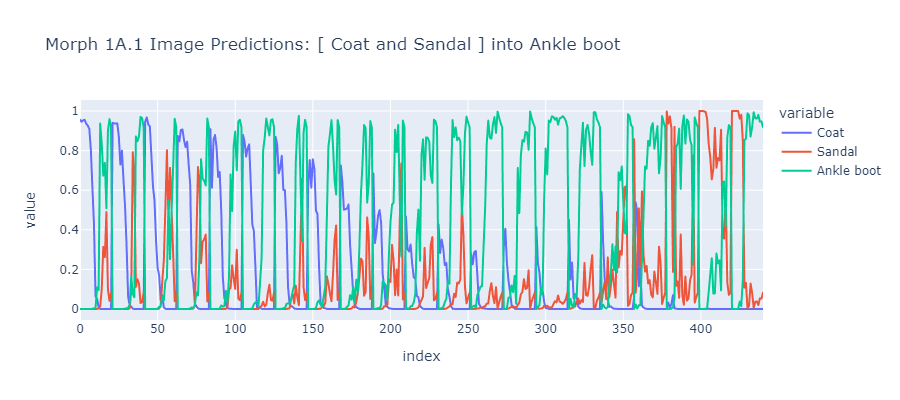

In [29]:
fig_m1A1 = px.line(m1A1_df, title="Morph 1A.1 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_m1A1.update_layout(autosize=False, width=900, height=400)

fig_m1A1.write_image("Morph_1A\\fig_m1A1.png")

fig_m1A1_r = Image.open("Morph_1A\\fig_m1A1.png")

fig_m1A1_r

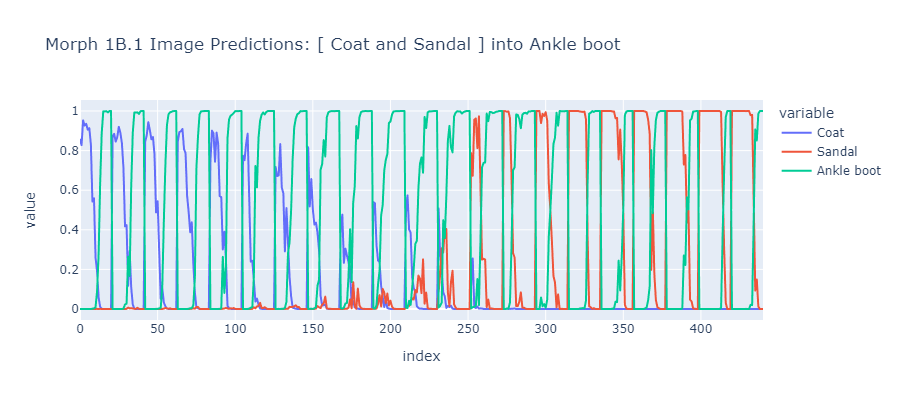

In [30]:
fig_m1B1 = px.line(m1B1_df, title="Morph 1B.1 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_m1B1.update_layout(autosize=False, width=900, height=400)

fig_m1B1.write_image("Morph_1B\\fig_m1B1.png")

fig_m1B1_r = Image.open("Morph_1B\\fig_m1B1.png")

fig_m1B1_r

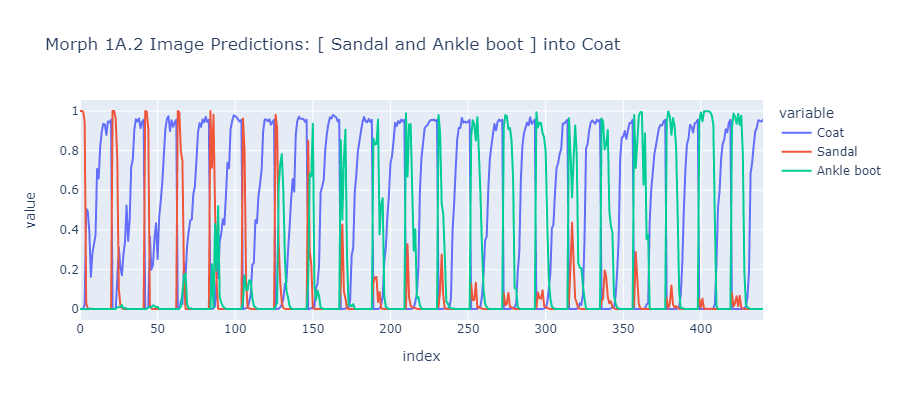

In [31]:
fig_m1A2 = px.line(m1A2_df, title="Morph 1A.2 Image Predictions: " + \
              str('[ ' + g1_group[1]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[0]))

fig_m1A2.update_layout(autosize=False, width=900, height=400)

fig_m1A2.write_image("Morph_1A\\fig_m1A2.png")

fig_m1A2_r = Image.open("Morph_1A\\fig_m1A2.png")

fig_m1A2_r

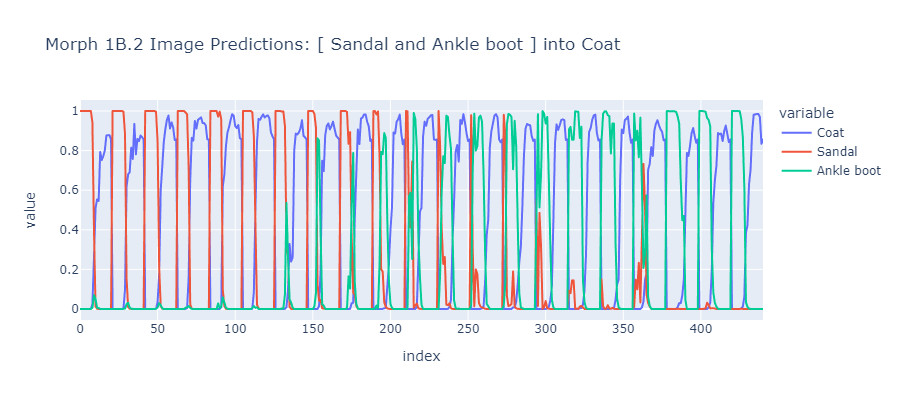

In [32]:
fig_m1B2 = px.line(m1B2_df, title="Morph 1B.2 Image Predictions: " + \
              str('[ ' + g1_group[1]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[0]))

fig_m1B2.update_layout(autosize=False, width=900, height=400)

fig_m1B2.write_image("Morph_1B\\fig_m1B2.png")

fig_m1B2_r = Image.open("Morph_1B\\fig_m1B2.png")

fig_m1B2_r

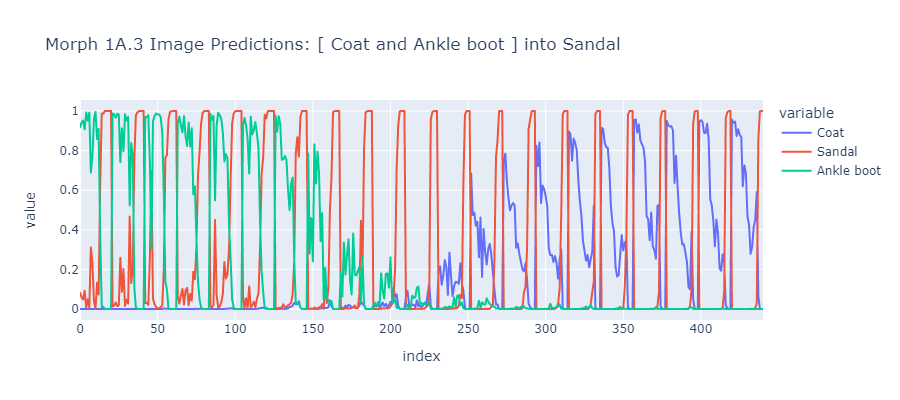

In [33]:
fig_m1A3 = px.line(m1A3_df, title="Morph 1A.3 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[1]))

fig_m1A3.update_layout(autosize=False, width=900, height=400)

fig_m1A3.write_image("Morph_1A\\fig_m1A3.png")

fig_m1A3_r = Image.open("Morph_1A\\fig_m1A3.png")

fig_m1A3_r

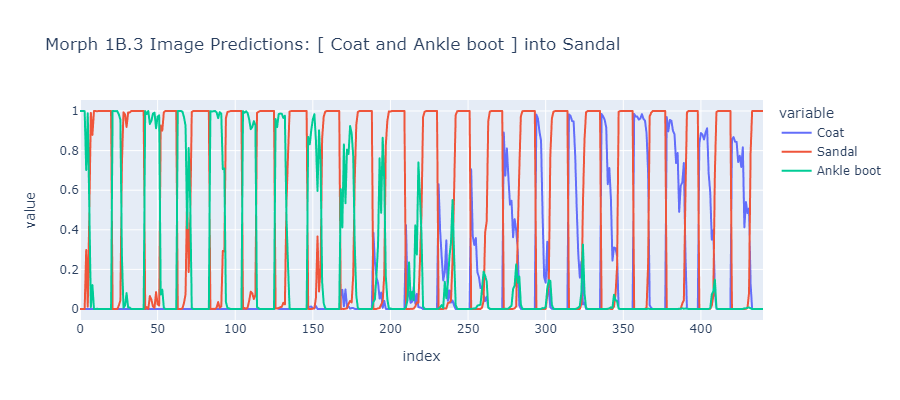

In [34]:
fig_m1B3 = px.line(m1B3_df, title="Morph 1B.3 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[1]))

fig_m1B3.update_layout(autosize=False, width=900, height=400)

fig_m1B3.write_image("Morph_1B\\fig_m1B3.png")

fig_m1B3_r = Image.open("Morph_1B\\fig_m1B3.png")

fig_m1B3_r

In [35]:
g1A1_image1_world, g1A1_image2_world, g1A1_image3_world = morph_3d(m1A1_df[g1_group[0]], \
                                                                m1A1_df[g1_group[1]], \
                                                                m1A1_df[g1_group[2]])

g1B1_image1_world, g1B1_image2_world, g1B1_image3_world = morph_3d(m1B1_df[g1_group[0]], \
                                                                m1B1_df[g1_group[1]], \
                                                                m1B1_df[g1_group[2]])

g1A2_image1_world, g1A2_image2_world, g1A2_image3_world = morph_3d(m1A2_df[g1_group[0]], \
                                                                m1A2_df[g1_group[1]], \
                                                                m1A2_df[g1_group[2]])

g1B2_image1_world, g1B2_image2_world, g1B2_image3_world = morph_3d(m1B2_df[g1_group[0]], \
                                                                m1B2_df[g1_group[1]], \
                                                                m1B2_df[g1_group[2]])

g1A3_image1_world, g1A3_image2_world, g1A3_image3_world = morph_3d(m1A3_df[g1_group[0]], \
                                                                m1A3_df[g1_group[1]], \
                                                                m1A3_df[g1_group[2]])

g1B3_image1_world, g1B3_image2_world, g1B3_image3_world = morph_3d(m1B3_df[g1_group[0]], \
                                                                m1B3_df[g1_group[1]], \
                                                                m1B3_df[g1_group[2]])

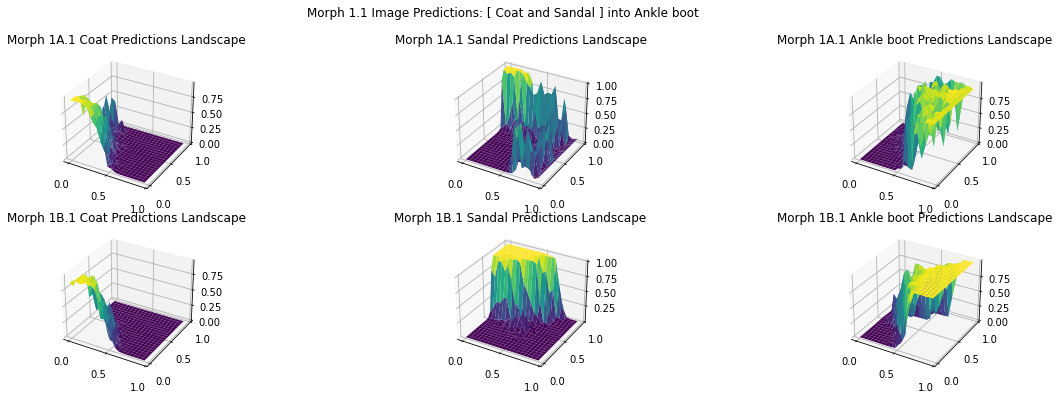

In [36]:
fig_m11_3d = plt.figure(figsize=(20,6), facecolor='white')
fig_m11_3d.suptitle("Morph 1.1 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))
ax = fig_m11_3d.add_subplot(231, projection="3d",  title='Morph 1A.1 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A1_image1_world,cmap='viridis')
ax = fig_m11_3d.add_subplot(232, projection="3d",  title='Morph 1A.1 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A1_image2_world,cmap='viridis')
ax = fig_m11_3d.add_subplot(233, projection="3d",  title='Morph 1A.1 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A1_image3_world,cmap='viridis')
ax = fig_m11_3d.add_subplot(234, projection="3d",  title='Morph 1B.1 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B1_image1_world,cmap='viridis')
ax = fig_m11_3d.add_subplot(235, projection="3d",  title='Morph 1B.1 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B1_image2_world,cmap='viridis')
ax = fig_m11_3d.add_subplot(236, projection="3d",  title='Morph 1B.1 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B1_image3_world,cmap='viridis')

fig_m11_3d.savefig("fig_m11_3d.png")

In [37]:
# Remove Comment for Interactive 3D

# m11_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2]),
#                             str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2])))

# m11_3d.add_trace(go.Surface(z=g1A1_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m11_3d.add_trace(go.Surface(z=g1A1_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m11_3d.add_trace(go.Surface(z=g1A1_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m11_3d.add_trace(go.Surface(z=g1B1_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m11_3d.add_trace(go.Surface(z=g1B1_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m11_3d.add_trace(go.Surface(z=g1B1_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m11_3d.update_layout(title="Morph 1A.1, 1B.1 Image Predictions: " + \
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]),
#                     height=600, width=1000)

# m11_3d.show("notebook")

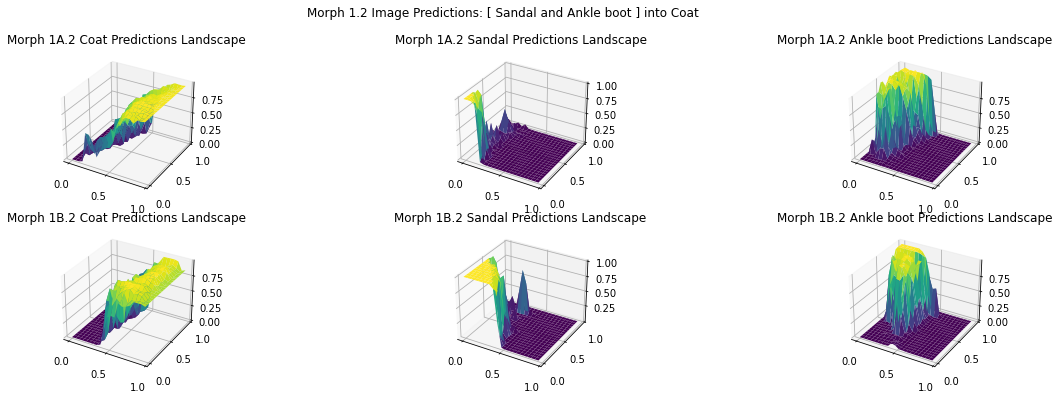

In [38]:
fig_m12_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m12_3d.suptitle("Morph 1.2 Image Predictions: " + \
              str('[ ' + g1_group[1]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[0]))
ax = fig_m12_3d.add_subplot(231, projection="3d",  title='Morph 1A.2 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A2_image1_world,cmap='viridis')
ax = fig_m12_3d.add_subplot(232, projection="3d",  title='Morph 1A.2 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A2_image2_world,cmap='viridis')
ax = fig_m12_3d.add_subplot(233, projection="3d",  title='Morph 1A.2 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A2_image3_world,cmap='viridis')
ax = fig_m12_3d.add_subplot(234, projection="3d",  title='Morph 1B.2 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B2_image1_world,cmap='viridis')
ax = fig_m12_3d.add_subplot(235, projection="3d",  title='Morph 1B.2 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B2_image2_world,cmap='viridis')
ax = fig_m12_3d.add_subplot(236, projection="3d",  title='Morph 1B.2 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B2_image3_world,cmap='viridis')

fig_m12_3d.savefig("fig_m12_3d.png")

In [39]:
# Remove Comment for Interactive 3D

# m12_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2]),
#                             str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2])))

# m12_3d.add_trace(go.Surface(z=g1A2_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m12_3d.add_trace(go.Surface(z=g1A2_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m12_3d.add_trace(go.Surface(z=g1A2_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m12_3d.add_trace(go.Surface(z=g1B2_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m12_3d.add_trace(go.Surface(z=g1B2_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m12_3d.add_trace(go.Surface(z=g1B2_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m12_3d.update_layout(title="Morph 1A.2, 1B.2 Image Predictions: " + \
#               str('[ ' + g1_group[1]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[0]),
#                     height=600, width=1000)

# m12_3d.show()

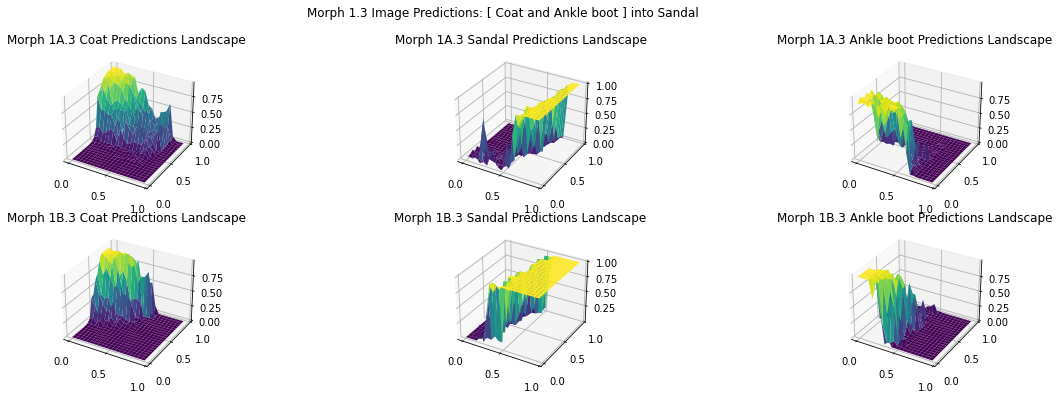

In [40]:
fig_m13_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m13_3d.suptitle("Morph 1.3 Image Predictions: " + \
              str('[ ' + g1_group[0]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[1]))
ax = fig_m13_3d.add_subplot(231, projection="3d",  title='Morph 1A.3 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A3_image1_world,cmap='viridis')
ax = fig_m13_3d.add_subplot(232, projection="3d",  title='Morph 1A.3 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A3_image2_world,cmap='viridis')
ax = fig_m13_3d.add_subplot(233, projection="3d",  title='Morph 1A.3 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1A3_image3_world,cmap='viridis')
ax = fig_m13_3d.add_subplot(234, projection="3d",  title='Morph 1B.3 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B3_image1_world,cmap='viridis')
ax = fig_m13_3d.add_subplot(235, projection="3d",  title='Morph 1B.3 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B3_image2_world,cmap='viridis')
ax = fig_m13_3d.add_subplot(236, projection="3d",  title='Morph 1B.3 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g1B3_image3_world,cmap='viridis')

fig_m13_3d.savefig("fig_m13_3d.png")

In [41]:
# Remove Comment for Interactive 3D

# m13_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2]),
#                             str(g1_group[0]),
#                             str(g1_group[1]),
#                             str(g1_group[2])))

# m13_3d.add_trace(go.Surface(z=g1A3_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m13_3d.add_trace(go.Surface(z=g1A3_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m13_3d.add_trace(go.Surface(z=g1A3_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m13_3d.add_trace(go.Surface(z=g1B3_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m13_3d.add_trace(go.Surface(z=g1B3_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m13_3d.add_trace(go.Surface(z=g1B3_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m13_3d.update_layout(title="Morph 1A.3, 1B.3 Image Predictions: " + \
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[2]) + " ] into " + str(g1_group[1]),
#                     height=600, width=1000)

# m13_3d.show()

## Morph 2: 
### Morph 2.1: [Sandal and Top] into Coat
### Morph 2.2: [Top and Coat] into Sandal
### Morph 2.3: [Sandal and Coat] into Top

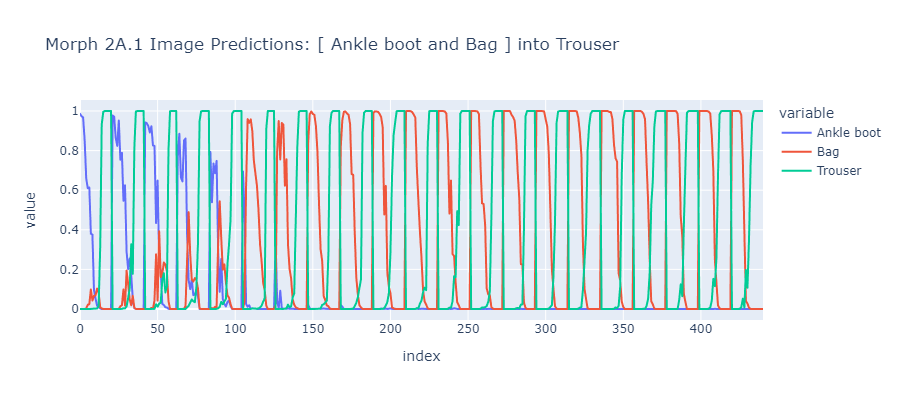

In [42]:
fig_m2A1 = px.line(m2A1_df, title="Morph 2A.1 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[1]) + " ] into " + str(g2_group[2]))

fig_m2A1.update_layout(autosize=False, width=900, height=400)

fig_m2A1.write_image("Morph_2A\\fig_m2A1.png")

fig_m2A1_r = Image.open("Morph_2A\\fig_m2A1.png")

fig_m2A1_r

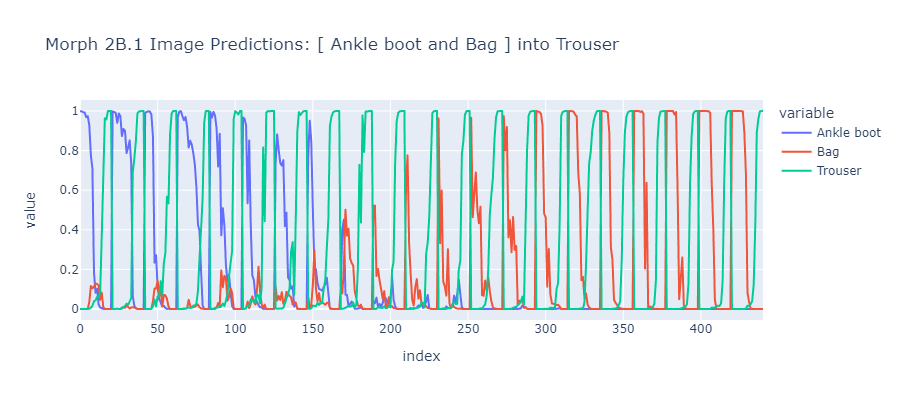

In [43]:
fig_m2B1 = px.line(m2B1_df, title="Morph 2B.1 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[1]) + " ] into " + str(g2_group[2]))

fig_m2B1.update_layout(autosize=False, width=900, height=400)

fig_m2B1.write_image("Morph_2B\\fig_m2B1.png")

fig_m2B1_r = Image.open("Morph_2B\\fig_m2B1.png")

fig_m2B1_r

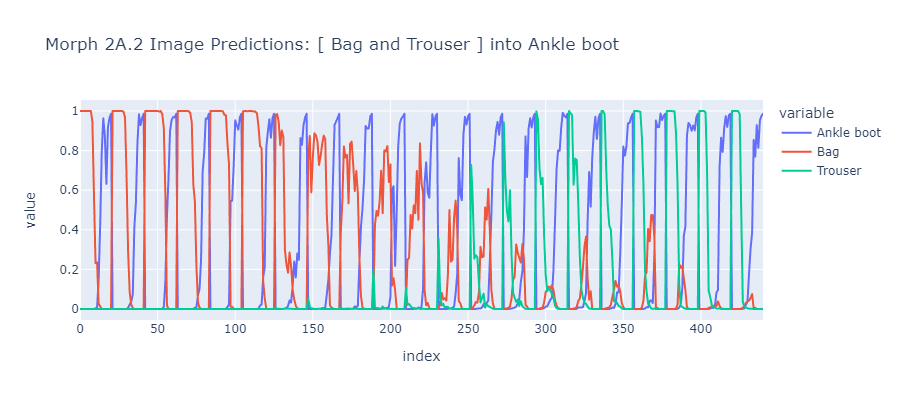

In [44]:
fig_m2A2 = px.line(m2A2_df, title="Morph 2A.2 Image Predictions: " + \
              str('[ ' + g2_group[1]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[0]))

fig_m2A2.update_layout(autosize=False, width=900, height=400)

fig_m2A2.write_image("Morph_2A\\fig_m2A2.png")

fig_m2A2_r = Image.open("Morph_2A\\fig_m2A2.png")

fig_m2A2_r

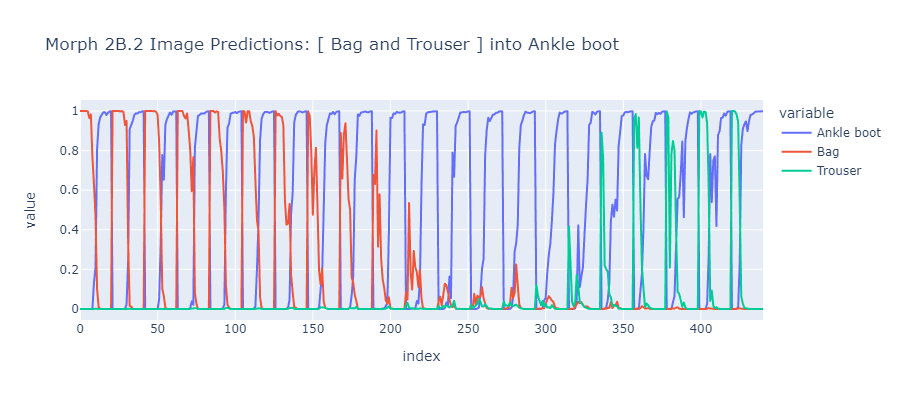

In [45]:
fig_m2B2 = px.line(m2B2_df, title="Morph 2B.2 Image Predictions: " + \
              str('[ ' + g2_group[1]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[0]))

fig_m2B2.update_layout(autosize=False, width=900, height=400)

fig_m2B2.write_image("Morph_2B\\fig_m2B2.png")

fig_m2B2_r = Image.open("Morph_2B\\fig_m2B2.png")

fig_m2B2_r

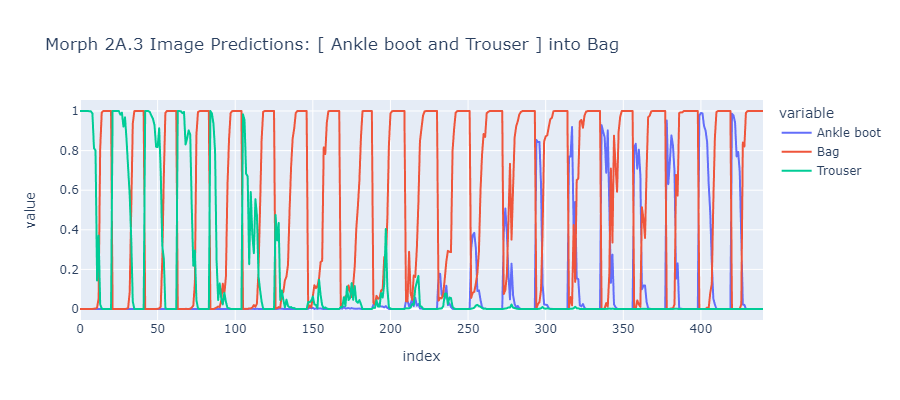

In [46]:
fig_m2A3 = px.line(m2A3_df, title="Morph 2A.3 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[1]))

fig_m2A3.update_layout(autosize=False, width=900, height=400)

fig_m2A3.write_image("Morph_2A\\fig_m2A3.png")

fig_m2A3_r = Image.open("Morph_2A\\fig_m2A3.png")

fig_m2A3_r

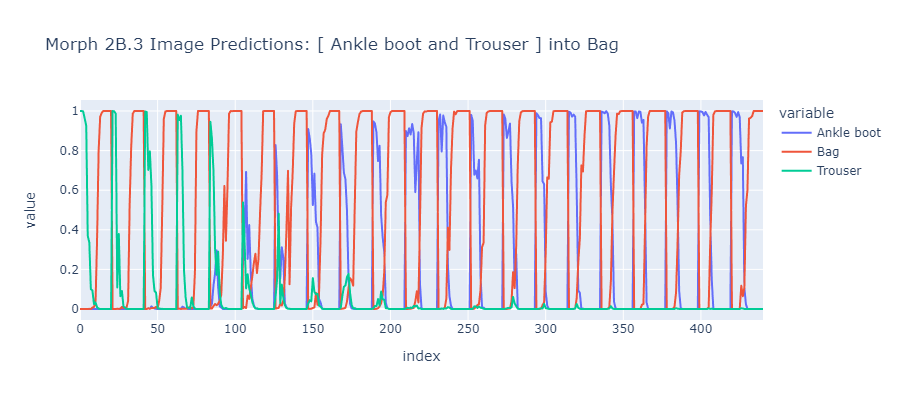

In [47]:
fig_m2B3 = px.line(m2B3_df, title="Morph 2B.3 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[1]))

fig_m2B3.update_layout(autosize=False, width=900, height=400)

fig_m2B3.write_image("Morph_2B\\fig_m2B3.png")

fig_m2B3_r = Image.open("Morph_2B\\fig_m2B3.png")

fig_m2B3_r

In [48]:
g2A1_image1_world, g2A1_image2_world, g2A1_image3_world = morph_3d(m2A1_df[g2_group[0]], \
                                                                m2A1_df[g2_group[1]], \
                                                                m2A1_df[g2_group[2]])

g2B1_image1_world, g2B1_image2_world, g2B1_image3_world = morph_3d(m2B1_df[g2_group[0]], \
                                                                m2B1_df[g2_group[1]], \
                                                                m2B1_df[g2_group[2]])

g2A2_image1_world, g2A2_image2_world, g2A2_image3_world = morph_3d(m2A2_df[g2_group[0]], \
                                                                m2A2_df[g2_group[1]], \
                                                                m2A2_df[g2_group[2]])

g2B2_image1_world, g2B2_image2_world, g2B2_image3_world = morph_3d(m2B2_df[g2_group[0]], \
                                                                m2B2_df[g2_group[1]], \
                                                                m2B2_df[g2_group[2]])

g2A3_image1_world, g2A3_image2_world, g2A3_image3_world = morph_3d(m2A3_df[g2_group[0]], \
                                                                m2A3_df[g2_group[1]], \
                                                                m2A3_df[g2_group[2]])

g2B3_image1_world, g2B3_image2_world, g2B3_image3_world = morph_3d(m2B3_df[g2_group[0]], \
                                                                m2B3_df[g2_group[1]], \
                                                                m2B3_df[g2_group[2]])

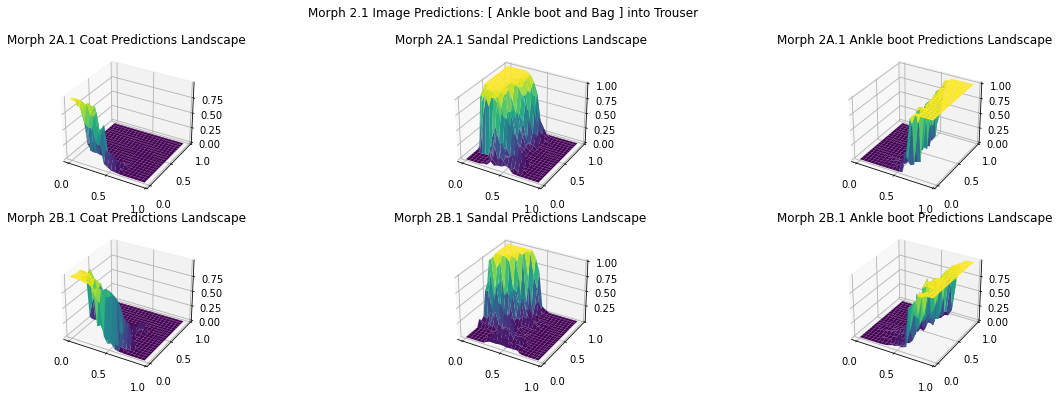

In [49]:
fig_m21_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m21_3d.suptitle("Morph 2.1 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[1]) + " ] into " + str(g2_group[2]))
ax = fig_m21_3d.add_subplot(231, projection="3d",  title='Morph 2A.1 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A1_image1_world,cmap='viridis')
ax = fig_m21_3d.add_subplot(232, projection="3d",  title='Morph 2A.1 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A1_image2_world,cmap='viridis')
ax = fig_m21_3d.add_subplot(233, projection="3d",  title='Morph 2A.1 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A1_image3_world,cmap='viridis')
ax = fig_m21_3d.add_subplot(234, projection="3d",  title='Morph 2B.1 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B1_image1_world,cmap='viridis')
ax = fig_m21_3d.add_subplot(235, projection="3d",  title='Morph 2B.1 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B1_image2_world,cmap='viridis')
ax = fig_m21_3d.add_subplot(236, projection="3d",  title='Morph 2B.1 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B1_image3_world,cmap='viridis')

fig_m21_3d.savefig("fig_m21_3d.png")

In [50]:
# Remove Comment For Interactive 3d

# m21_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2]),
#                             str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2])))

# m21_3d.add_trace(go.Surface(z=g2A1_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m21_3d.add_trace(go.Surface(z=g2A1_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m21_3d.add_trace(go.Surface(z=g2A1_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m21_3d.add_trace(go.Surface(z=g2B1_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m21_3d.add_trace(go.Surface(z=g2B1_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m21_3d.add_trace(go.Surface(z=g2B1_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m21_3d.update_layout(title="Morph 2A.1, 2B.1 Image Predictions: " + \
#               str('[ ' + g2_group[0]) + " and " + str(g2_group[1]) + " ] into " + str(g2_group[2]),
#                     height=600, width=1000)

# m21_3d.show()

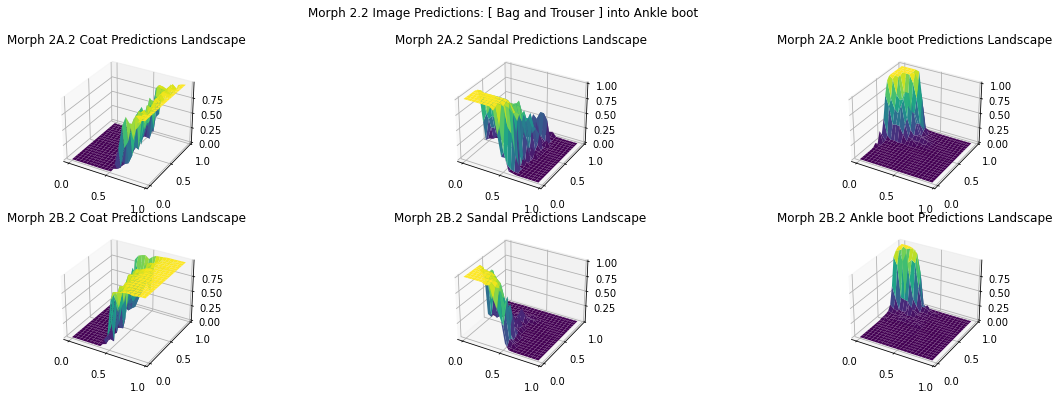

In [51]:
fig_m22_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m22_3d.suptitle("Morph 2.2 Image Predictions: " + \
              str('[ ' + g2_group[1]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[0]))
ax = fig_m22_3d.add_subplot(231, projection="3d",  title='Morph 2A.2 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A2_image1_world,cmap='viridis')
ax = fig_m22_3d.add_subplot(232, projection="3d",  title='Morph 2A.2 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A2_image2_world,cmap='viridis')
ax = fig_m22_3d.add_subplot(233, projection="3d",  title='Morph 2A.2 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A2_image3_world,cmap='viridis')
ax = fig_m22_3d.add_subplot(234, projection="3d",  title='Morph 2B.2 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B2_image1_world,cmap='viridis')
ax = fig_m22_3d.add_subplot(235, projection="3d",  title='Morph 2B.2 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B2_image2_world,cmap='viridis')
ax = fig_m22_3d.add_subplot(236, projection="3d",  title='Morph 2B.2 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B2_image3_world,cmap='viridis')

fig_m22_3d.savefig("fig_m22_3d.png")

In [52]:
#Remove Comment For Interactive 3d

# m22_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2]),
#                             str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2])))

# m22_3d.add_trace(go.Surface(z=g2A2_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m22_3d.add_trace(go.Surface(z=g2A2_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m22_3d.add_trace(go.Surface(z=g2A2_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m22_3d.add_trace(go.Surface(z=g2B2_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m22_3d.add_trace(go.Surface(z=g2B2_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m22_3d.add_trace(go.Surface(z=g2B2_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m22_3d.update_layout(title="Morph 2A.2, 2B.2 Image Predictions: " + \
#               str('[ ' + g2_group[1]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[0]),
#                     height=600, width=1000)

# m22_3d.show()

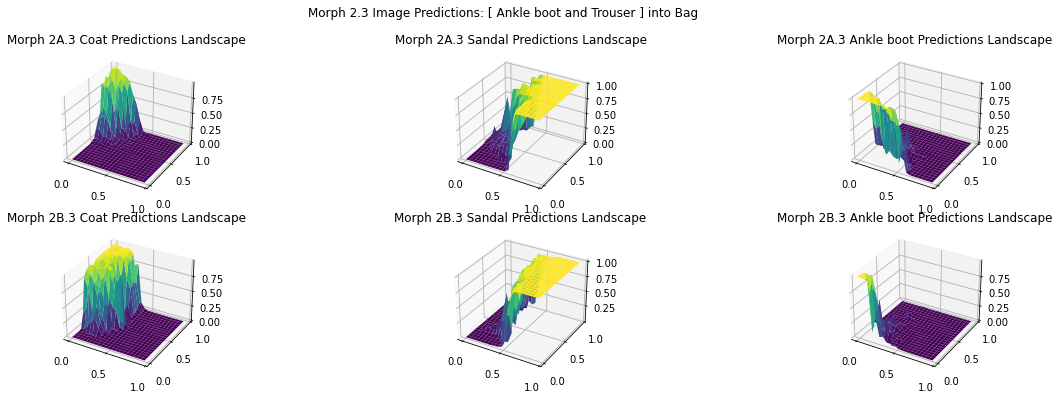

In [53]:
fig_m23_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m23_3d.suptitle("Morph 2.3 Image Predictions: " + \
              str('[ ' + g2_group[0]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[1]))
ax = fig_m23_3d.add_subplot(231, projection="3d",  title='Morph 2A.3 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A3_image1_world,cmap='viridis')
ax = fig_m23_3d.add_subplot(232, projection="3d",  title='Morph 2A.3 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A3_image2_world,cmap='viridis')
ax = fig_m23_3d.add_subplot(233, projection="3d",  title='Morph 2A.3 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2A3_image3_world,cmap='viridis')
ax = fig_m23_3d.add_subplot(234, projection="3d",  title='Morph 2B.3 ' + str(g1_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B3_image1_world,cmap='viridis')
ax = fig_m23_3d.add_subplot(235, projection="3d",  title='Morph 2B.3 ' + str(g1_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B3_image2_world,cmap='viridis')
ax = fig_m23_3d.add_subplot(236, projection="3d",  title='Morph 2B.3 ' + str(g1_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g2B3_image3_world,cmap='viridis')

fig_m23_3d.savefig("fig_m23_3d.png")

In [54]:
# Remove Comment For Interactive 3d

# m23_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2]),
#                             str(g2_group[0]),
#                             str(g2_group[1]),
#                             str(g2_group[2])))

# m23_3d.add_trace(go.Surface(z=g2A3_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m23_3d.add_trace(go.Surface(z=g2A3_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m23_3d.add_trace(go.Surface(z=g2A3_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m23_3d.add_trace(go.Surface(z=g2B3_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m23_3d.add_trace(go.Surface(z=g2B3_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m23_3d.add_trace(go.Surface(z=g2B3_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m23_3d.update_layout(title="Morph 2A.3, 2B.3 Image Predictions: " + \
#               str('[ ' + g2_group[0]) + " and " + str(g2_group[2]) + " ] into " + str(g2_group[1]),
#                     height=600, width=1000)

# m23_3d.show()

## Morph 3: 
### Morph 3.1: [Top and Bag] into Dress
### Morph 3.2: [Bag and Dress] into Top
### Morph 3.3: [Top and Dress] into Bag

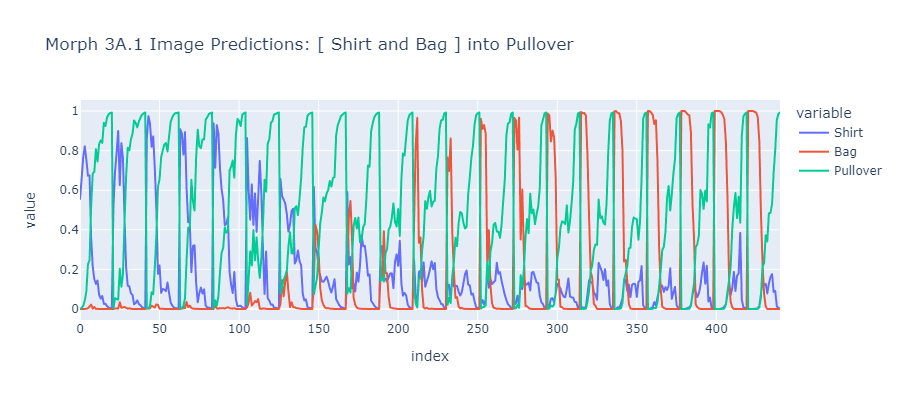

In [55]:
fig_m3A1 = px.line(m3A1_df, title="Morph 3A.1 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[1]) + " ] into " + str(g3_group[2]))

fig_m3A1.update_layout(autosize=False, width=900, height=400)

fig_m3A1.write_image("Morph_3A\\fig_m3A1.png")

fig_m3A1_r = Image.open("Morph_3A\\fig_m3A1.png")

fig_m3A1_r

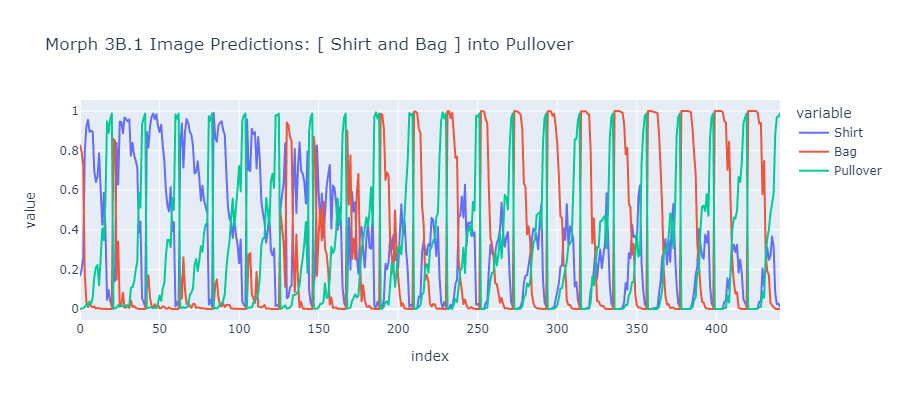

In [56]:
fig_m3B1 = px.line(m3B1_df, title="Morph 3B.1 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[1]) + " ] into " + str(g3_group[2]))

fig_m3B1.update_layout(autosize=False, width=900, height=400)

fig_m3B1.write_image("Morph_3B\\fig_m3B1.png")

fig_m3B1_r = Image.open("Morph_3B\\fig_m3B1.png")

fig_m3B1_r

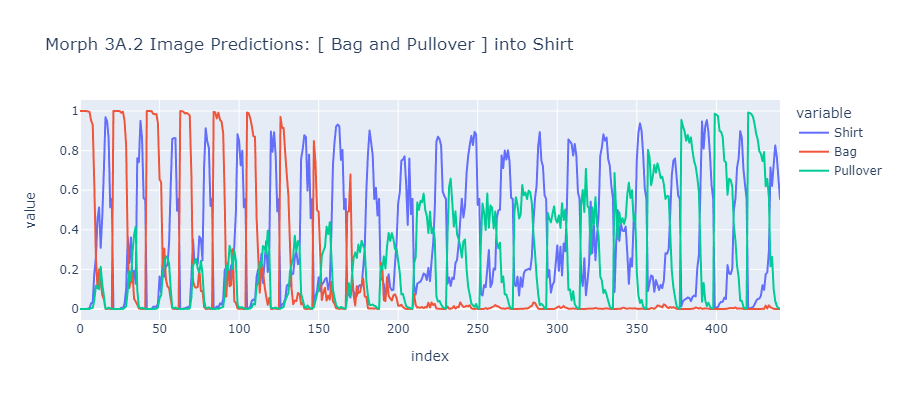

In [57]:
fig_m3A2 = px.line(m3A2_df, title="Morph 3A.2 Image Predictions: " + \
              str('[ ' + g3_group[1]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[0]))

fig_m3A2.update_layout(autosize=False, width=900, height=400)

fig_m3A2.write_image("Morph_3A\\fig_m3A2.png")

fig_m3A2_r = Image.open("Morph_3A\\fig_m3A2.png")

fig_m3A2_r

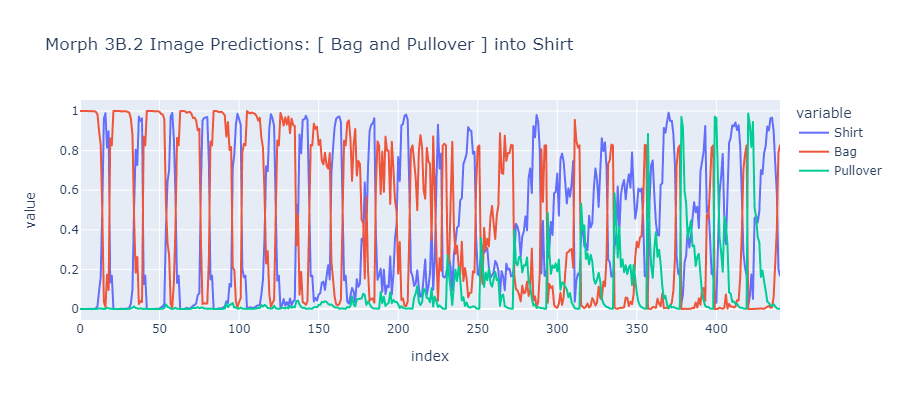

In [58]:
fig_m3B2 = px.line(m3B2_df, title="Morph 3B.2 Image Predictions: " + \
              str('[ ' + g3_group[1]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[0]))

fig_m3B2.update_layout(autosize=False, width=900, height=400)

fig_m3B2.write_image("Morph_3B\\fig_m3B2.png")

fig_m3B2_r = Image.open("Morph_3B\\fig_m3B2.png")

fig_m3B2_r

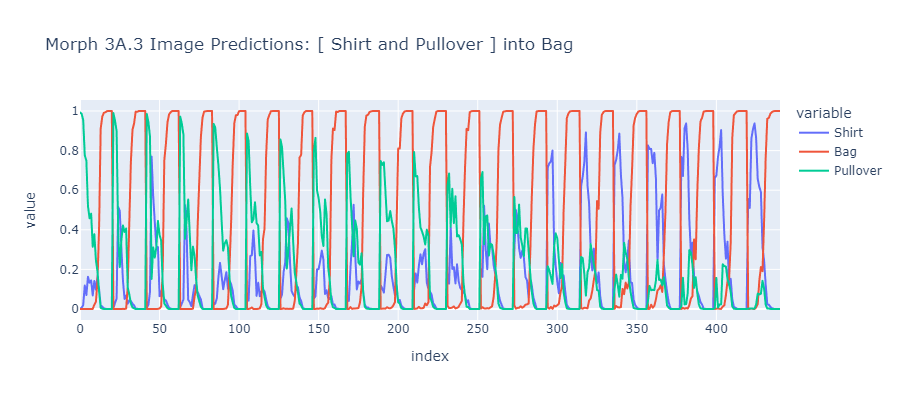

In [59]:
fig_m3A3 = px.line(m3A3_df, title="Morph 3A.3 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[1]))

fig_m3A3.update_layout(autosize=False, width=900, height=400)

fig_m3A3.write_image("Morph_3A\\fig_m3A3.png")

fig_m3A3_r = Image.open("Morph_3A\\fig_m3A3.png")

fig_m3A3_r

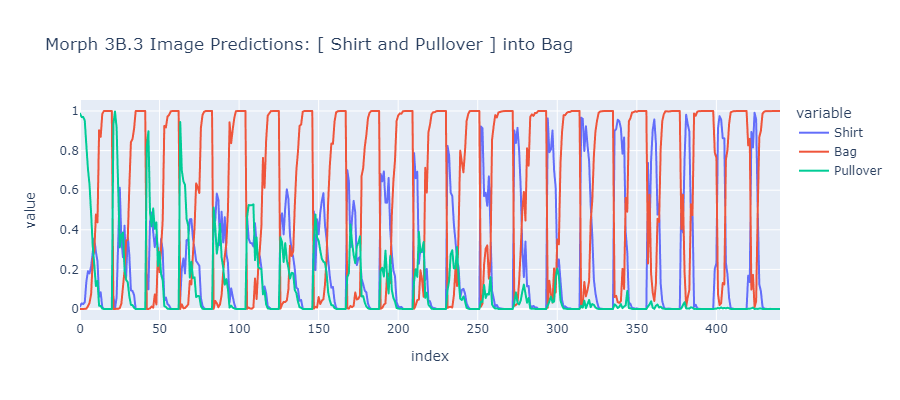

In [60]:
fig_m3B3 = px.line(m3B3_df, title="Morph 3B.3 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[1]))

fig_m3B3.update_layout(autosize=False, width=900, height=400)

fig_m3B3.write_image("Morph_3B\\fig_m3B3.png")

fig_m3B3_r = Image.open("Morph_3B\\fig_m3B3.png")

fig_m3B3_r

In [61]:
g3A1_image1_world, g3A1_image2_world, g3A1_image3_world = morph_3d(m3A1_df[g3_group[0]], \
                                                                m3A1_df[g3_group[1]], \
                                                                m3A1_df[g3_group[2]])

g3B1_image1_world, g3B1_image2_world, g3B1_image3_world = morph_3d(m3B1_df[g3_group[0]], \
                                                                m3B1_df[g3_group[1]], \
                                                                m3B1_df[g3_group[2]])

g3A2_image1_world, g3A2_image2_world, g3A2_image3_world = morph_3d(m3A2_df[g3_group[0]], \
                                                                m3A2_df[g3_group[1]], \
                                                                m3A2_df[g3_group[2]])

g3B2_image1_world, g3B2_image2_world, g3B2_image3_world = morph_3d(m3B2_df[g3_group[0]], \
                                                                m3B2_df[g3_group[1]], \
                                                                m3B2_df[g3_group[2]])

g3A3_image1_world, g3A3_image2_world, g3A3_image3_world = morph_3d(m3A3_df[g3_group[0]], \
                                                                m3A3_df[g3_group[1]], \
                                                                m3A3_df[g3_group[2]])

g3B3_image1_world, g3B3_image2_world, g3B3_image3_world = morph_3d(m3B3_df[g3_group[0]], \
                                                                m3B3_df[g3_group[1]], \
                                                                m3B3_df[g3_group[2]])

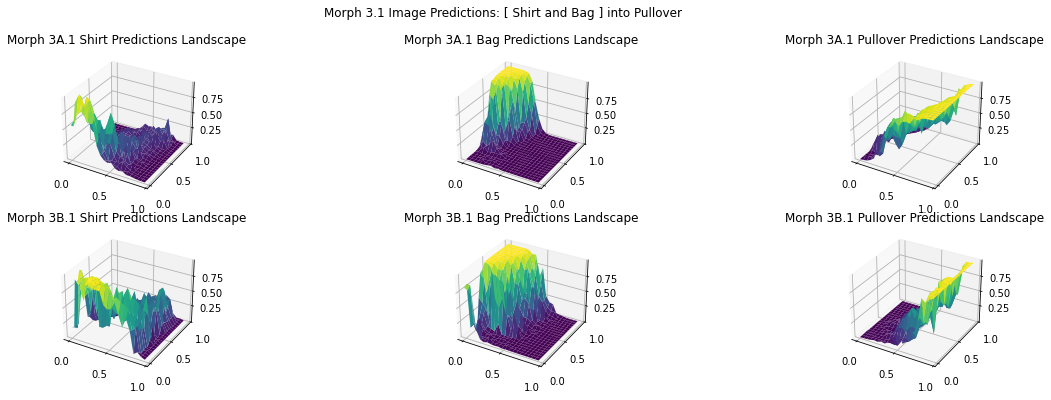

In [62]:
fig_m31_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m31_3d.suptitle("Morph 3.1 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[1]) + " ] into " + str(g3_group[2]))
ax = fig_m31_3d.add_subplot(231, projection="3d",  title='Morph 3A.1 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A1_image1_world,cmap='viridis')
ax = fig_m31_3d.add_subplot(232, projection="3d",  title='Morph 3A.1 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A1_image2_world,cmap='viridis')
ax = fig_m31_3d.add_subplot(233, projection="3d",  title='Morph 3A.1 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A1_image3_world,cmap='viridis')
ax = fig_m31_3d.add_subplot(234, projection="3d",  title='Morph 3B.1 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B1_image1_world,cmap='viridis')
ax = fig_m31_3d.add_subplot(235, projection="3d",  title='Morph 3B.1 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B1_image2_world,cmap='viridis')
ax = fig_m31_3d.add_subplot(236, projection="3d",  title='Morph 3B.1 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B1_image3_world,cmap='viridis')

fig_m31_3d.savefig("fig_m31_3d.png")

In [63]:
# Remove Comment For INteractive 3d

# m31_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2]),
#                             str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2])))

# m31_3d.add_trace(go.Surface(z=g3A1_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m31_3d.add_trace(go.Surface(z=g3A1_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m31_3d.add_trace(go.Surface(z=g3A1_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m31_3d.add_trace(go.Surface(z=g3B1_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m31_3d.add_trace(go.Surface(z=g3B1_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m31_3d.add_trace(go.Surface(z=g3B1_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m31_3d.update_layout(title="Morph 3A.1, 3B.1 Image Predictions: " + \
#               str('[ ' + g3_group[0]) + " and " + str(g3_group[1]) + " ] into " + str(g3_group[2]),
#                     height=600, width=1000)

# m31_3d.show()

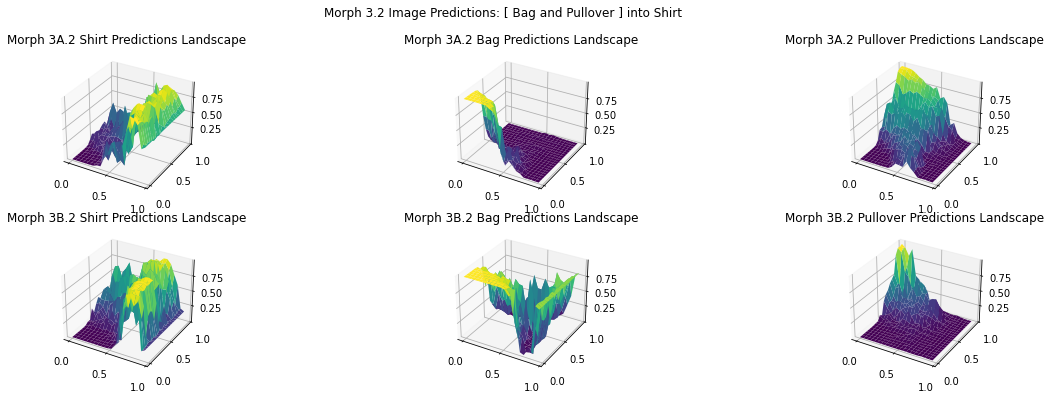

In [64]:
fig_m32_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m32_3d.suptitle("Morph 3.2 Image Predictions: " + \
              str('[ ' + g3_group[1]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[0]))
ax = fig_m32_3d.add_subplot(231, projection="3d",  title='Morph 3A.2 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A2_image1_world,cmap='viridis')
ax = fig_m32_3d.add_subplot(232, projection="3d",  title='Morph 3A.2 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A2_image2_world,cmap='viridis')
ax = fig_m32_3d.add_subplot(233, projection="3d",  title='Morph 3A.2 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A2_image3_world,cmap='viridis')
ax = fig_m32_3d.add_subplot(234, projection="3d",  title='Morph 3B.2 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B2_image1_world,cmap='viridis')
ax = fig_m32_3d.add_subplot(235, projection="3d",  title='Morph 3B.2 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B2_image2_world,cmap='viridis')
ax = fig_m32_3d.add_subplot(236, projection="3d",  title='Morph 3B.2 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B2_image3_world,cmap='viridis')

fig_m32_3d.savefig("fig_m32_3d.png")

In [65]:
# Remove Comment For Interactive 3d

# m32_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2]),
#                             str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2])))

# m32_3d.add_trace(go.Surface(z=g3A2_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m32_3d.add_trace(go.Surface(z=g3A2_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m32_3d.add_trace(go.Surface(z=g3A2_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m32_3d.add_trace(go.Surface(z=g3B2_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m32_3d.add_trace(go.Surface(z=g3B2_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m32_3d.add_trace(go.Surface(z=g3B2_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m32_3d.update_layout(title="Morph 3A.2, 3B.2 Image Predictions: " + \
#               str('[ ' + g3_group[1]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[0]),
#                     height=600, width=1000)

# m32_3d.show()

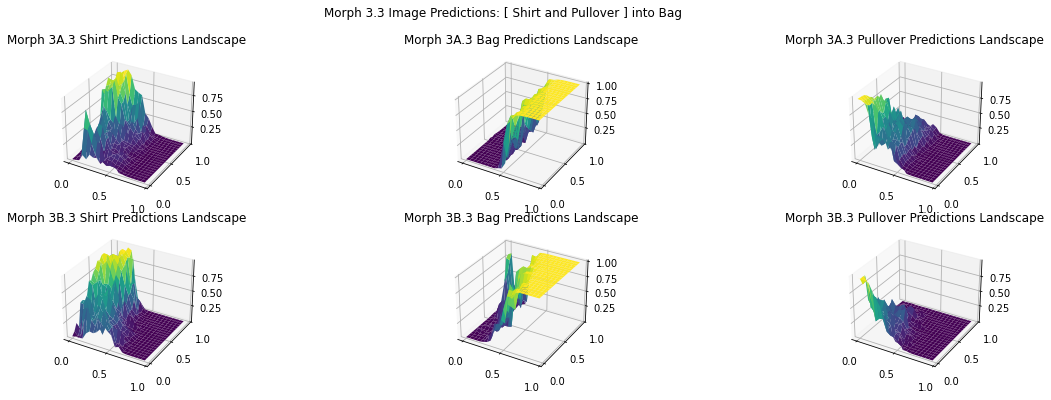

In [66]:
fig_m33_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m33_3d.suptitle("Morph 3.3 Image Predictions: " + \
              str('[ ' + g3_group[0]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[1]))
ax = fig_m33_3d.add_subplot(231, projection="3d",  title='Morph 3A.3 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A3_image1_world,cmap='viridis')
ax = fig_m33_3d.add_subplot(232, projection="3d",  title='Morph 3A.3 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A3_image2_world,cmap='viridis')
ax = fig_m33_3d.add_subplot(233, projection="3d",  title='Morph 3A.3 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3A3_image3_world,cmap='viridis')
ax = fig_m33_3d.add_subplot(234, projection="3d",  title='Morph 3B.3 ' + str(g3_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B3_image1_world,cmap='viridis')
ax = fig_m33_3d.add_subplot(235, projection="3d",  title='Morph 3B.3 ' + str(g3_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B3_image2_world,cmap='viridis')
ax = fig_m33_3d.add_subplot(236, projection="3d",  title='Morph 3B.3 ' + str(g3_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g3B3_image3_world,cmap='viridis')

fig_m33_3d.savefig("fig_m33_3d.png")

In [67]:
# Remove Comment For Interactive 3d

# m33_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2]),
#                             str(g3_group[0]),
#                             str(g3_group[1]),
#                             str(g3_group[2])))

# m33_3d.add_trace(go.Surface(z=g3A3_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m33_3d.add_trace(go.Surface(z=g3A3_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m33_3d.add_trace(go.Surface(z=g3A3_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m33_3d.add_trace(go.Surface(z=g3B3_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m33_3d.add_trace(go.Surface(z=g3B3_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m33_3d.add_trace(go.Surface(z=g3B3_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m33_3d.update_layout(title="Morph 3A.3, 3B.3 Image Predictions: " + \
#               str('[ ' + g3_group[0]) + " and " + str(g3_group[2]) + " ] into " + str(g3_group[1]),
#                     height=600, width=1000)

# m33_3d.show()

## Morph 4: 
### Morph 4.1: [Trouser and Coat] into Shirt
### Morph 4.2: [Coat and Shirt] into Trouser
### Morph 4.3: [Trouser and Shirt] into Coat

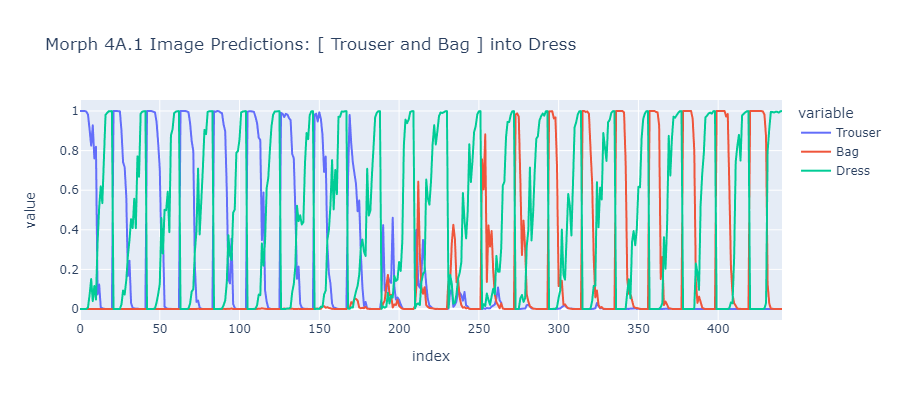

In [68]:
fig_m4A1 = px.line(m4A1_df, title="Morph 4A.1 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[1]) + " ] into " + str(g4_group[2]))

fig_m4A1.update_layout(autosize=False, width=900, height=400)

fig_m4A1.write_image("Morph_4A\\fig_m4A1.png")

fig_m4A1_r = Image.open("Morph_4A\\fig_m4A1.png")

fig_m4A1_r

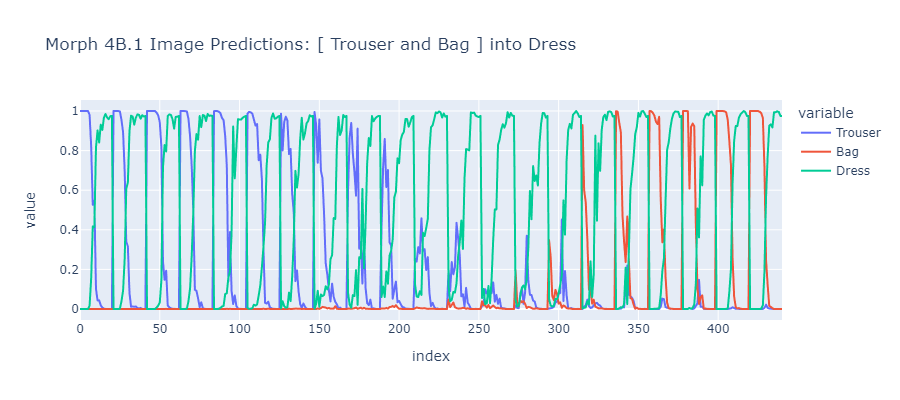

In [69]:
fig_m4B1 = px.line(m4B1_df, title="Morph 4B.1 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[1]) + " ] into " + str(g4_group[2]))

fig_m4B1.update_layout(autosize=False, width=900, height=400)

fig_m4B1.write_image("Morph_4B\\fig_m4B1.png")

fig_m4B1_r = Image.open("Morph_4B\\fig_m4B1.png")

fig_m4B1_r

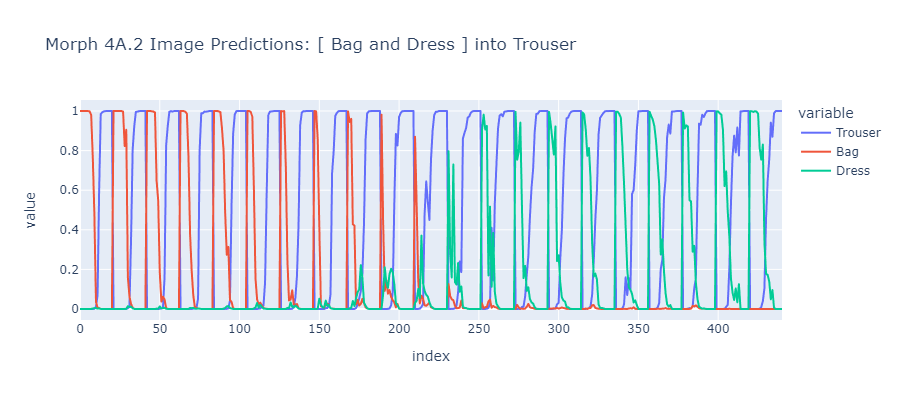

In [70]:
fig_m4A2 = px.line(m4A2_df, title="Morph 4A.2 Image Predictions: " + \
              str('[ ' + g4_group[1]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[0]))

fig_m4A2.update_layout(autosize=False, width=900, height=400)

fig_m4A2.write_image("Morph_4A\\fig_m4A2.png")

fig_m4A2_r = Image.open("Morph_4A\\fig_m4A2.png")

fig_m4A2_r

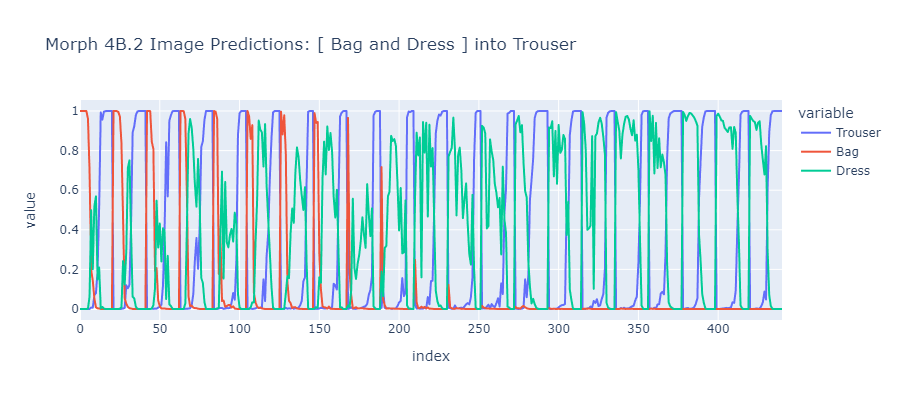

In [71]:
fig_m4B2 = px.line(m4B2_df, title="Morph 4B.2 Image Predictions: " + \
              str('[ ' + g4_group[1]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[0]))

fig_m4B2.update_layout(autosize=False, width=900, height=400)

fig_m4B2.write_image("Morph_4B\\fig_m4B2.png")

fig_m4B2_r = Image.open("Morph_4B\\fig_m4B2.png")

fig_m4B2_r

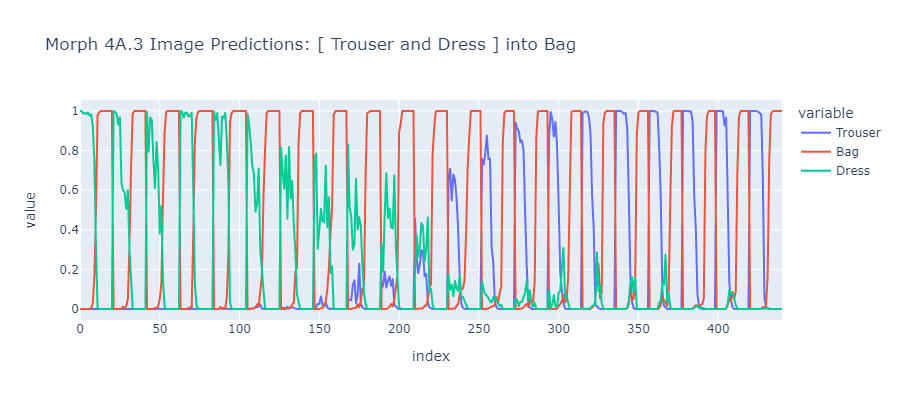

In [72]:
fig_m4A3 = px.line(m4A3_df, title="Morph 4A.3 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[1]))

fig_m4A3.update_layout(autosize=False, width=900, height=400)

fig_m4A3.write_image("Morph_4A\\fig_m4A3.png")

fig_m4A3_r = Image.open("Morph_4A\\fig_m4A3.png")

fig_m4A3_r

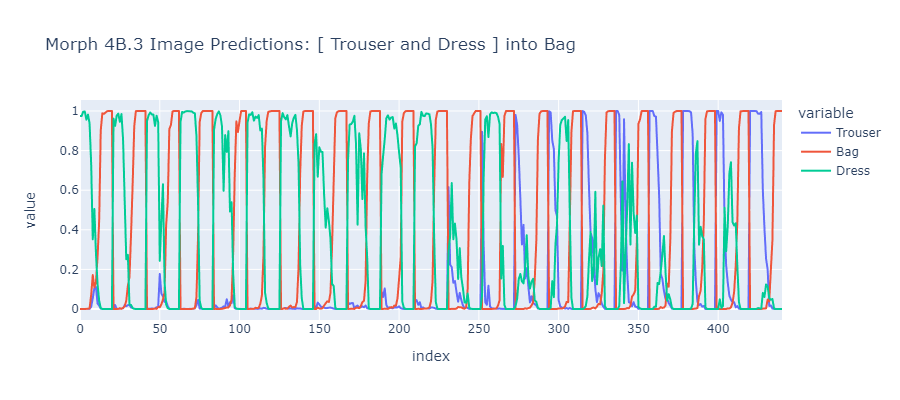

In [73]:
fig_m4B3 = px.line(m4B3_df, title="Morph 4B.3 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[1]))

fig_m4B3.update_layout(autosize=False, width=900, height=400)

fig_m4B3.write_image("Morph_4B\\fig_m4B3.png")

fig_m4B3_r = Image.open("Morph_4B\\fig_m4B3.png")

fig_m4B3_r

In [74]:
g4A1_image1_world, g4A1_image2_world, g4A1_image3_world = morph_3d(m4A1_df[g4_group[0]], \
                                                                m4A1_df[g4_group[1]], \
                                                                m4A1_df[g4_group[2]])

g4B1_image1_world, g4B1_image2_world, g4B1_image3_world = morph_3d(m4B1_df[g4_group[0]], \
                                                                m4B1_df[g4_group[1]], \
                                                                m4B1_df[g4_group[2]])

g4A2_image1_world, g4A2_image2_world, g4A2_image3_world = morph_3d(m4A2_df[g4_group[0]], \
                                                                m4A2_df[g4_group[1]], \
                                                                m4A2_df[g4_group[2]])

g4B2_image1_world, g4B2_image2_world, g4B2_image3_world = morph_3d(m4B2_df[g4_group[0]], \
                                                                m4B2_df[g4_group[1]], \
                                                                m4B2_df[g4_group[2]])

g4A3_image1_world, g4A3_image2_world, g4A3_image3_world = morph_3d(m4A3_df[g4_group[0]], \
                                                                m4A3_df[g4_group[1]], \
                                                                m4A3_df[g4_group[2]])

g4B3_image1_world, g4B3_image2_world, g4B3_image3_world = morph_3d(m4B3_df[g4_group[0]], \
                                                                m4B3_df[g4_group[1]], \
                                                                m4B3_df[g4_group[2]])

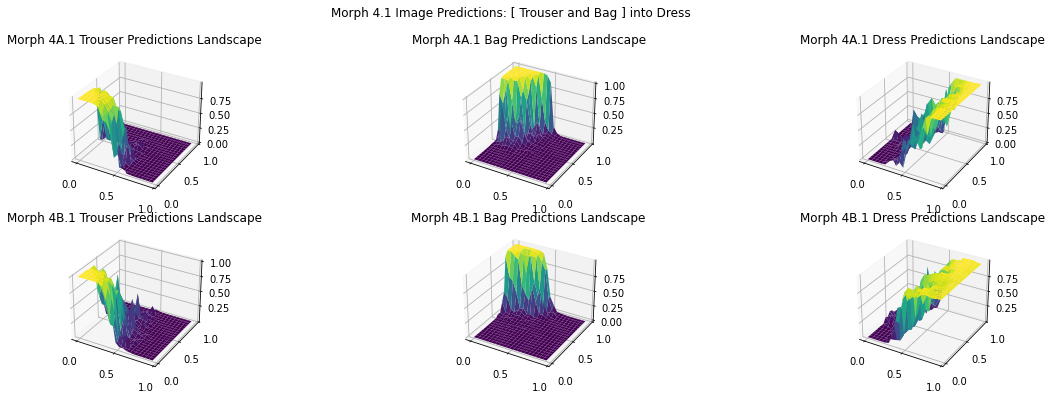

In [75]:
fig_m41_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m41_3d.suptitle("Morph 4.1 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[1]) + " ] into " + str(g4_group[2]))
ax = fig_m41_3d.add_subplot(231, projection="3d",  title='Morph 4A.1 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A1_image1_world,cmap='viridis')
ax = fig_m41_3d.add_subplot(232, projection="3d",  title='Morph 4A.1 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A1_image2_world,cmap='viridis')
ax = fig_m41_3d.add_subplot(233, projection="3d",  title='Morph 4A.1 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A1_image3_world,cmap='viridis')
ax = fig_m41_3d.add_subplot(234, projection="3d",  title='Morph 4B.1 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B1_image1_world,cmap='viridis')
ax = fig_m41_3d.add_subplot(235, projection="3d",  title='Morph 4B.1 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B1_image2_world,cmap='viridis')
ax = fig_m41_3d.add_subplot(236, projection="3d",  title='Morph 4B.1 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B1_image3_world,cmap='viridis')

fig_m41_3d.savefig("fig_m41_3d.png")

In [76]:
# Remove Comment For Interactive 3d

# m41_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2]),
#                             str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2])))

# m41_3d.add_trace(go.Surface(z=g4A1_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m41_3d.add_trace(go.Surface(z=g4A1_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m41_3d.add_trace(go.Surface(z=g4A1_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m41_3d.add_trace(go.Surface(z=g4B1_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m41_3d.add_trace(go.Surface(z=g4B1_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m41_3d.add_trace(go.Surface(z=g4B1_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m41_3d.update_layout(title="Morph 4A.1, 4B.1 Image Predictions: " + \
#               str('[ ' + g4_group[0]) + " and " + str(g4_group[1]) + " ] into " + str(g4_group[2]),
#                     height=600, width=1000)

# m41_3d.show()

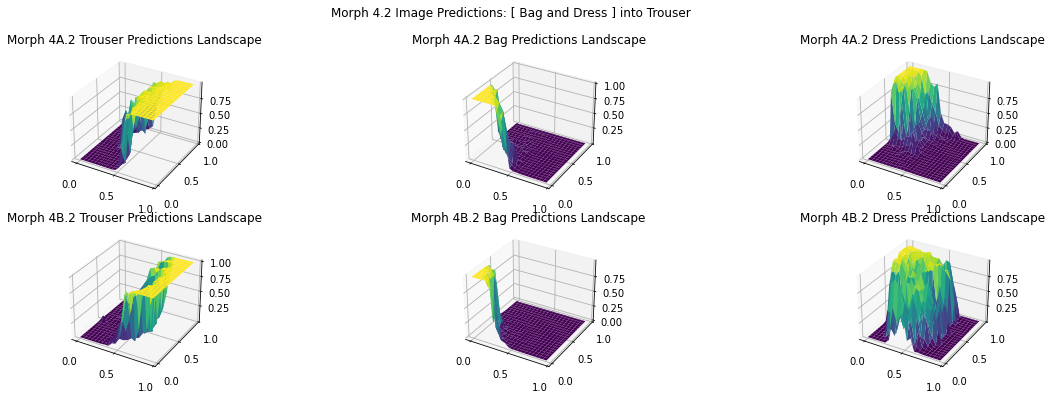

In [77]:
fig_m42_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m42_3d.suptitle("Morph 4.2 Image Predictions: " + \
              str('[ ' + g4_group[1]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[0]))
ax = fig_m42_3d.add_subplot(231, projection="3d",  title='Morph 4A.2 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A2_image1_world,cmap='viridis')
ax = fig_m42_3d.add_subplot(232, projection="3d",  title='Morph 4A.2 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A2_image2_world,cmap='viridis')
ax = fig_m42_3d.add_subplot(233, projection="3d",  title='Morph 4A.2 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A2_image3_world,cmap='viridis')
ax = fig_m42_3d.add_subplot(234, projection="3d",  title='Morph 4B.2 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B2_image1_world,cmap='viridis')
ax = fig_m42_3d.add_subplot(235, projection="3d",  title='Morph 4B.2 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B2_image2_world,cmap='viridis')
ax = fig_m42_3d.add_subplot(236, projection="3d",  title='Morph 4B.2 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B2_image3_world,cmap='viridis')

fig_m42_3d.savefig("fig_m42_3d.png")

In [78]:
# Remove Comment For Interactive 3d

# m42_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2]),
#                             str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2])))

# m42_3d.add_trace(go.Surface(z=g4A2_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m42_3d.add_trace(go.Surface(z=g4A2_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m42_3d.add_trace(go.Surface(z=g4A2_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m42_3d.add_trace(go.Surface(z=g4B2_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m42_3d.add_trace(go.Surface(z=g4B2_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m42_3d.add_trace(go.Surface(z=g4B2_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m42_3d.update_layout(title="Morph 4A.2, 4B.2 Image Predictions: " + \
#               str('[ ' + g4_group[1]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[0]),
#                     height=600, width=1000)

# m42_3d.show()

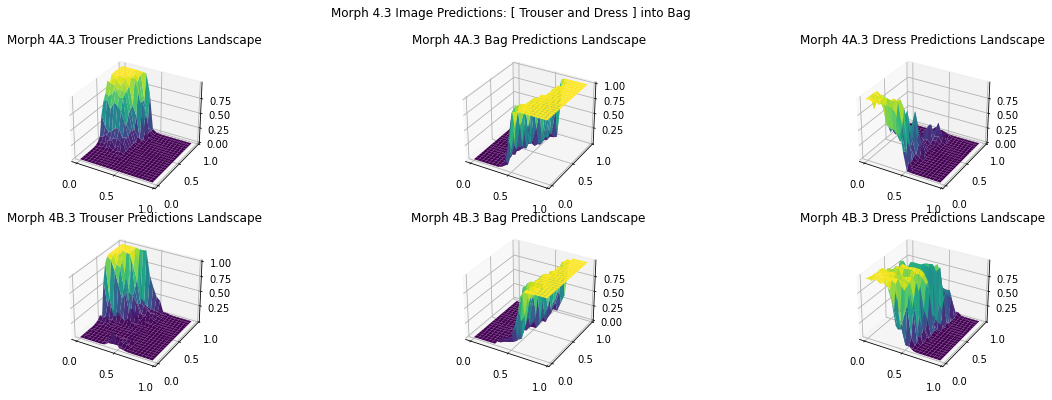

In [79]:
fig_m43_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m43_3d.suptitle("Morph 4.3 Image Predictions: " + \
              str('[ ' + g4_group[0]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[1]))
ax = fig_m43_3d.add_subplot(231, projection="3d",  title='Morph 4A.3 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A3_image1_world,cmap='viridis')
ax = fig_m43_3d.add_subplot(232, projection="3d",  title='Morph 4A.3 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A3_image2_world,cmap='viridis')
ax = fig_m43_3d.add_subplot(233, projection="3d",  title='Morph 4A.3 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4A3_image3_world,cmap='viridis')
ax = fig_m43_3d.add_subplot(234, projection="3d",  title='Morph 4B.3 ' + str(g4_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B3_image1_world,cmap='viridis')
ax = fig_m43_3d.add_subplot(235, projection="3d",  title='Morph 4B.3 ' + str(g4_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B3_image2_world,cmap='viridis')
ax = fig_m43_3d.add_subplot(236, projection="3d",  title='Morph 4B.3 ' + str(g4_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g4B3_image3_world,cmap='viridis')

fig_m43_3d.savefig("fig_m43_3d.png")

In [80]:
# Remove Comment For Interactive 3d

# m43_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2]),
#                             str(g4_group[0]),
#                             str(g4_group[1]),
#                             str(g4_group[2])))

# m43_3d.add_trace(go.Surface(z=g4A3_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m43_3d.add_trace(go.Surface(z=g4A3_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m43_3d.add_trace(go.Surface(z=g4A3_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m43_3d.add_trace(go.Surface(z=g4B3_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m43_3d.add_trace(go.Surface(z=g4B3_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m43_3d.add_trace(go.Surface(z=g4B3_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m43_3d.update_layout(title="Morph 4A.3, 4B.3 Image Predictions: " + \
#               str('[ ' + g4_group[0]) + " and " + str(g4_group[2]) + " ] into " + str(g4_group[1]),
#                     height=600, width=1000)

# m43_3d.show()

## Morph 5: 
### Morph 5.1: [Bag and Pullover] into Ankle boot
### Morph 5.2: [Pullover and Ankle boot] into Bag
### Morph 5.3: [Bag and Ankle boot] into Pullover

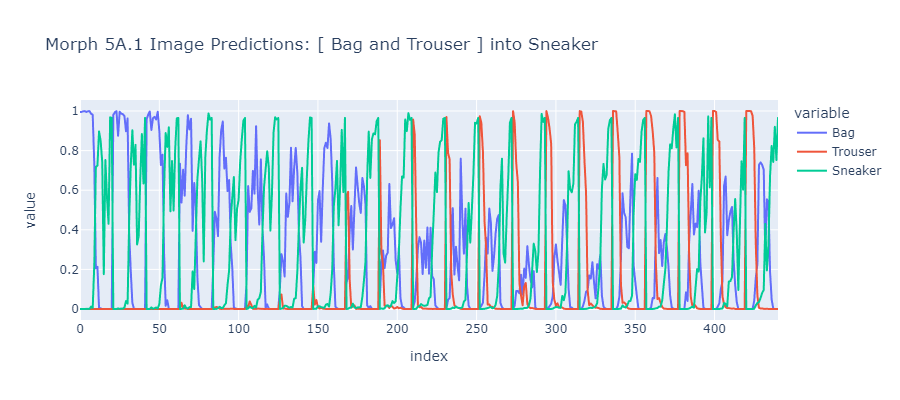

In [81]:
fig_m5A1 = px.line(m5A1_df, title="Morph 5A.1 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[1]) + " ] into " + str(g5_group[2]))

fig_m5A1.update_layout(autosize=False, width=900, height=400)

fig_m5A1.write_image("Morph_5A\\fig_m5A1.png")

fig_m5A1_r = Image.open("Morph_5A\\fig_m5A1.png")

fig_m5A1_r

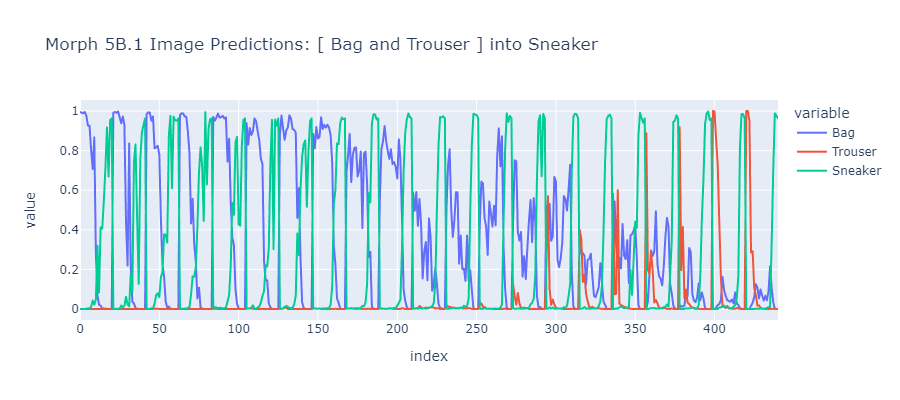

In [82]:
fig_m5B1 = px.line(m5B1_df, title="Morph 5B.1 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[1]) + " ] into " + str(g5_group[2]))

fig_m5B1.update_layout(autosize=False, width=900, height=400)

fig_m5B1.write_image("Morph_5B\\fig_m5B1.png")

fig_m5B1_r = Image.open("Morph_5B\\fig_m5B1.png")

fig_m5B1_r

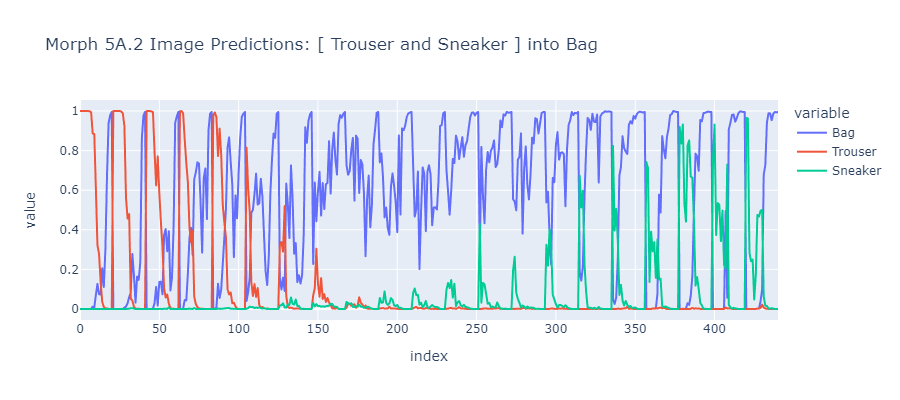

In [83]:
fig_m5A2 = px.line(m5A2_df, title="Morph 5A.2 Image Predictions: " + \
              str('[ ' + g5_group[1]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[0]))

fig_m5A2.update_layout(autosize=False, width=900, height=400)

fig_m5A2.write_image("Morph_5A\\fig_m5A2.png")

fig_m5A2_r = Image.open("Morph_5A\\fig_m5A2.png")

fig_m5A2_r

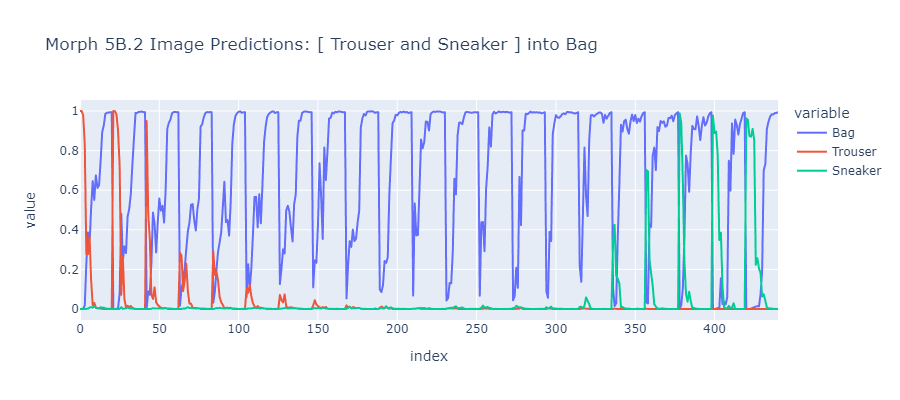

In [84]:
fig_m5B2 = px.line(m5B2_df, title="Morph 5B.2 Image Predictions: " + \
              str('[ ' + g5_group[1]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[0]))

fig_m5B2.update_layout(autosize=False, width=900, height=400)

fig_m5B2.write_image("Morph_5B\\fig_m5B2.png")

fig_m5B2_r = Image.open("Morph_5B\\fig_m5B2.png")

fig_m5B2_r

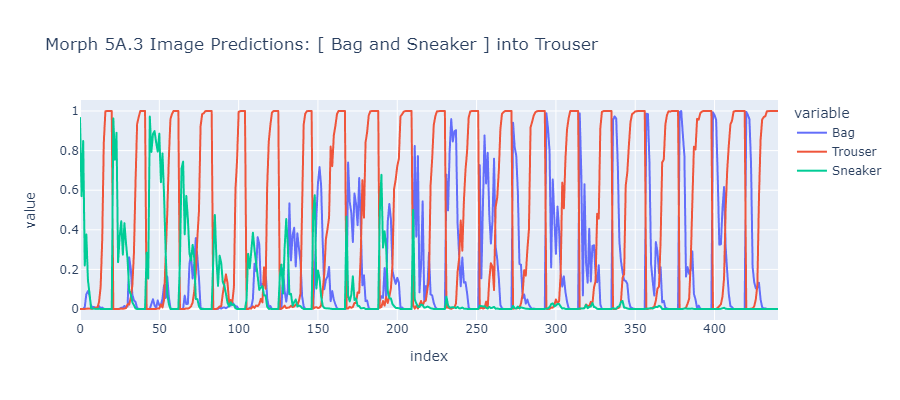

In [85]:
fig_m5A3 = px.line(m5A3_df, title="Morph 5A.3 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[1]))

fig_m5A3.update_layout(autosize=False, width=900, height=400)

fig_m5A3.write_image("Morph_5A\\fig_m5A3.png")

fig_m5A3_r = Image.open("Morph_5A\\fig_m5A3.png")

fig_m5A3_r

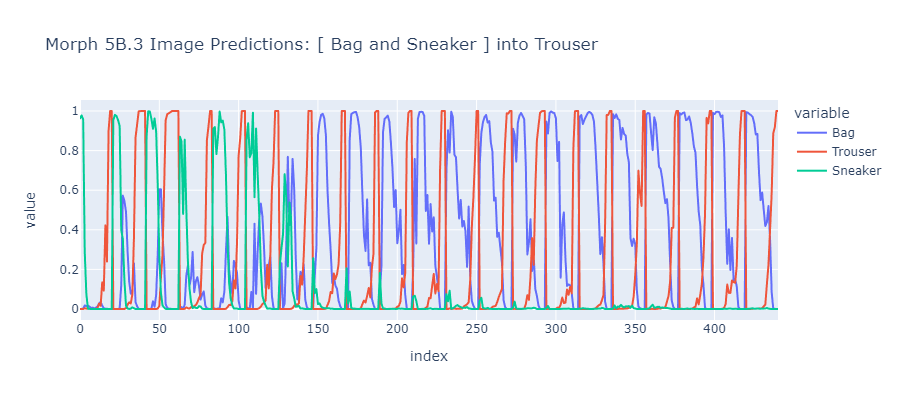

In [86]:
fig_m5B3 = px.line(m5B3_df, title="Morph 5B.3 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[1]))

fig_m5B3.update_layout(autosize=False, width=900, height=400)

fig_m5B3.write_image("Morph_5B\\fig_m5B3.png")

fig_m5B3_r = Image.open("Morph_5B\\fig_m5B3.png")

fig_m5B3_r

In [87]:
g5A1_image1_world, g5A1_image2_world, g5A1_image3_world = morph_3d(m5A1_df[g5_group[0]], \
                                                                m5A1_df[g5_group[1]], \
                                                                m5A1_df[g5_group[2]])

g5B1_image1_world, g5B1_image2_world, g5B1_image3_world = morph_3d(m5B1_df[g5_group[0]], \
                                                                m5B1_df[g5_group[1]], \
                                                                m5B1_df[g5_group[2]])

g5A2_image1_world, g5A2_image2_world, g5A2_image3_world = morph_3d(m5A2_df[g5_group[0]], \
                                                                m5A2_df[g5_group[1]], \
                                                                m5A2_df[g5_group[2]])

g5B2_image1_world, g5B2_image2_world, g5B2_image3_world = morph_3d(m5B2_df[g5_group[0]], \
                                                                m5B2_df[g5_group[1]], \
                                                                m5B2_df[g5_group[2]])

g5A3_image1_world, g5A3_image2_world, g5A3_image3_world = morph_3d(m5A3_df[g5_group[0]], \
                                                                m5A3_df[g5_group[1]], \
                                                                m5A3_df[g5_group[2]])

g5B3_image1_world, g5B3_image2_world, g5B3_image3_world = morph_3d(m5B3_df[g5_group[0]], \
                                                                m5B3_df[g5_group[1]], \
                                                                m5B3_df[g5_group[2]])

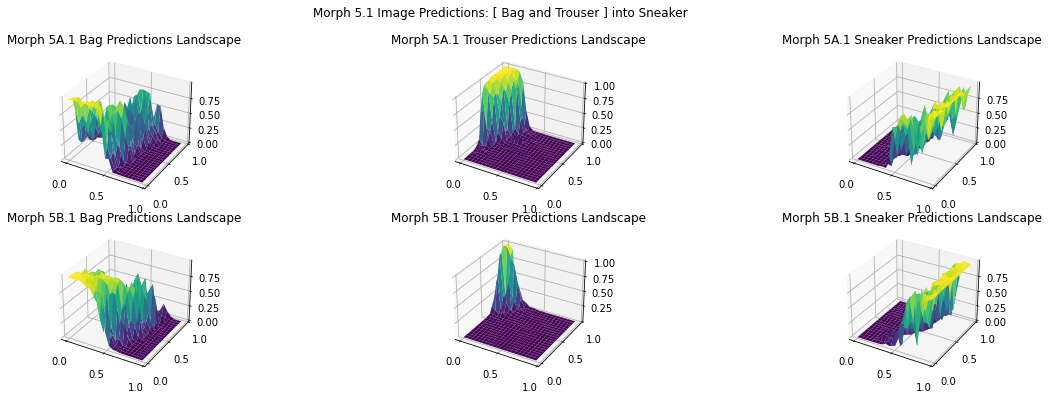

In [88]:
fig_m51_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m51_3d.suptitle("Morph 5.1 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[1]) + " ] into " + str(g5_group[2]))
ax = fig_m51_3d.add_subplot(231, projection="3d",  title='Morph 5A.1 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A1_image1_world,cmap='viridis')
ax = fig_m51_3d.add_subplot(232, projection="3d",  title='Morph 5A.1 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A1_image2_world,cmap='viridis')
ax = fig_m51_3d.add_subplot(233, projection="3d",  title='Morph 5A.1 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A1_image3_world,cmap='viridis')
ax = fig_m51_3d.add_subplot(234, projection="3d",  title='Morph 5B.1 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B1_image1_world,cmap='viridis')
ax = fig_m51_3d.add_subplot(235, projection="3d",  title='Morph 5B.1 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B1_image2_world,cmap='viridis')
ax = fig_m51_3d.add_subplot(236, projection="3d",  title='Morph 5B.1 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B1_image3_world,cmap='viridis')

fig_m51_3d.savefig("fig_m51_3d.png")

In [89]:
# Remove Comment For Interactive 3d

# m51_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2]),
#                             str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2])))

# m51_3d.add_trace(go.Surface(z=g5A1_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m51_3d.add_trace(go.Surface(z=g5A1_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m51_3d.add_trace(go.Surface(z=g5A1_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m51_3d.add_trace(go.Surface(z=g5B1_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m51_3d.add_trace(go.Surface(z=g5B1_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m51_3d.add_trace(go.Surface(z=g5B1_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m51_3d.update_layout(title="Morph 5A.1, 5B.1 Image Predictions: " + \
#               str('[ ' + g5_group[0]) + " and " + str(g5_group[1]) + " ] into " + str(g5_group[2]),
#                     height=400, width=800)

# m51_3d.show()

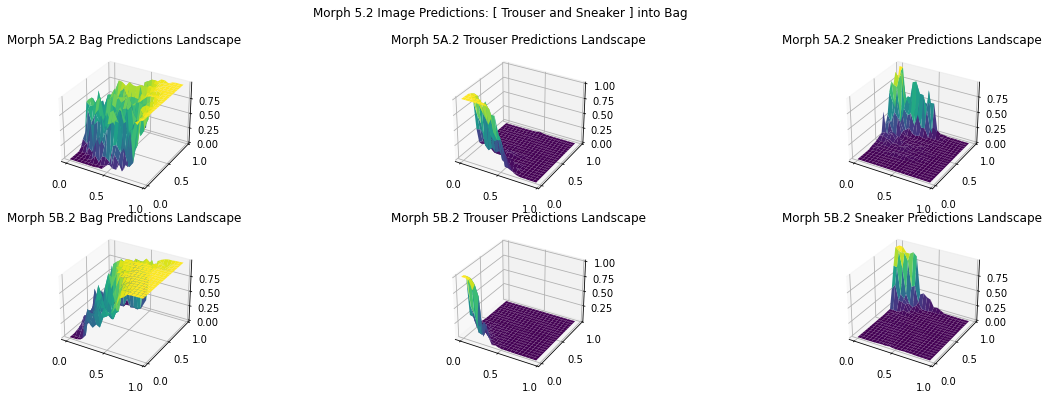

In [90]:
fig_m52_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m52_3d.suptitle("Morph 5.2 Image Predictions: " + \
              str('[ ' + g5_group[1]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[0]))
ax = fig_m52_3d.add_subplot(231, projection="3d",  title='Morph 5A.2 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A2_image1_world,cmap='viridis')
ax = fig_m52_3d.add_subplot(232, projection="3d",  title='Morph 5A.2 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A2_image2_world,cmap='viridis')
ax = fig_m52_3d.add_subplot(233, projection="3d",  title='Morph 5A.2 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A2_image3_world,cmap='viridis')
ax = fig_m52_3d.add_subplot(234, projection="3d",  title='Morph 5B.2 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B2_image1_world,cmap='viridis')
ax = fig_m52_3d.add_subplot(235, projection="3d",  title='Morph 5B.2 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B2_image2_world,cmap='viridis')
ax = fig_m52_3d.add_subplot(236, projection="3d",  title='Morph 5B.2 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B2_image3_world,cmap='viridis')

fig_m52_3d.savefig("fig_m52_3d.png")

In [91]:
# Remove Comment For Interactive 3d

# m52_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2]),
#                             str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2])))

# m52_3d.add_trace(go.Surface(z=g5A2_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m52_3d.add_trace(go.Surface(z=g5A2_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m52_3d.add_trace(go.Surface(z=g5A2_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m52_3d.add_trace(go.Surface(z=g5B2_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m52_3d.add_trace(go.Surface(z=g5B2_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m52_3d.add_trace(go.Surface(z=g5B2_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m52_3d.update_layout(title="Morph 5A.2, 5B.2 Image Predictions: " + \
#               str('[ ' + g5_group[1]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[0]),
#                     height=600, width=1000)

# m52_3d.show()

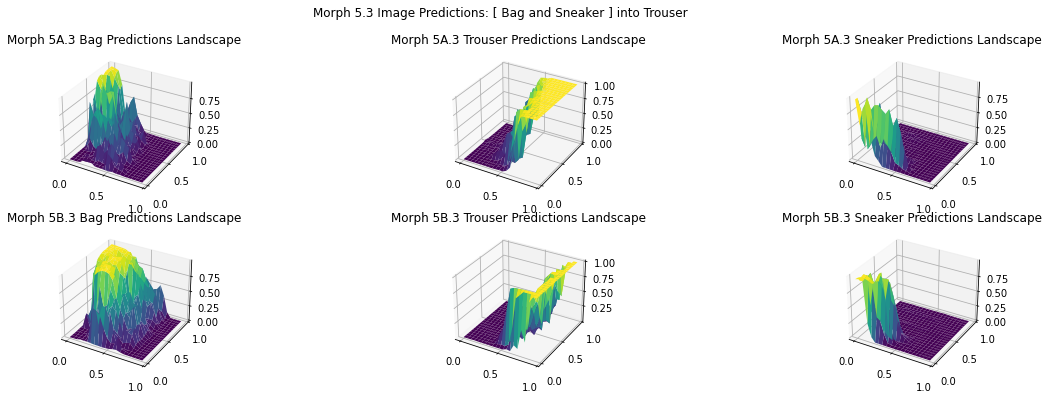

In [92]:
fig_m53_3d = matplotlib.pyplot.figure(figsize=(20,6), facecolor='white')
fig_m53_3d.suptitle("Morph 5.3 Image Predictions: " + \
              str('[ ' + g5_group[0]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[1]))
ax = fig_m53_3d.add_subplot(231, projection="3d",  title='Morph 5A.3 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A3_image1_world,cmap='viridis')
ax = fig_m53_3d.add_subplot(232, projection="3d",  title='Morph 5A.3 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A3_image2_world,cmap='viridis')
ax = fig_m53_3d.add_subplot(233, projection="3d",  title='Morph 5A.3 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5A3_image3_world,cmap='viridis')
ax = fig_m53_3d.add_subplot(234, projection="3d",  title='Morph 5B.3 ' + str(g5_group[0]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B3_image1_world,cmap='viridis')
ax = fig_m53_3d.add_subplot(235, projection="3d",  title='Morph 5B.3 ' + str(g5_group[1]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B3_image2_world,cmap='viridis')
ax = fig_m53_3d.add_subplot(236, projection="3d",  title='Morph 5B.3 ' + str(g5_group[2]) + ' Predictions Landscape')
ax.plot_surface(x,y,g5B3_image3_world,cmap='viridis')

fig_m53_3d.savefig("fig_m53_3d.png")

In [93]:
# Remove Comment For Interactive 3d

# m53_3d = make_subplots(rows=2, cols=3,
#             specs=[[{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}],
#                    [{'type': 'surface'}, {'type': 'surface'}, {'type': 'surface'}]],
#             subplot_titles=(str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2]),
#                             str(g5_group[0]),
#                             str(g5_group[1]),
#                             str(g5_group[2])))

# m53_3d.add_trace(go.Surface(z=g5A3_image1_world, colorscale='viridis'),
#     row=1, col=1)

# m53_3d.add_trace(go.Surface(z=g5A3_image2_world, colorscale='viridis'),
#     row=1, col=2)

# m53_3d.add_trace(go.Surface(z=g5A3_image3_world, colorscale='viridis'),
#     row=1, col=3)

# m53_3d.add_trace(go.Surface(z=g5B3_image1_world, colorscale='viridis'),
#     row=2, col=1)

# m53_3d.add_trace(go.Surface(z=g5B3_image2_world, colorscale='viridis'),
#     row=2, col=2)

# m53_3d.add_trace(go.Surface(z=g5B3_image3_world, colorscale='viridis'),
#     row=2, col=3)

# m53_3d.update_layout(title="Morph 5A.3, 5B.3 Image Predictions: " + \
#               str('[ ' + g5_group[0]) + " and " + str(g5_group[2]) + " ] into " + str(g5_group[1]),
#                     height=600, width=1000)

# m53_3d.show()